In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC

In [ ]:
import numpy as np

def classify_array(arr, threshold):
    result = np.zeros_like(arr)
    result[arr >= threshold] = 1
    return result

In [ ]:
def print_confusion_matrix(y_true,y_pred):

    cf_matrix = confusion_matrix(y_true,y_pred)

    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    plt.xlabel("0 - Not cancelled , 1 - Cancelled")
    plt.ylabel("1 - Cancelled , 0 - Not cancelled")
    plt.title("Confusion matrix - Actual vs Predicted")
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datamining/Hotel_Reservations.csv")

데이터 셋 instance, feature 수 확인

In [ ]:
df.shape

(36275, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

In [ ]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
(df.isnull().sum()/len(df)) #널값 비율

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

데이터 분석

변수들 간의 상관관계 확인

<ipython-input-11-4f2942ccd471>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<Axes: >

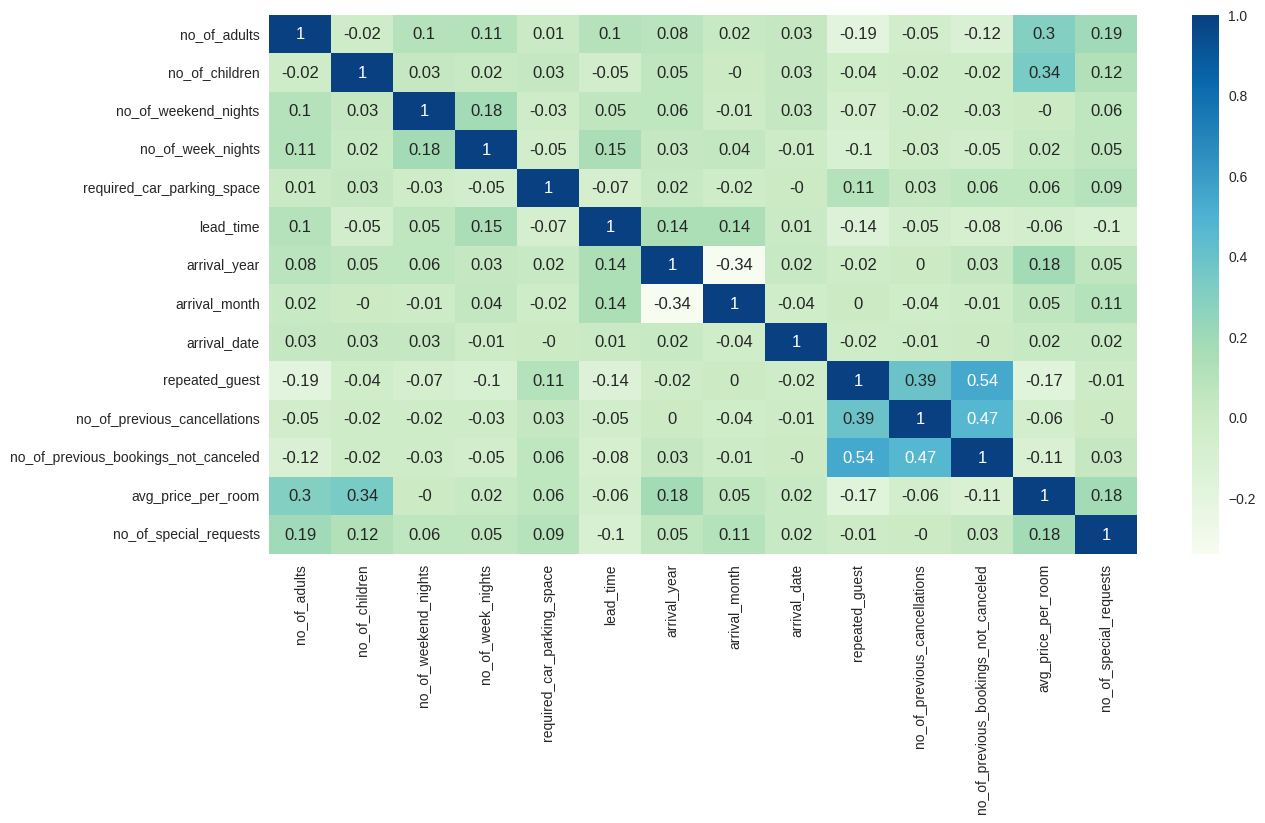

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'GnBu')

Feature간에 강한 상관관계가 없는 것을 확인 할 수 있습니다.

Categorical Variables



<Axes: title={'center': 'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

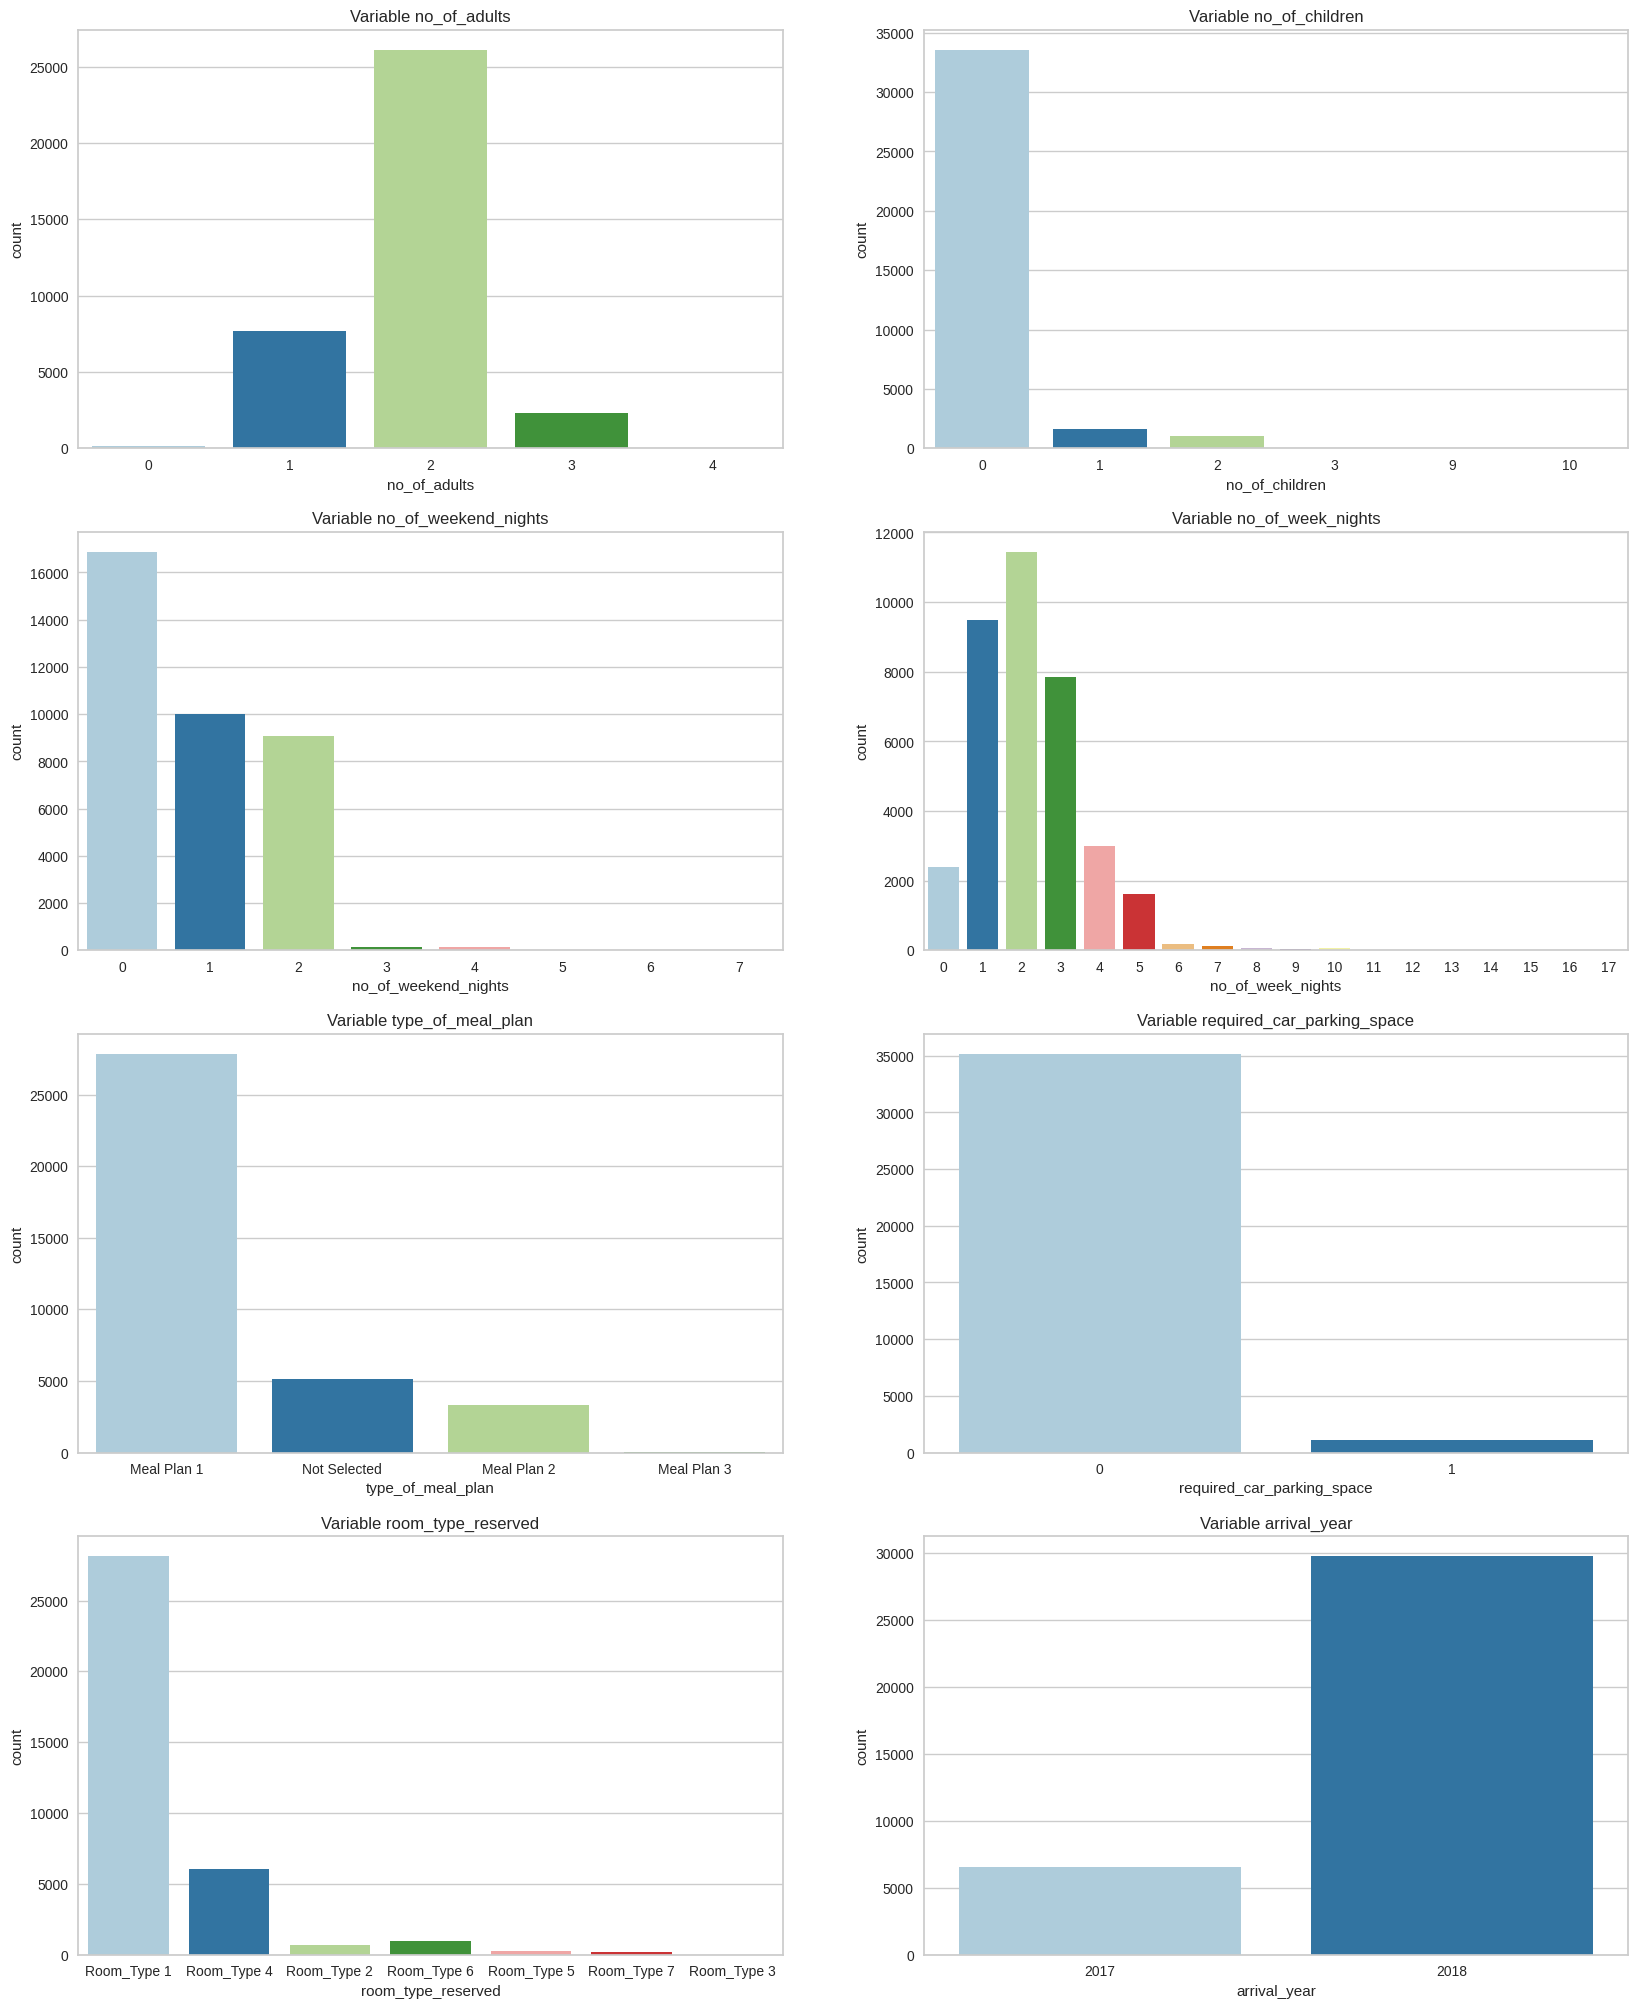

In [ ]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Paired', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Paired', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Paired', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Paired', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Paired', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Paired', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Paired', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Paired', data = df)

<Axes: title={'center': 'Variable booking_status'}, xlabel='booking_status', ylabel='count'>

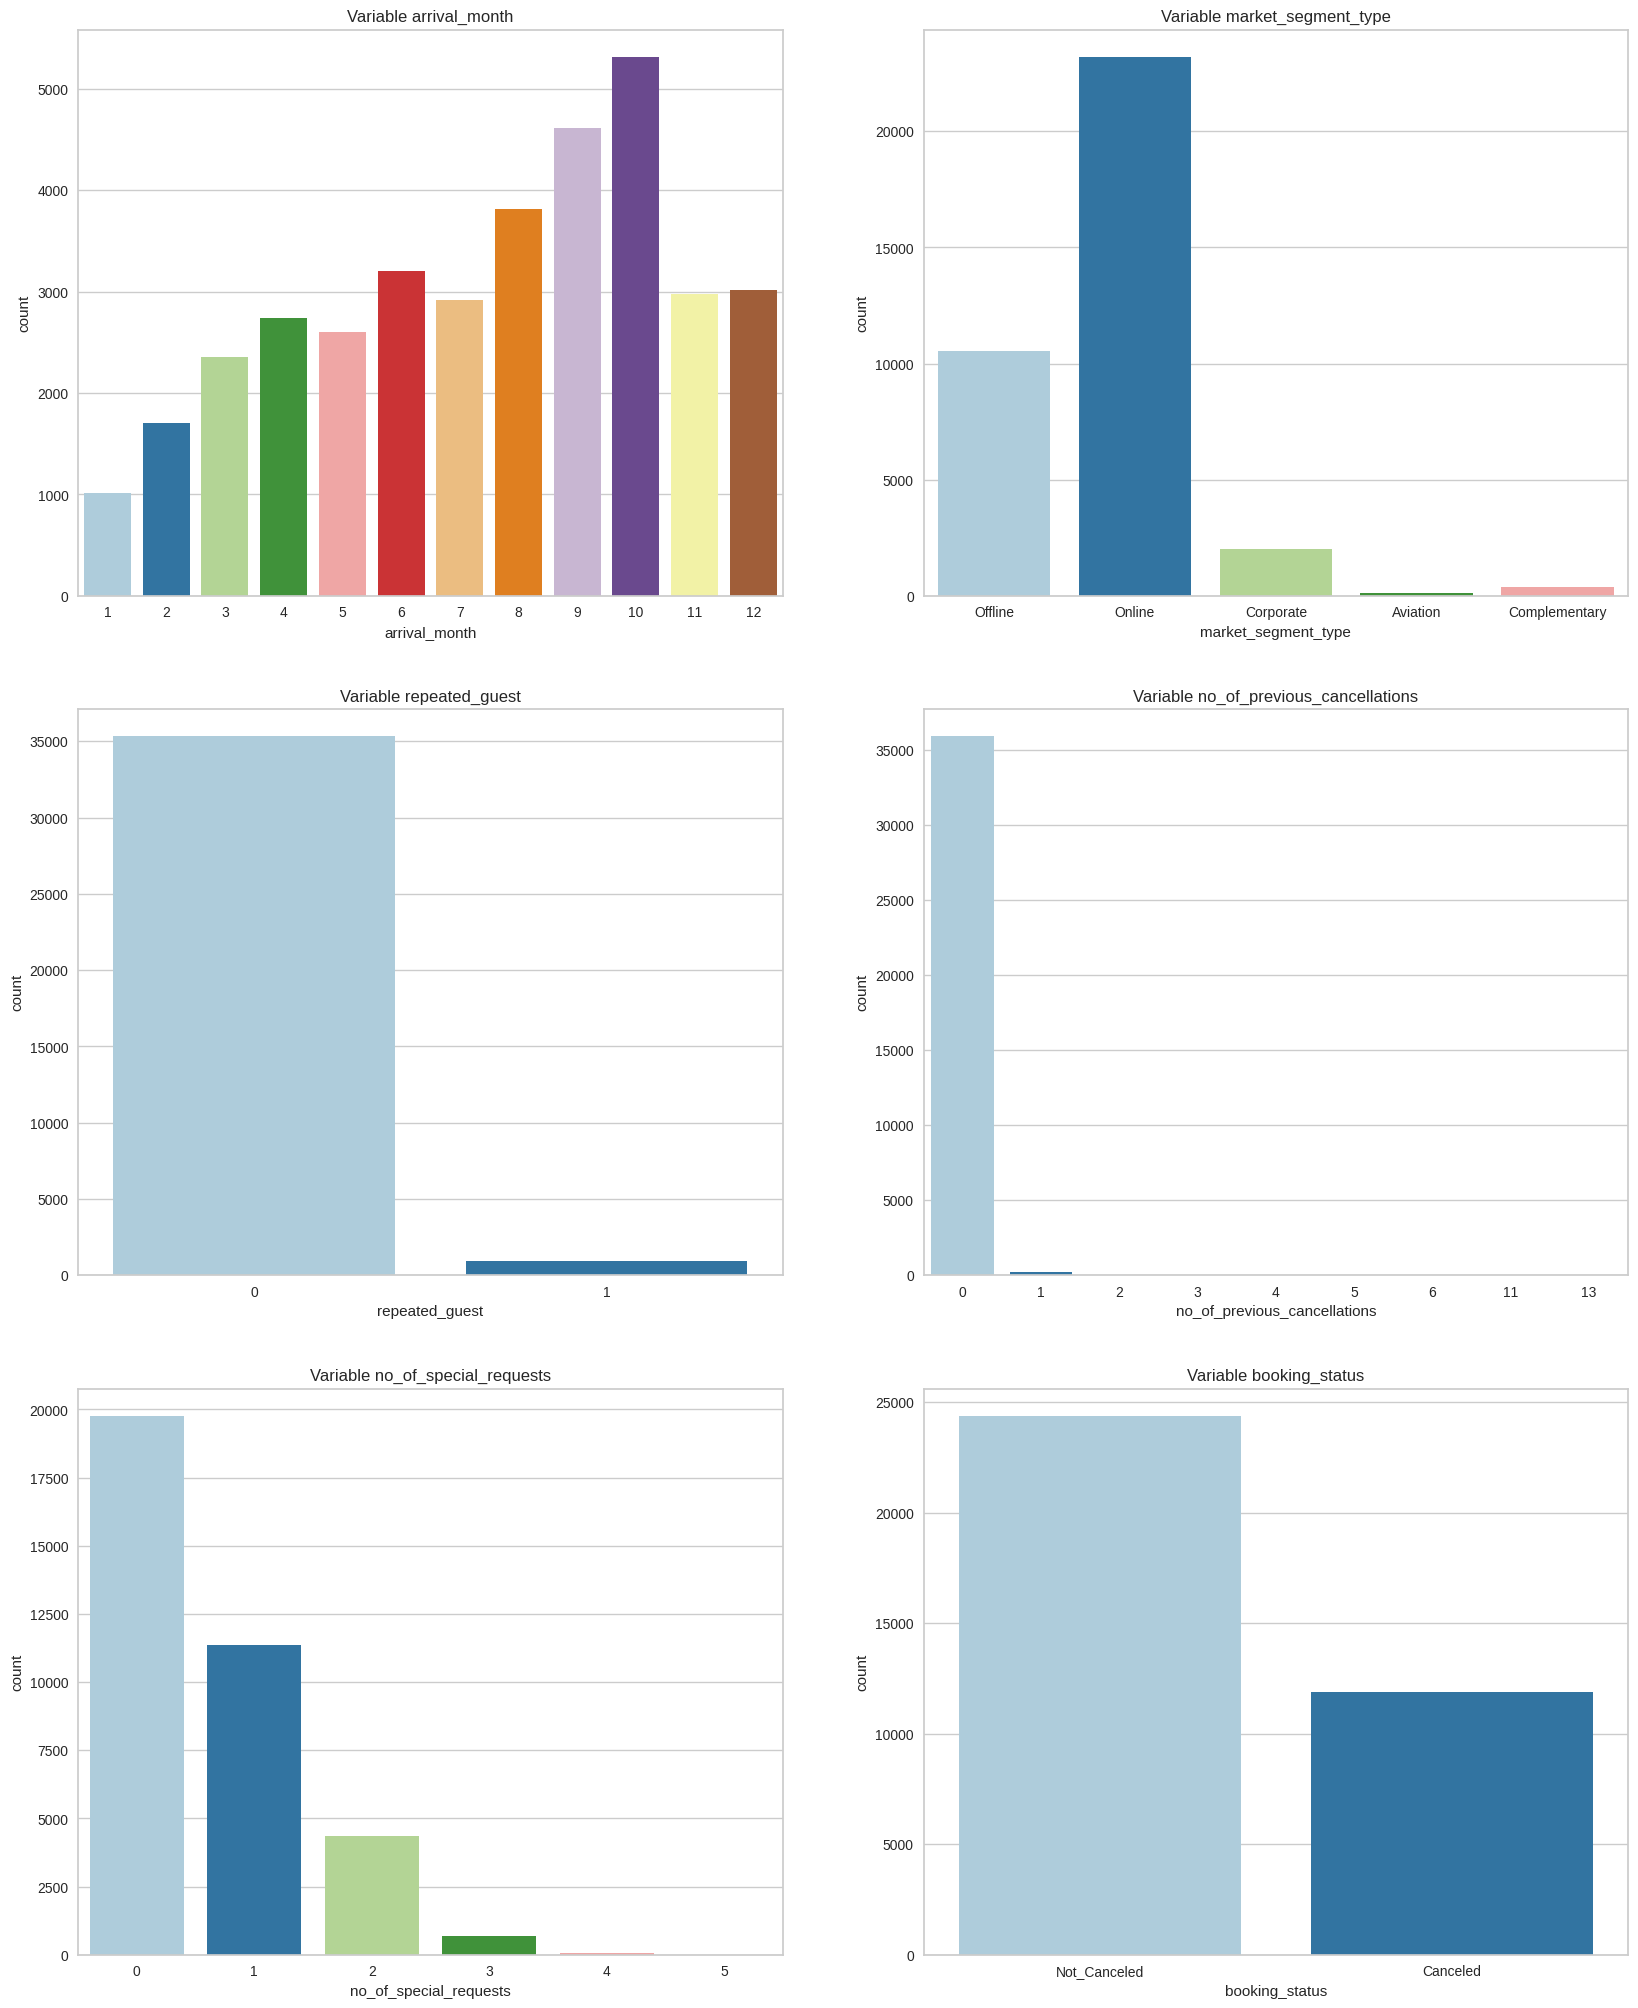

In [ ]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Paired', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Paired', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Paired', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Paired', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Paired', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Paired', data = df)

범주형 변수를 보면, 대부분의 예약은 성인 2명 객실, 어린이가 없는 객실, 일반적으로 단기 예약, 장기 예약은 많지 않으며, 대부분의 예약은 식사_플랜_1을 선택하며, 주차 공간이 필요 없으며, 가장 많은 예약 객실 유형은 유형 1과 4이며, 대부분의 데이터는 2018년 예약임을 알 수 있습니다

월별로 예약을 살펴보면 1월부터 10월까지 예약 건수가 점차 증가하다가 11월과 12월에 다시 감소하는 것을 볼 수 있으며, 대부분의 예약은 온라인으로 이루어지며, 대부분의 투숙객들은 호텔에 가본 적이 없는 투숙객들이며, 보통 취소한 적이 없는 투숙객들입니다, 특별 요청의 수가 많을수록 데이터는 줄어듭니다. 우리가 우리의 목표 변수를 보면, 우리는 약 65%의 예약이 취소되지 않았다는 것을 알 수 있습니다.

Continous Variables

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='Count'>

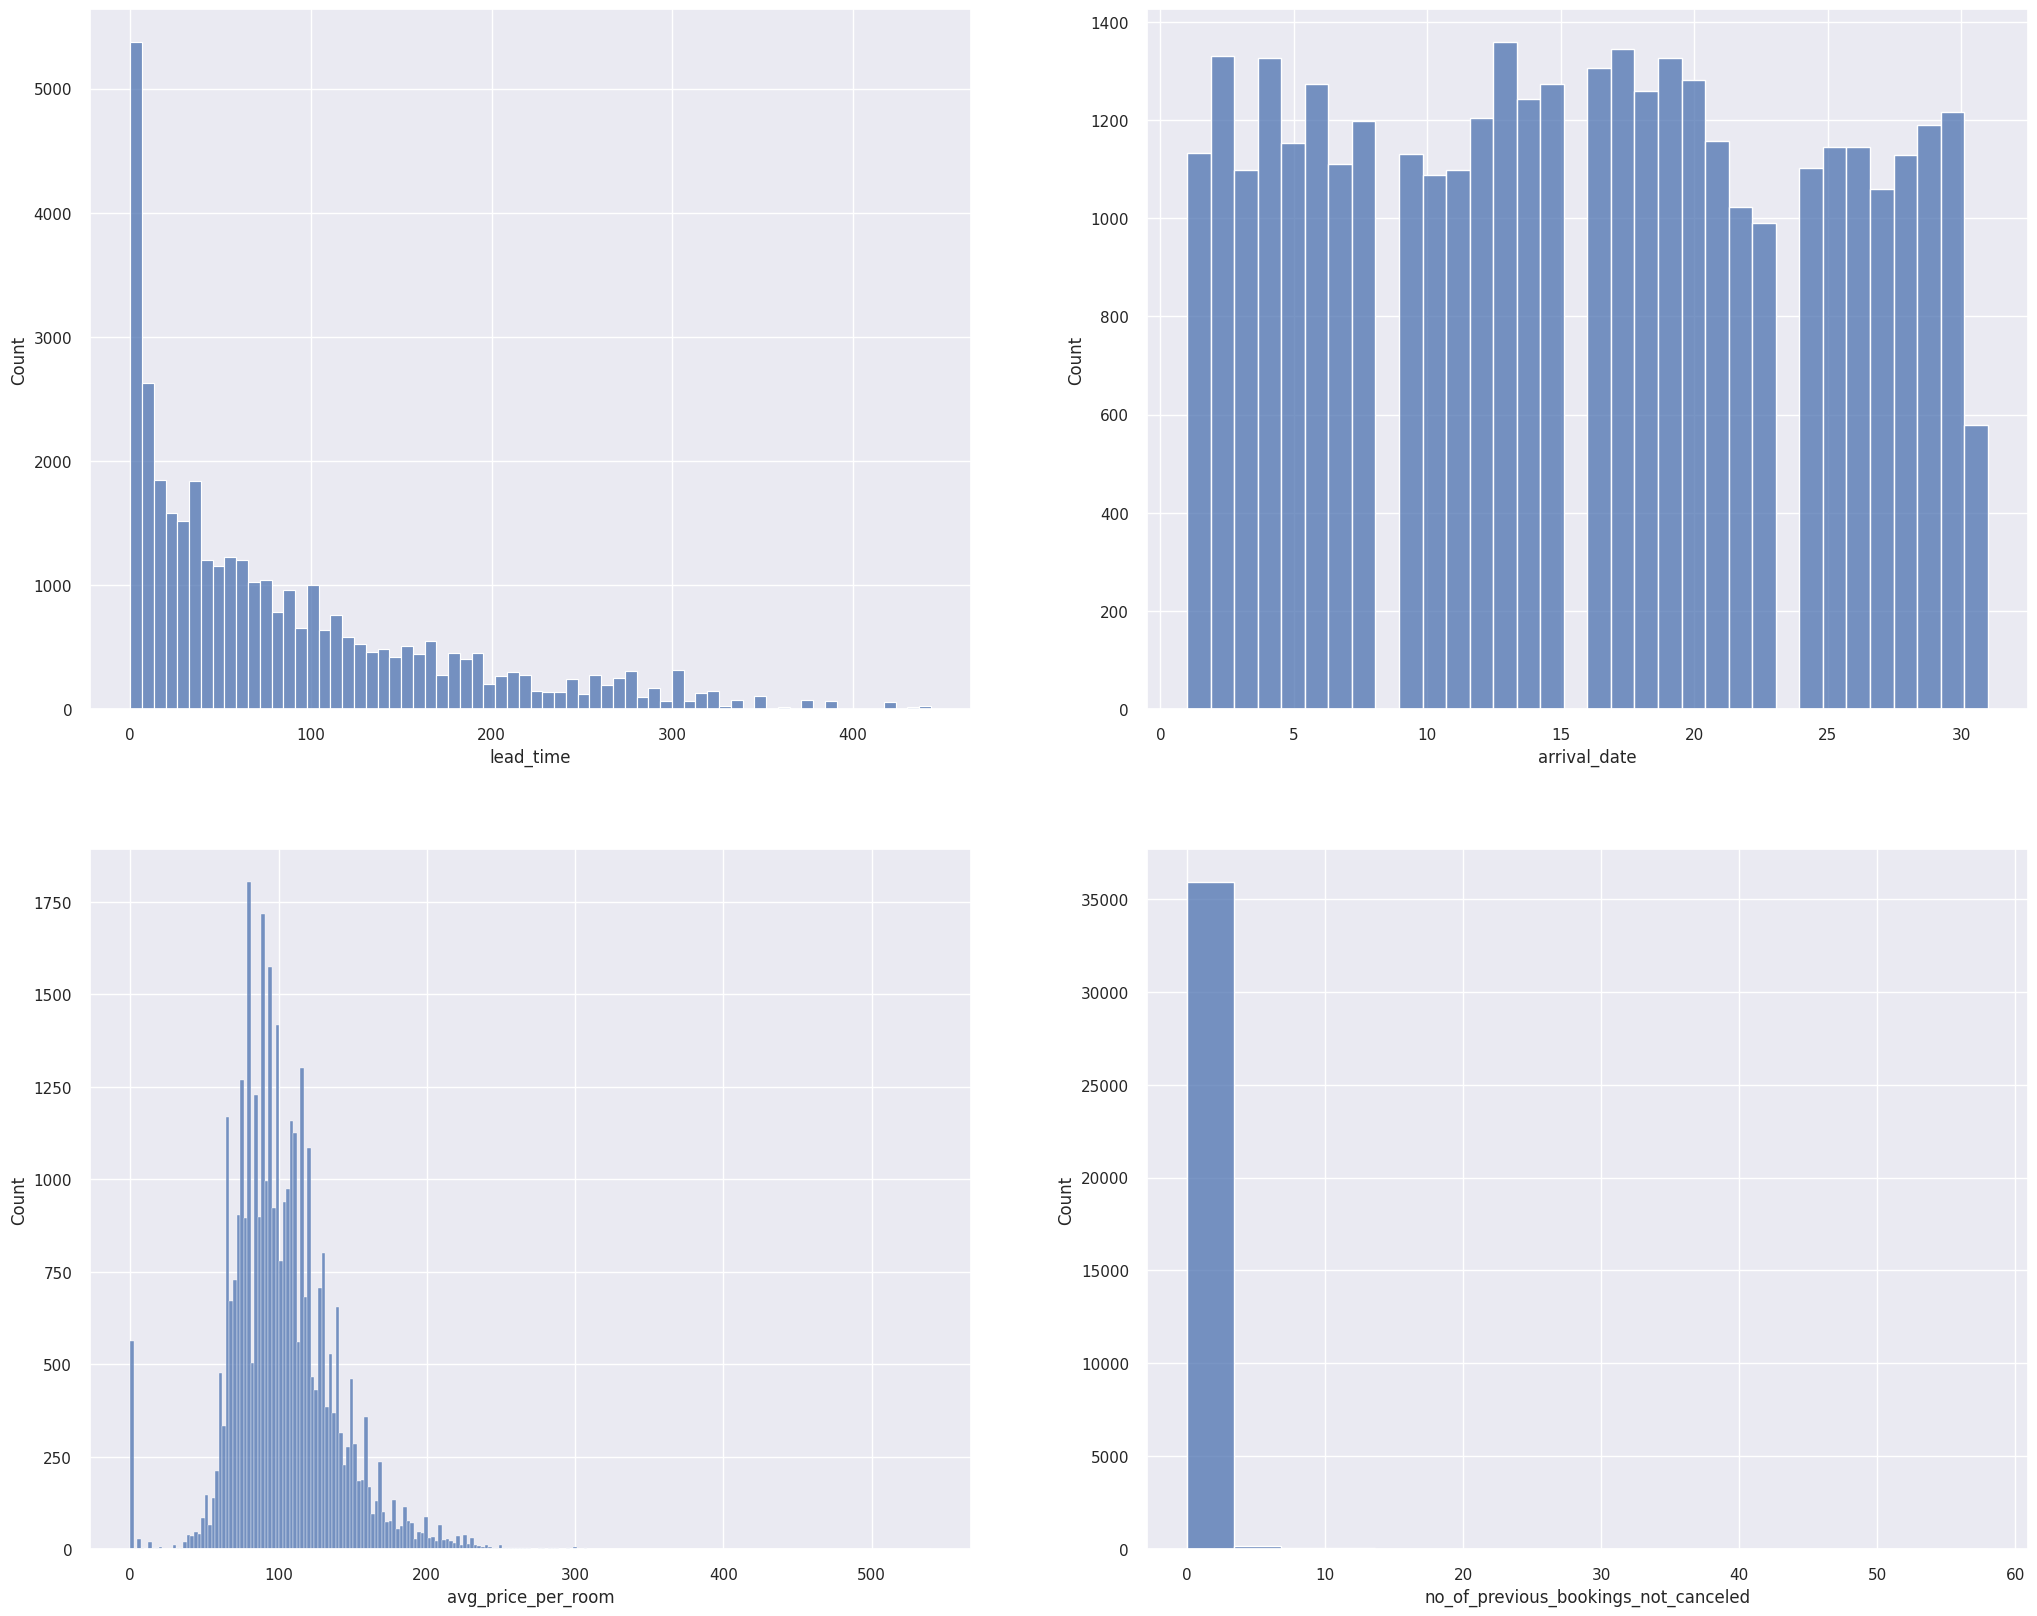

In [ ]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['arrival_date'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,4)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)

<Axes: title={'center': 'Boxplot lead_time'}, xlabel='lead_time'>

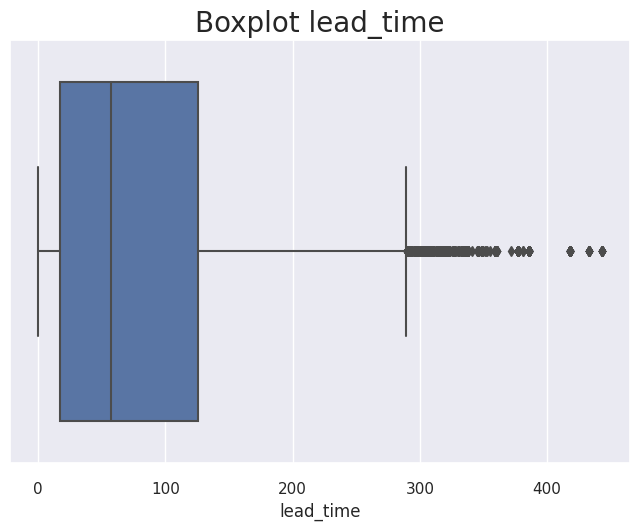

In [ ]:
plt.title("Boxplot lead_time", fontdict = {'fontsize': 20})
sns.boxplot(x=df["lead_time"])

<Axes: title={'center': 'Boxplot avg_price_per_room'}, xlabel='avg_price_per_room'>

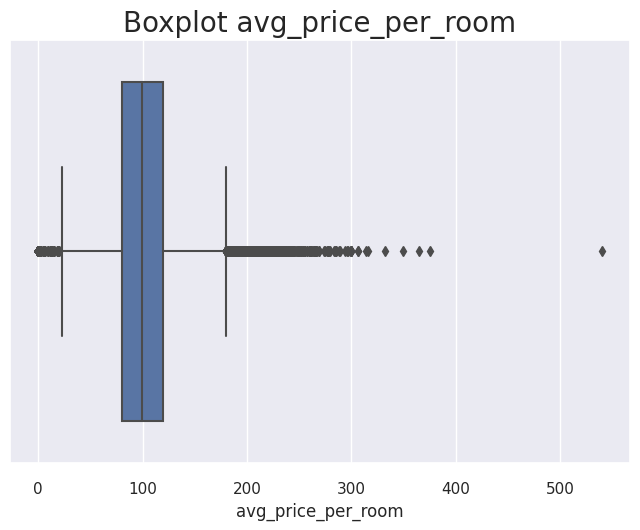

In [ ]:
plt.title("Boxplot avg_price_per_room", fontdict = {'fontsize': 20})
sns.boxplot(x=df["avg_price_per_room"])

Continous Variables를 보면 일반적으로 너무 오래 걸리지 않고 예약이 이루어지는 것을 알 수 있으며, 시간이 오래 걸릴수록 예약 수가 적음을 알 수 있습니다. 우리는 우리의 데이터 상단이 보통 객실의 평균 가격인 100유로이고 손님들이 이전에 예약을 취소한 적이 없다는 것을 알 수 있습니다.
박스 플롯을 확인할 때, 우리는 몇 가지 특이치가 있다는 것을 알 수 있지만, 지금은 그것들을 다루지 않을 것입니다.

Bivariate Analysis

<Axes: xlabel='booking_status', ylabel='count'>

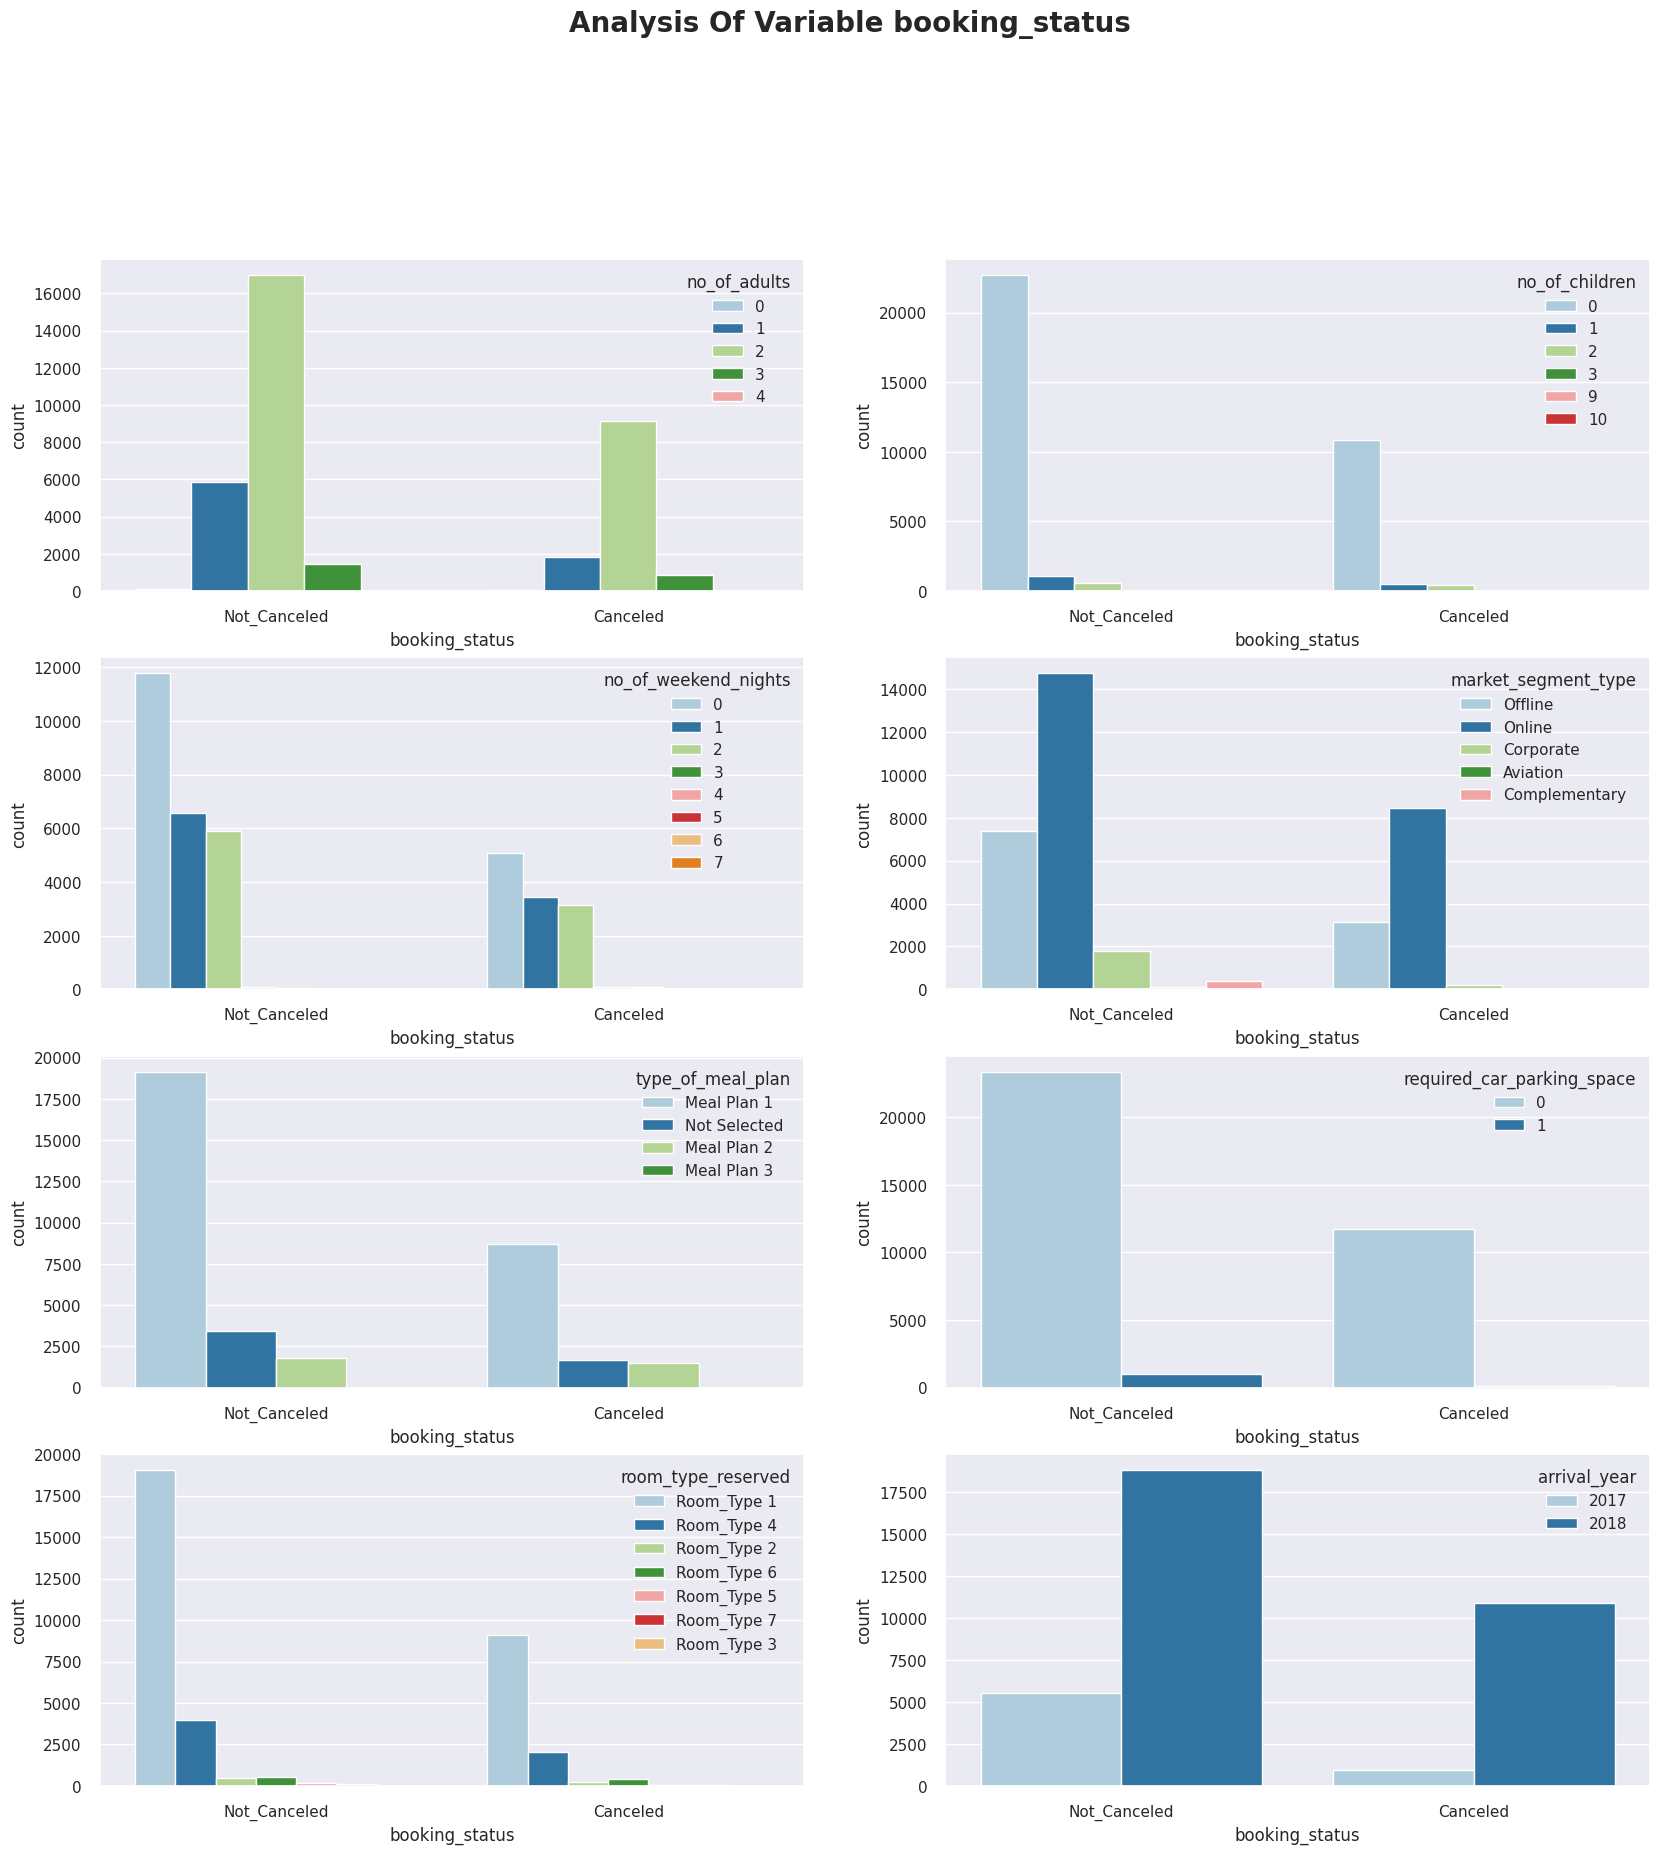

In [ ]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Paired', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Paired', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Paired', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Paired', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Paired', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Paired', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Paired', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Paired', data = df)

<ipython-input-18-c38f604901af>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Paired', shade=True, data=df)
<ipython-input-18-c38f604901af>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Paired', shade=True, data=df)
<ipython-input-18-c38f604901af>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Paired', shade=True, data=df)
<ipython-input-18-c38f604901af>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an e

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='Density'>

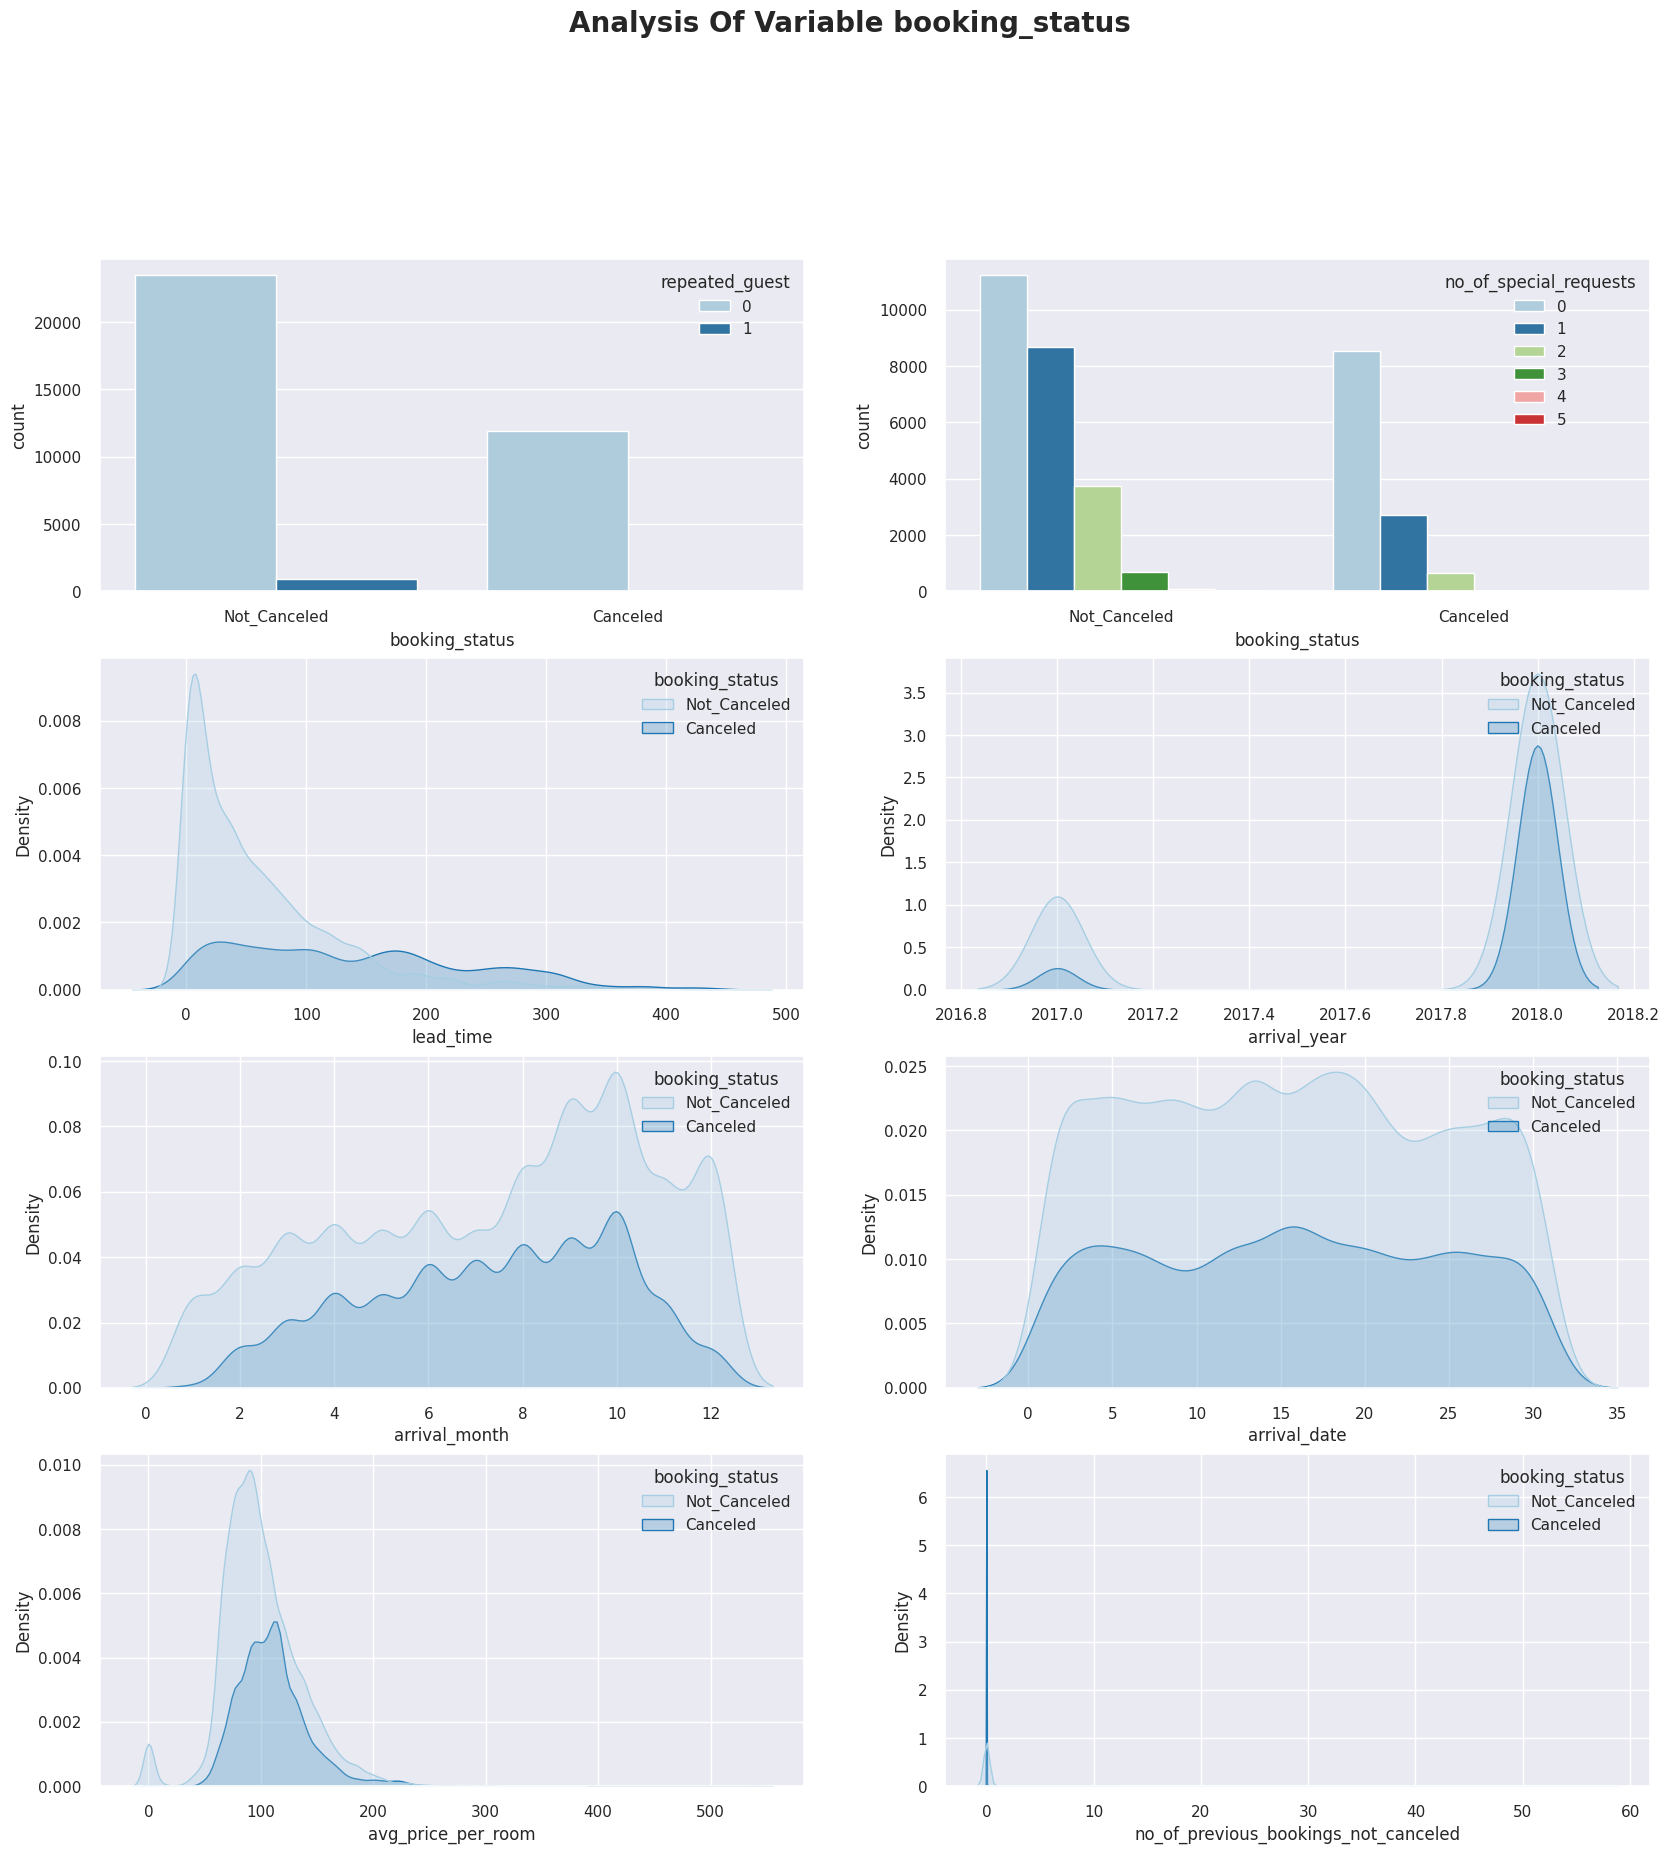

In [ ]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Paired', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Paired', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Paired', shade=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Paired', shade=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Paired', shade=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Paired', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Paired', shade=True, data=df)

plt.subplot(5,2,8)
sns.kdeplot(x='no_of_previous_bookings_not_canceled', hue='booking_status', palette = 'Paired', shade=True, data=df)





우리의 목표 변수를 보면, 우리는 견해를 얻을 수 있습니다. 일반적으로 주차 공간을 요청하는 손님들, 이전에 묵었던 손님들은 일반적으로 예약을 취소하지 않는 손님들, 특별 요청을 요청하는 손님들은 취소할 가능성이 적은 손님들, 더 많은 요청을 할수록 더 적은 가능성이 있습니다, 여기서 볼 수 있는 가장 큰 왜곡은 Lead_Time 변수입니다. 사람들이 방을 예약하는 데 시간이 오래 걸릴수록 취소할 가능성이 높아집니다. 이것은 말이 됩니다. 또 다른 흥미로운 견해는 1년의 마지막 3개월 동안은 약간의 경사에도 불구하고 취소가 적다는 것입니다, 우리는 더 비싼 방들도 더 많은 취소를 경험할 수 있다는 것을 알 수 있습니다.

앞서 살펴본 바와 같이 Lead_Time 변수는 취소와 미취소의 차이가 가장 큰 변수였기 때문에 좀 더 자세히 살펴보도록 하겠습니다,

<ipython-input-19-69ae630575cb>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Paired', shade=True, data=df)
<ipython-input-19-69ae630575cb>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Paired', shade=True, data = df)
<ipython-input-19-69ae630575cb>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Paired', shade=True, data = df)
<ipython-input-19-69ae630575cb>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This wil

<Axes: xlabel='lead_time', ylabel='Density'>

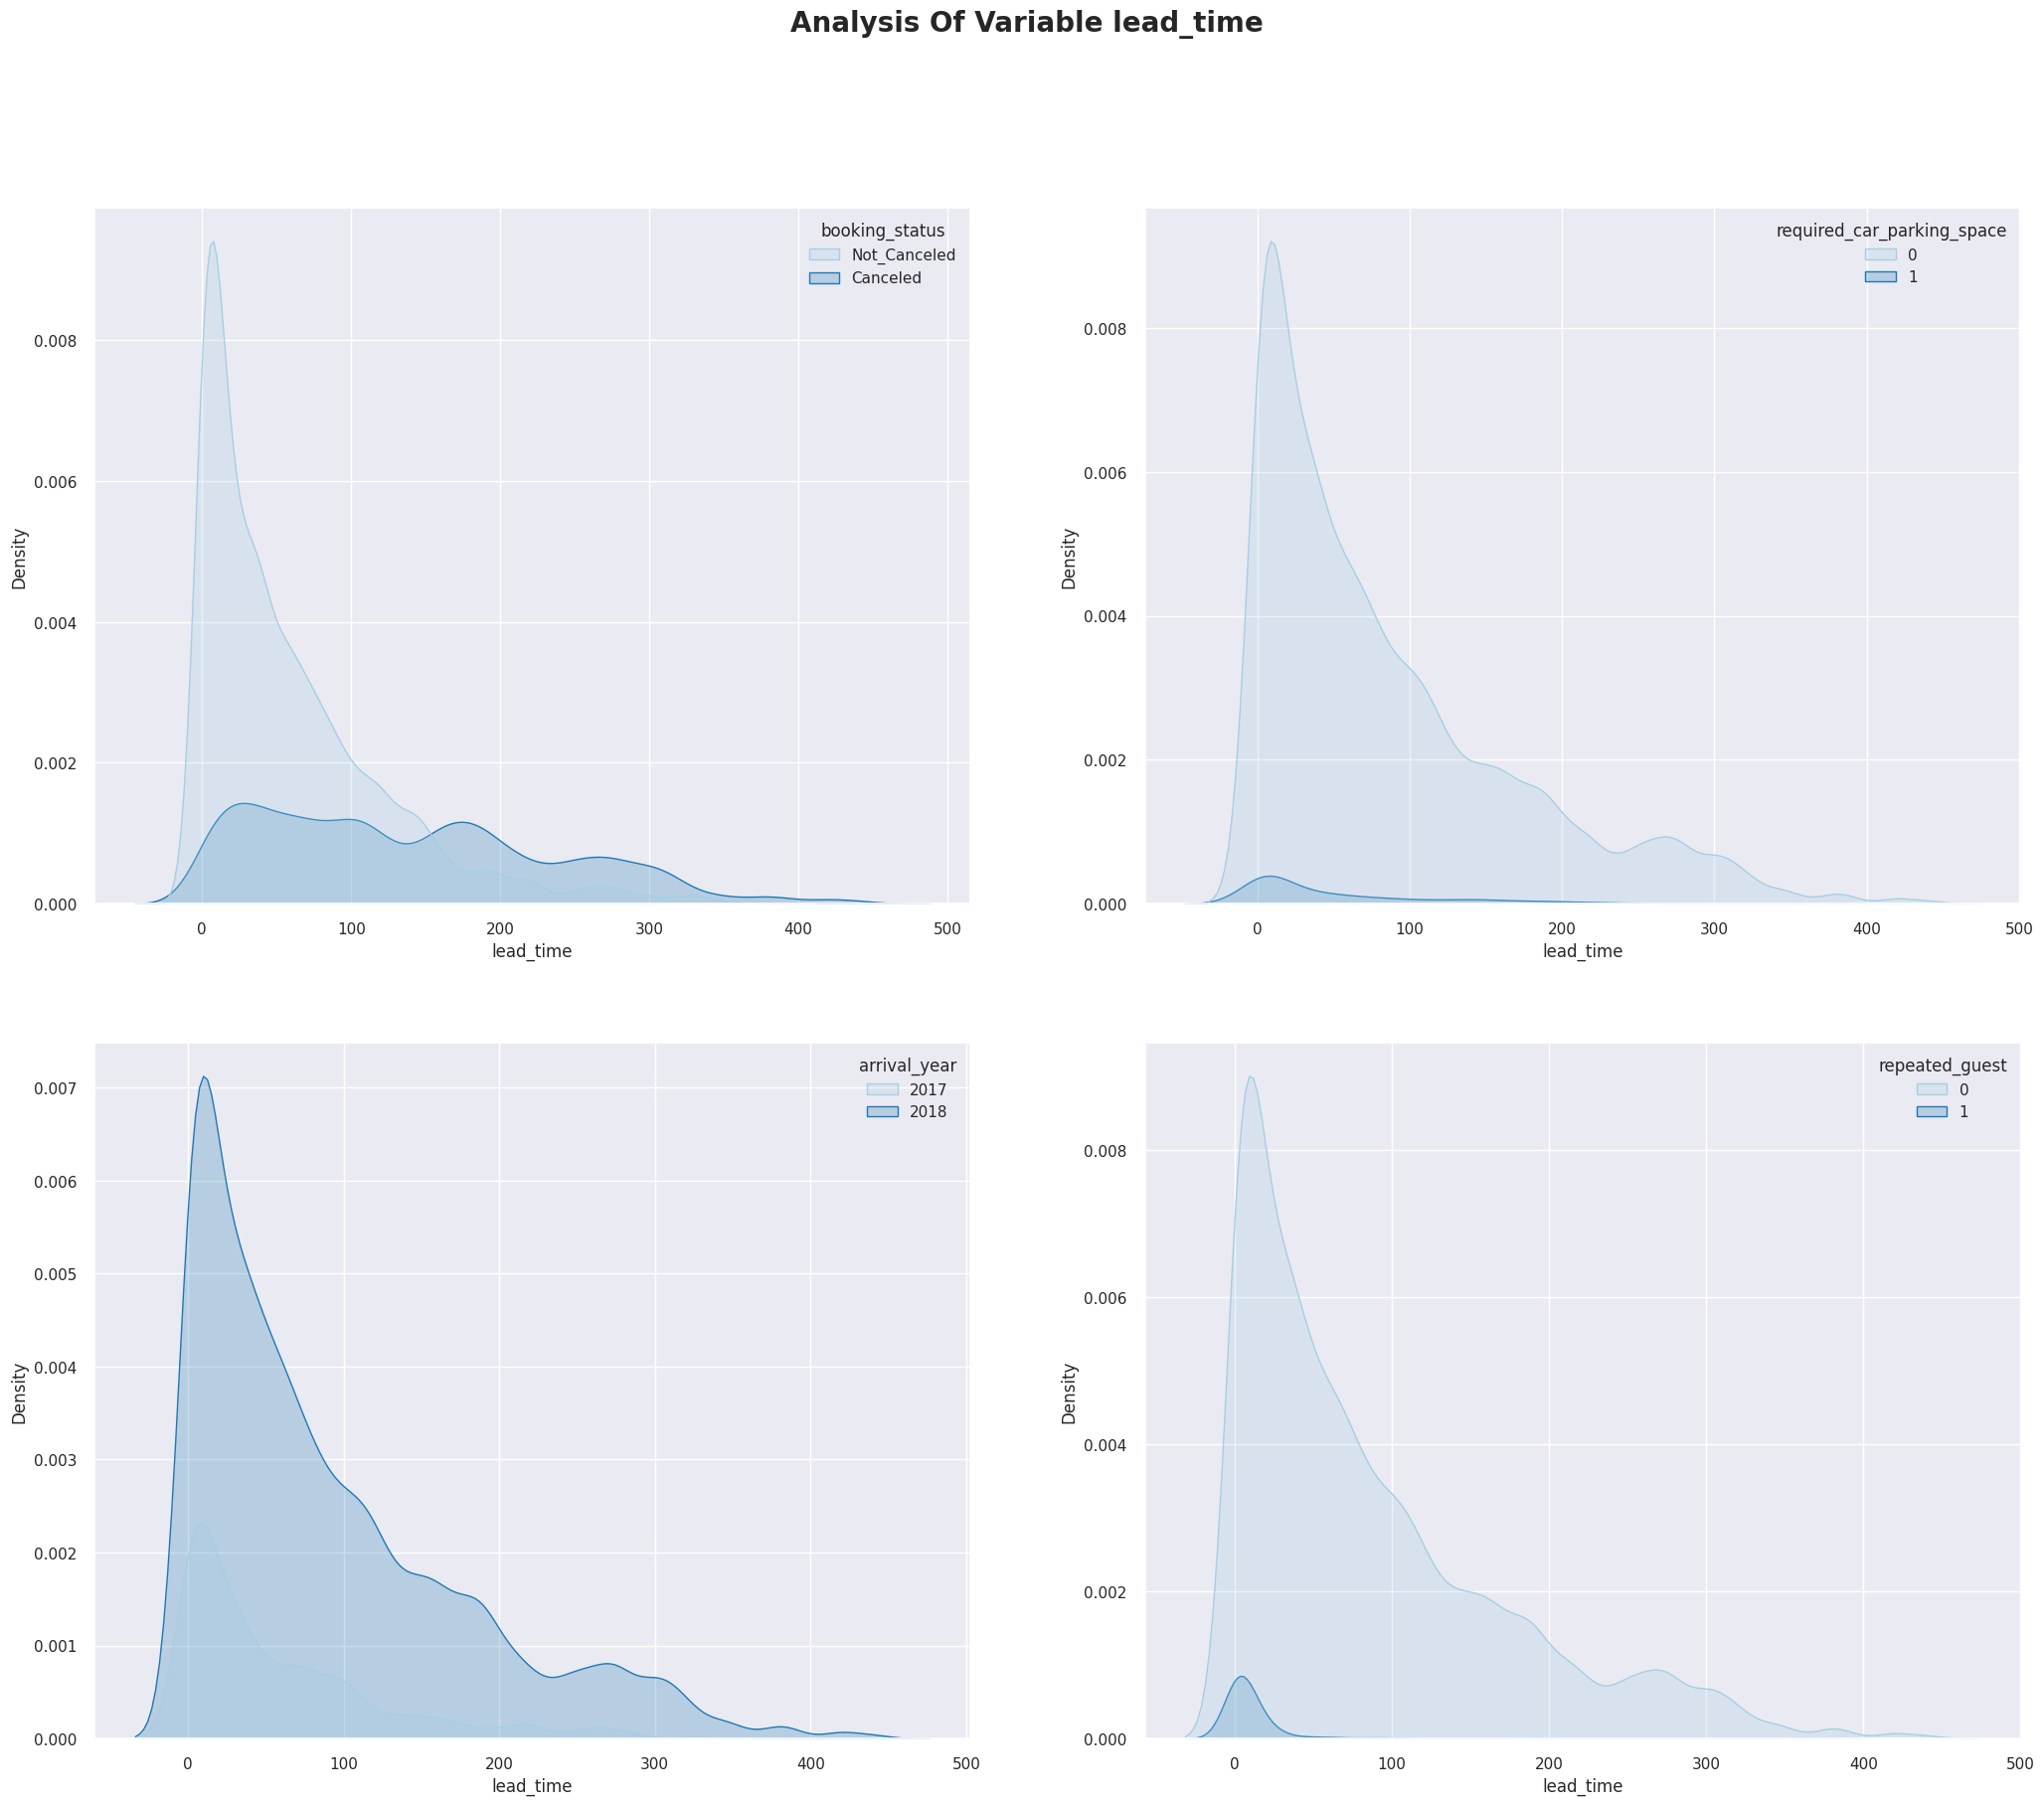

In [ ]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Paired', shade=True, data=df)

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Paired', shade=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Paired', shade=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Paired', shade=True, data=df)

<Axes: xlabel='no_of_special_requests', ylabel='lead_time'>

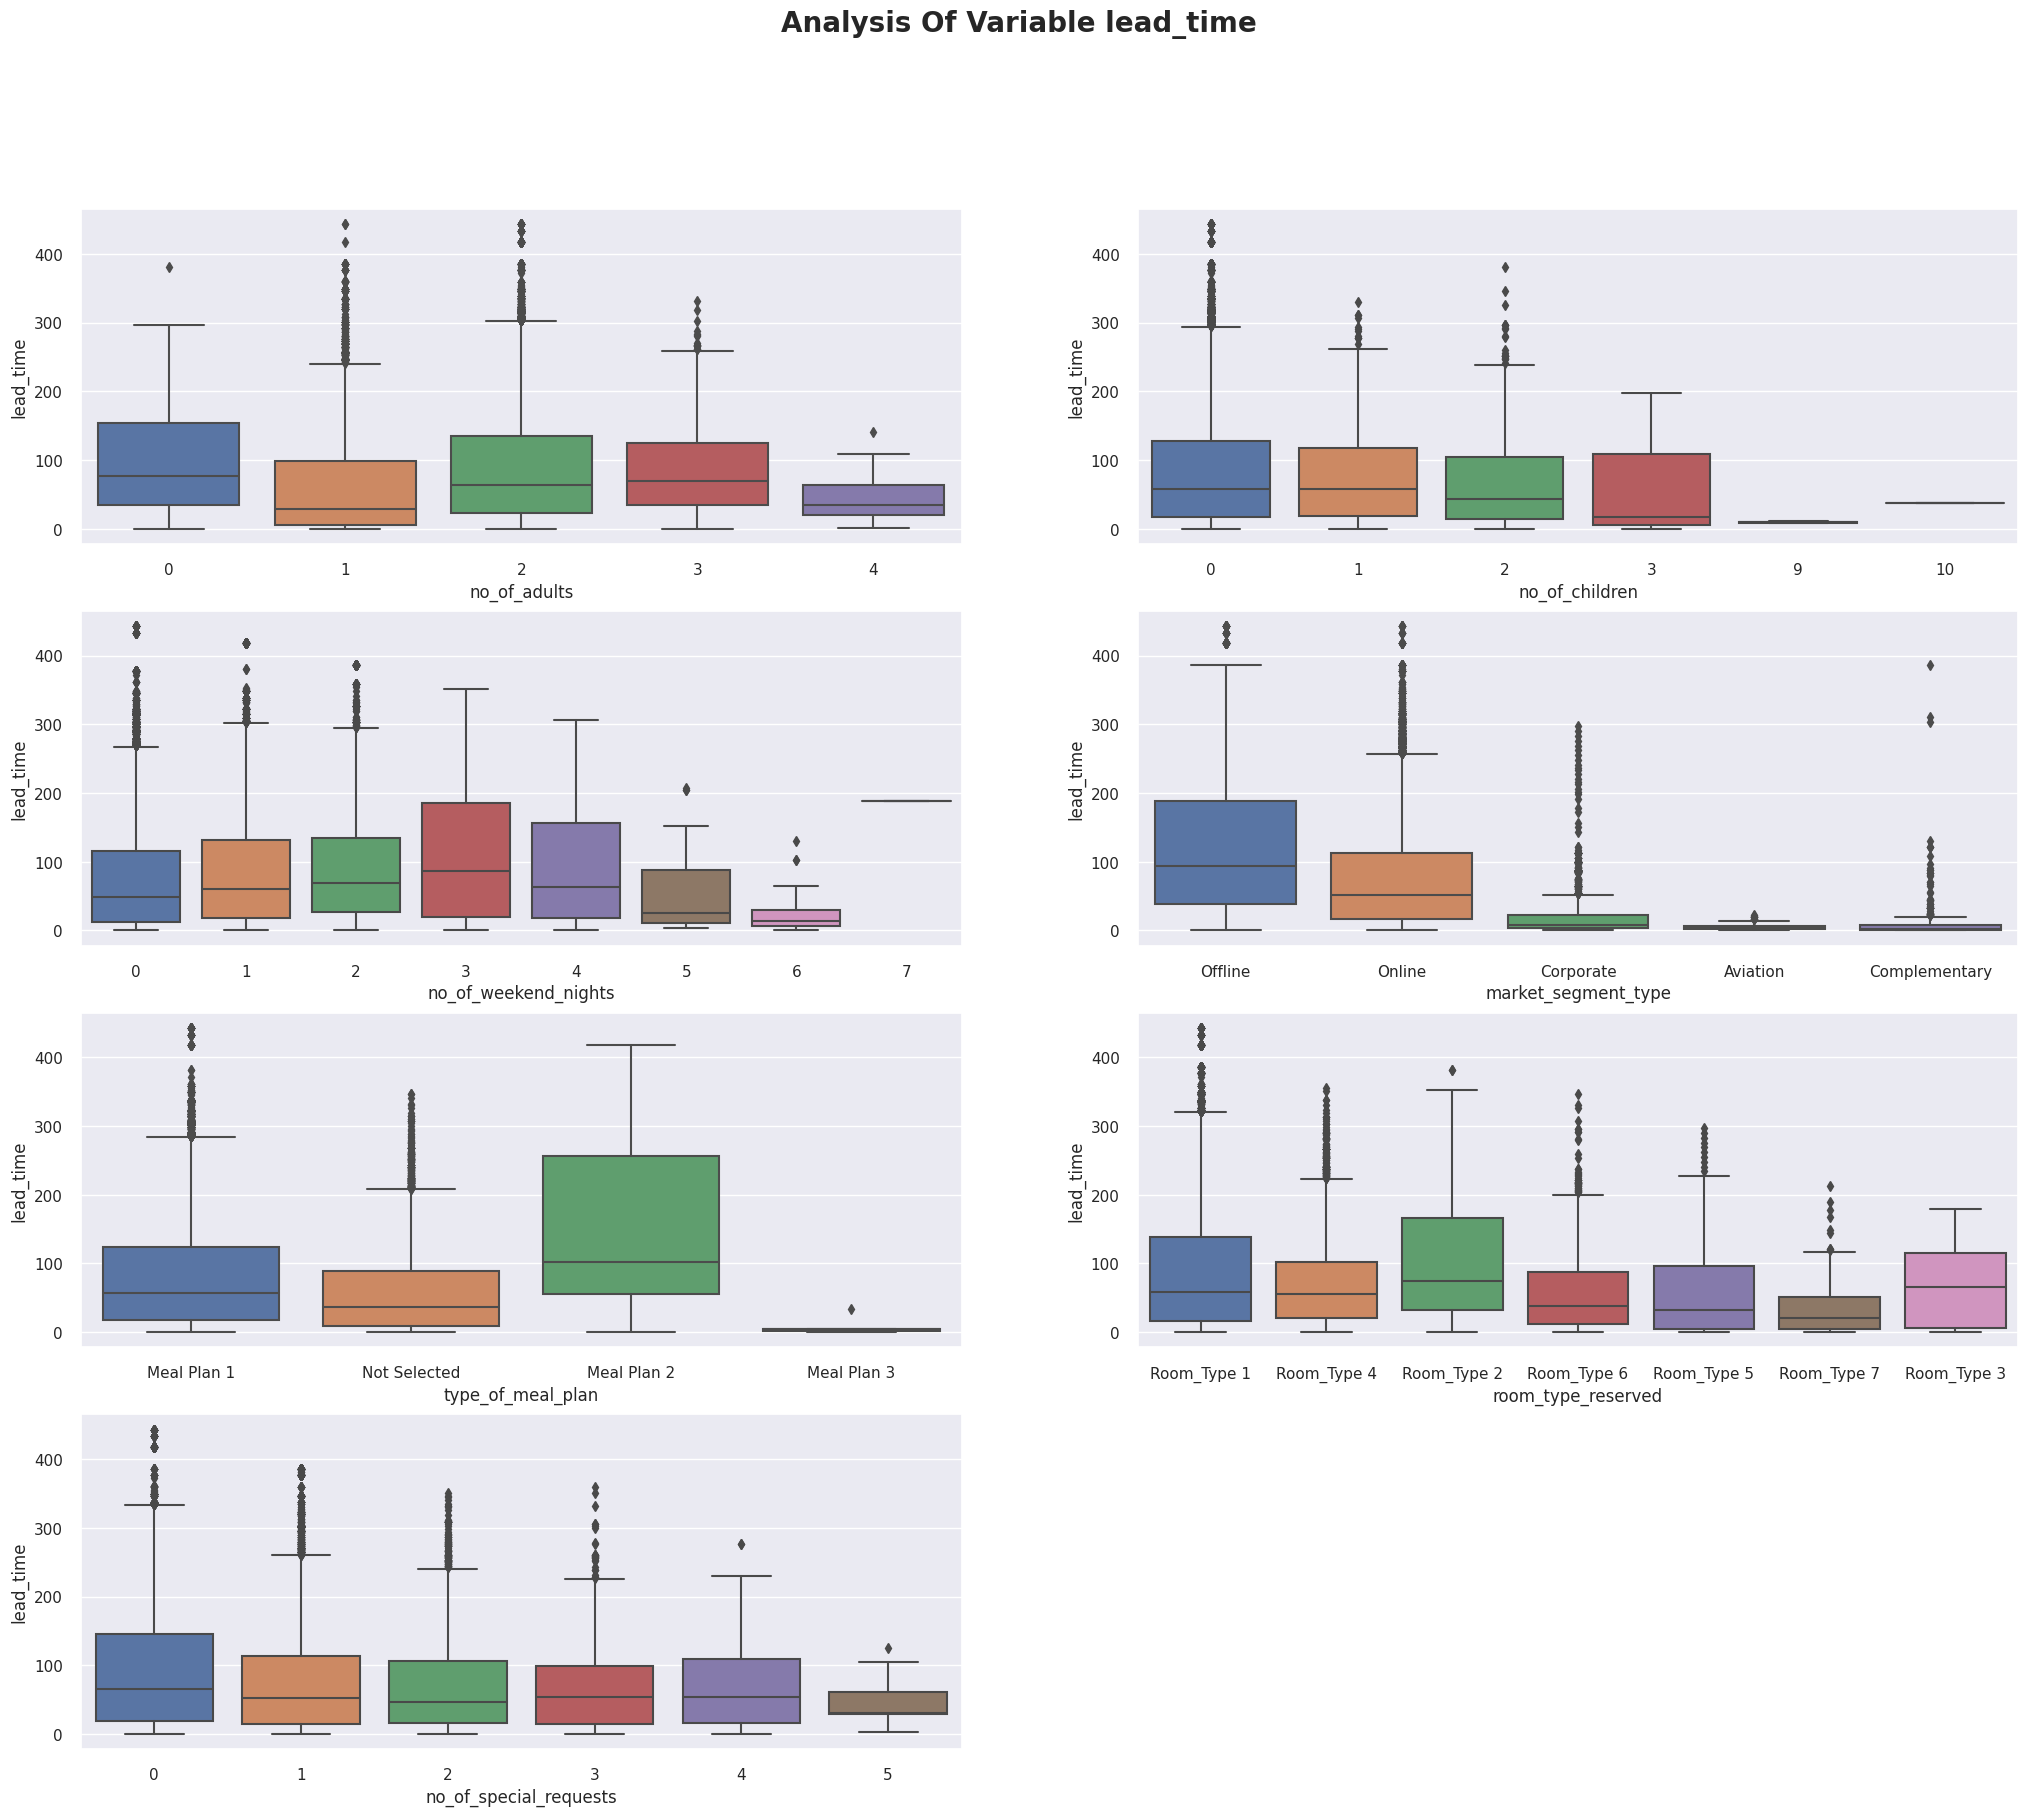

In [ ]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="no_of_adults", y="lead_time", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="no_of_children", y="lead_time", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="no_of_weekend_nights", y="lead_time", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="market_segment_type", y="lead_time", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="type_of_meal_plan", y="lead_time", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="room_type_reserved", y="lead_time", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="no_of_special_requests", y="lead_time", data=df)

 일반적으로 주차 공간을 요청하는 사람들은 이미 호텔에 투숙한 손님들과 동일한 것을 볼 수 있습니다, 우리가 주의를 환기시키는 다른 변수들을 볼 때, 변수 no_weekend_nights는 보통 3박 또는 4박을 하는 사람들이 리드 타임이 더 길며, segment_type을 보면 특별하게 예약한 경우 리드 타임이 길지 않습니다. 또한 type_of_meal의 경우 meal_plan2를 사용하는 고객은 대개 리드 타임이 매우 높습니다. room_type을 보면 다른 객실보다 빠르게 선택된 객실이 몇 개 있고 special_requests을 보면 시간이 걸리지만 리드 타임은 줄어듭니다

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='lead_time'>

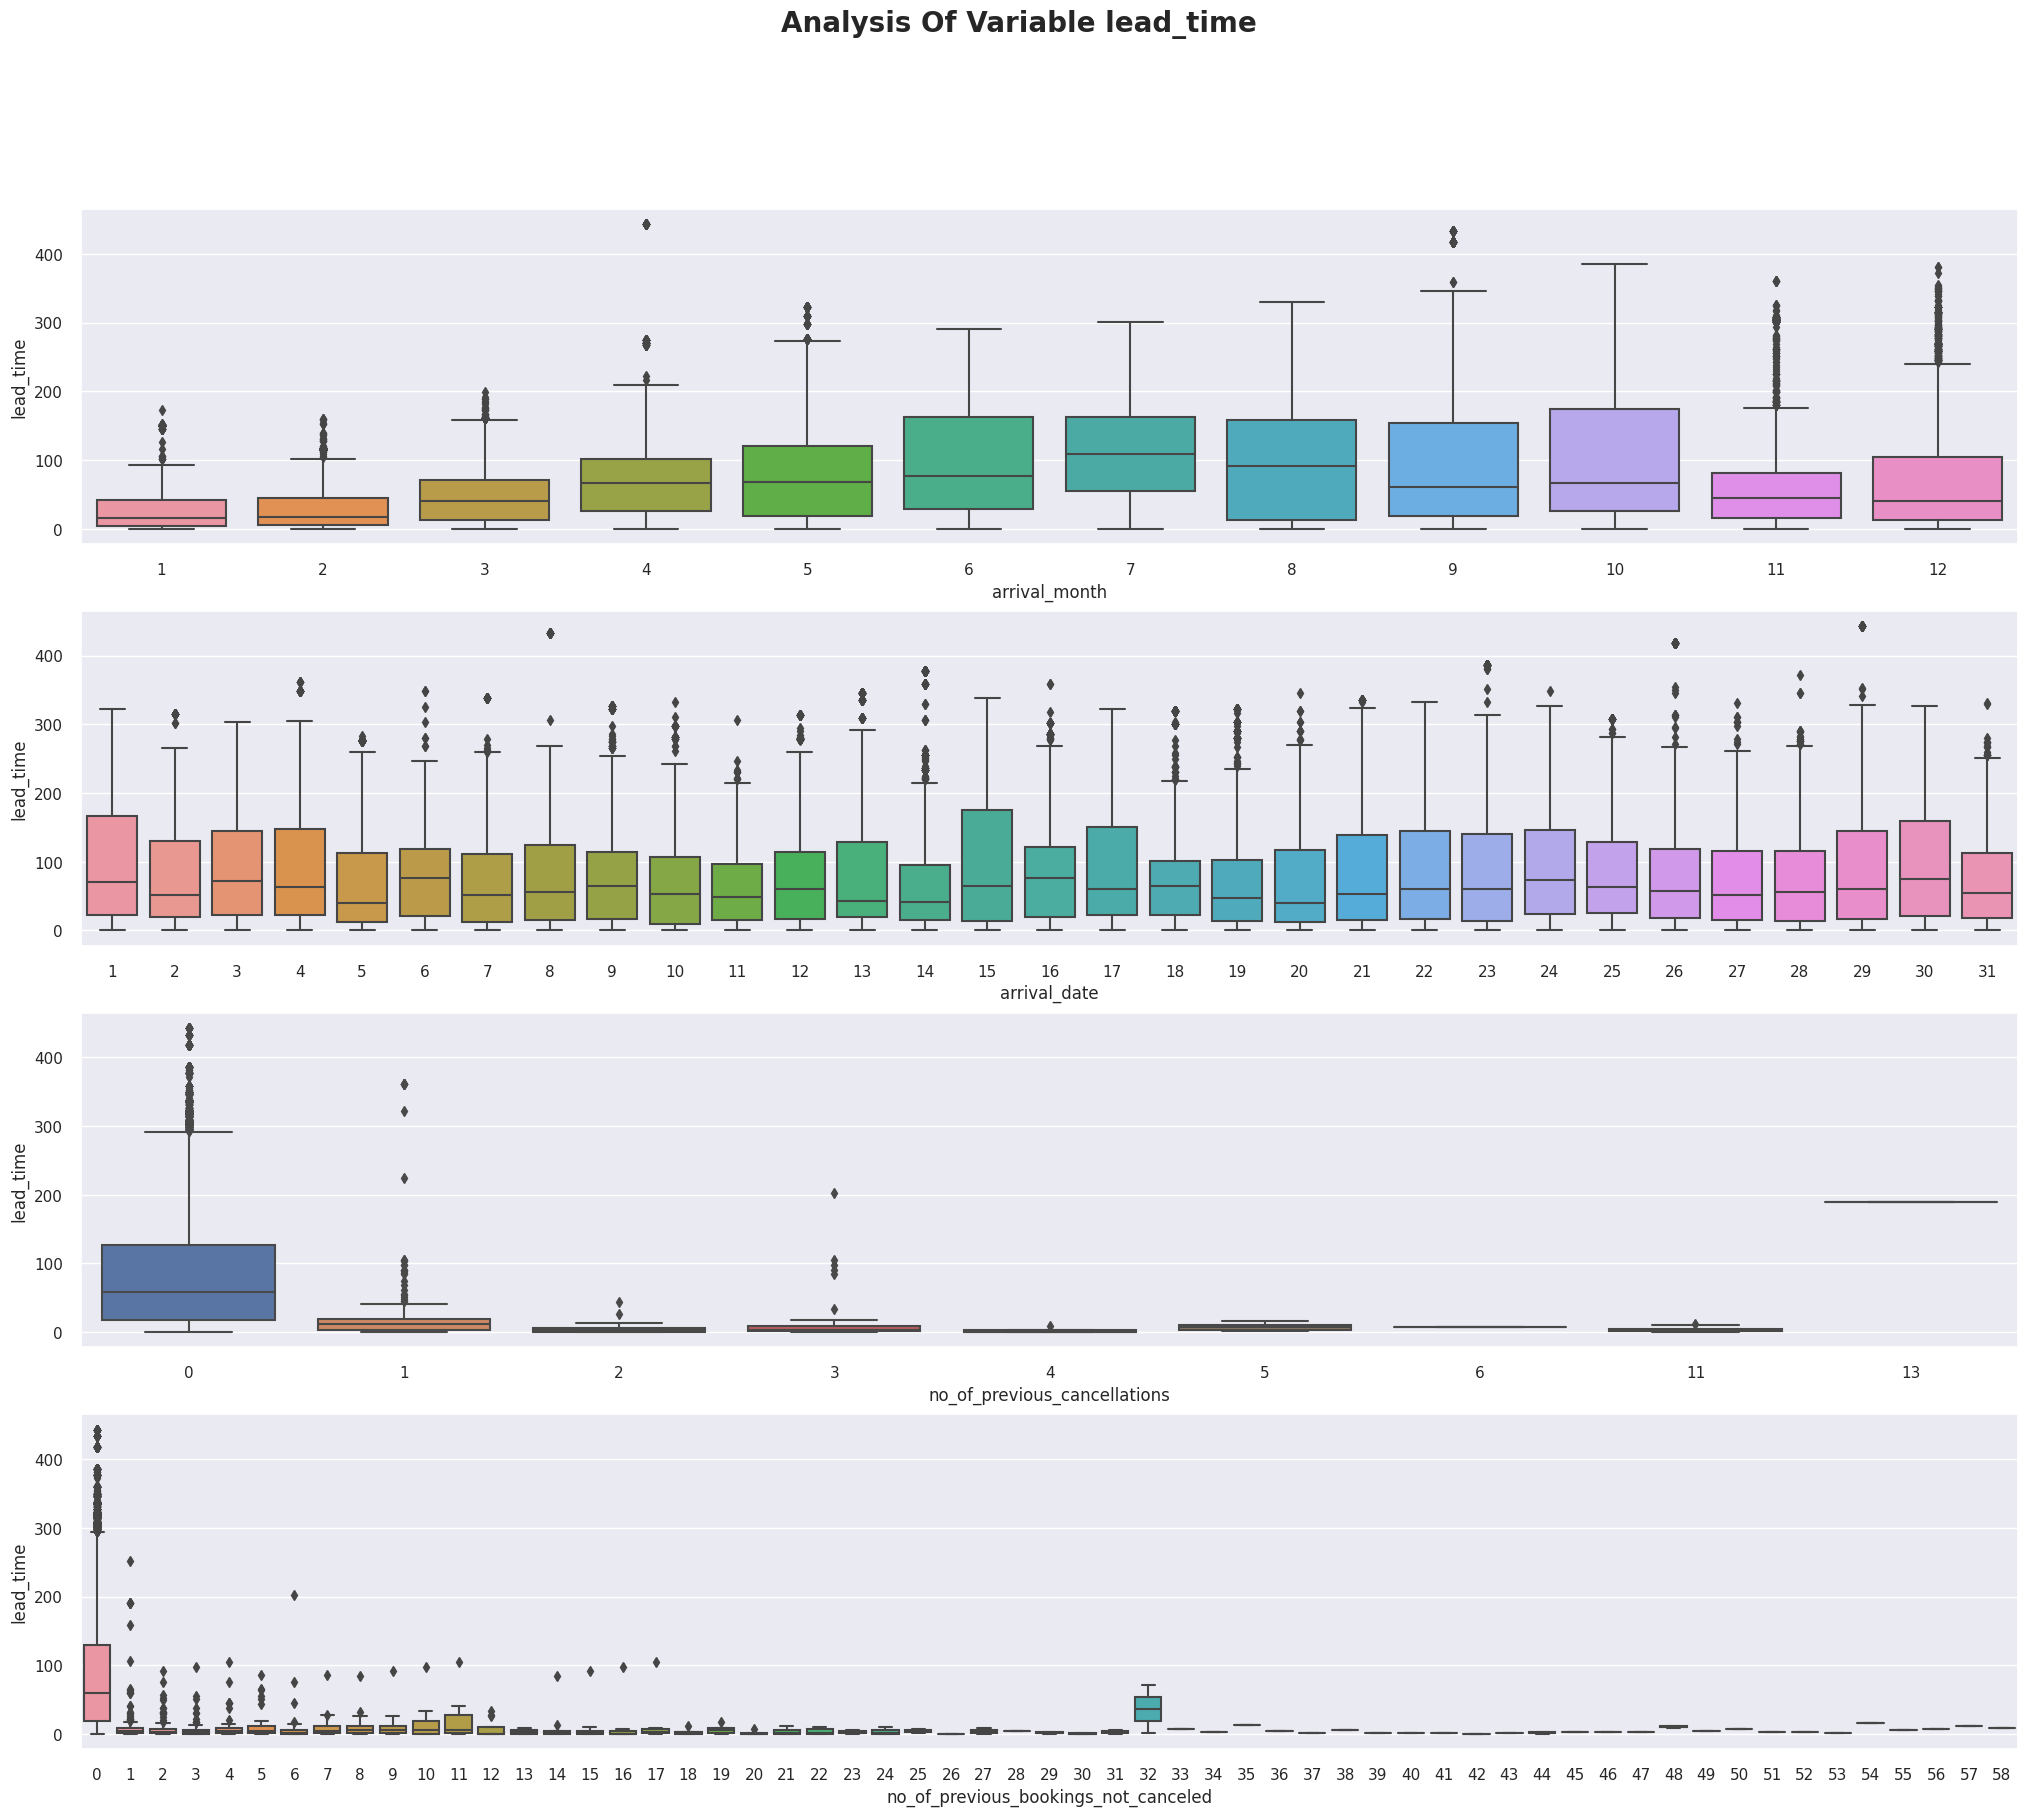

In [ ]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,1,1)
sns.boxplot(x="arrival_month", y="lead_time", data=df)

plt.subplot(4,1,2)
sns.boxplot(x="arrival_date", y="lead_time", data=df)

plt.subplot(4,1,3)
sns.boxplot(x="no_of_previous_cancellations", y="lead_time", data=df)

plt.subplot(4,1,4)
sns.boxplot(x="no_of_previous_bookings_not_canceled", y="lead_time", data=df)

<Axes: xlabel='lead_time', ylabel='avg_price_per_room'>

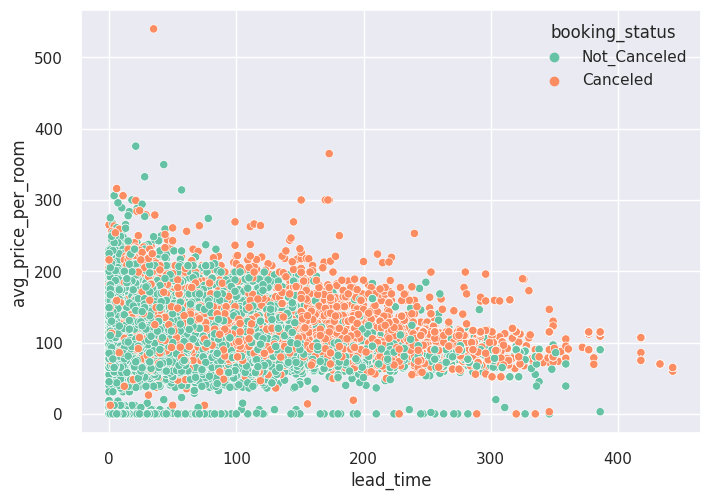

In [ ]:
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'Set2', hue = 'booking_status')

연초와 연말은 예약이 더 빨리 이뤄지는 달이고, 이전에 예약을 취소한 손님과 이전에 숙박하지 않은 손님을 보면 같은 패턴을 볼 수 있는데, 호텔을 이미 알고 있는 사람은 리드타임이 높지 않다는 것을 알 수 있습니다.

가격과 리드타임이 길어질수록 취소하는 비율이 높아지는 것을 확인 할 수 있다.

전처리

In [ ]:
df = df.drop('Booking_ID', axis = 1)

Booking_ID는 고유한 값을 가지는 feature이므로 제거하였다.

In [ ]:
df.head(1)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0                65.0   

   no_of_special_requests booking_status  
0                       0   Not_Canceled

In [ ]:
df_encoded=df
df_encoded = pd.get_dummies(df_encoded, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], drop_first=True)


원 핫 인코딩 이후 차원을 줄이기 위해 drop first 옵션을 사용

In [ ]:
df.shape

(36275, 18)

In [ ]:
df_encoded.shape

(36275, 28)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [ ]:
df_encoded.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
type_of_meal_plan_Meal Plan 2           0
type_of_meal_plan_Meal Plan 3           0
type_of_meal_plan_Not Selected          0
room_type_reserved_Room_Type 2          0
room_type_reserved_Room_Type 3          0
room_type_reserved_Room_Type 4          0
room_type_reserved_Room_Type 5          0
room_type_reserved_Room_Type 6          0
room_type_reserved_Room_Type 7          0
market_segment_type_Complementary 

결측치는 없다.

플랏을 확인해 본 결과 이상치를 제거하지 않고 사용하는 것이 적절하다고 판단하였다.

그 이유는 우선 각 방의 가격의 평균은 103.423539유로 인 반면 540유로의 값을 가지는 인스턴스가 있지만 해당 가격은 충분히 현실에서 나올만한 가격이므로 이상치로 보지 않고 유지하는 것이 조금 더 일반화에 적절 할 수 있다고 판단하였다.

이상치를 제거하지않았으므로 스케일링 과정에서 해당 데이터의 영향을 줄이기 위해 robust 스케일링을 사용하여야 한다.

피쳐선택 높은 상관 관계를 가지는 feature가 없었기에 X

##데이터 분할

우선 데이터를 분할하기에 앞서 레이블이 불균형을 모이는 레이블이었기에 이를 고려하여 stratified 분할로 비율을 맞춰서 분할하는 방법과 오버 샘플링 및 언더 샘플링을 하여 데이터 수를 맞춰주는 방법으로 진행하도록 한다.

In [ ]:
X = df_encoded.drop(['booking_status_Not_Canceled'], axis = 1)
X = X.values
y = df_encoded['booking_status_Not_Canceled']

In [ ]:
from sklearn.preprocessing import RobustScaler

# X: feature들로 이루어진 2D 배열
# RobustScaler 객체 생성
scaler = RobustScaler()
# 로버스트 스케일링 수행
X = scaler.fit_transform(X)

In [ ]:
X_stratified = X
y_stratified = y

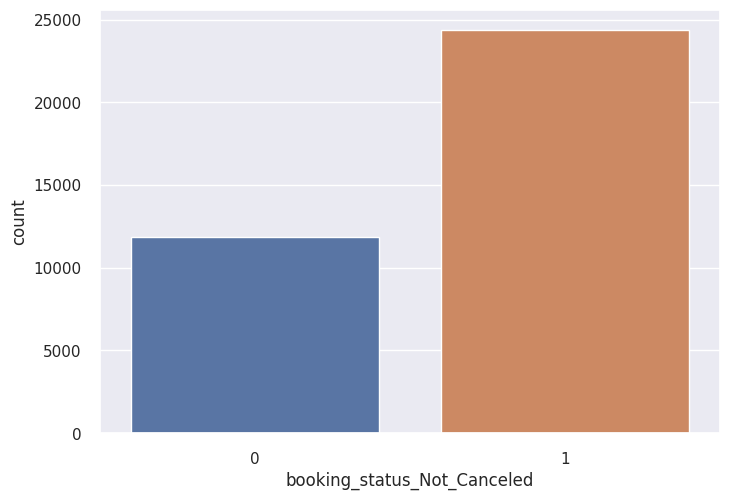

In [ ]:
sns.countplot(x=y_stratified)
plt.show()

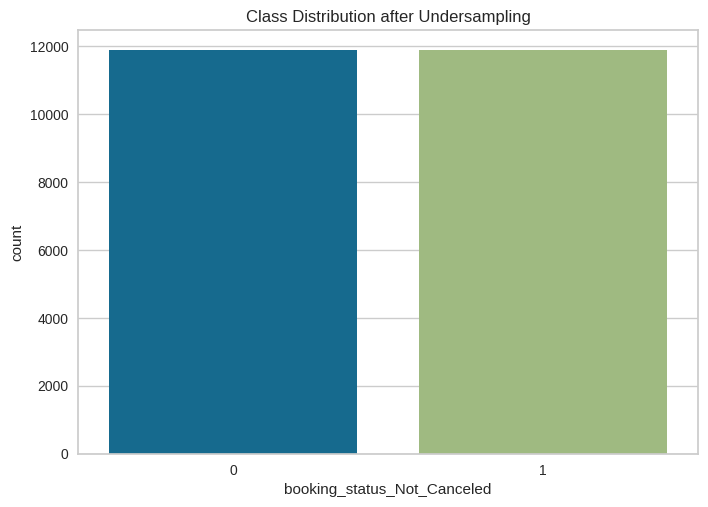

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# X: 피처 데이터, y: 타겟 데이터

# RandomUnderSampler 객체 생성
under_sampler = RandomUnderSampler()

# 언더샘플링 수행
X_under, y_under = under_sampler.fit_resample(X, y)
sns.countplot(x=y_under)
plt.title('Class Distribution after Undersampling')
plt.show()

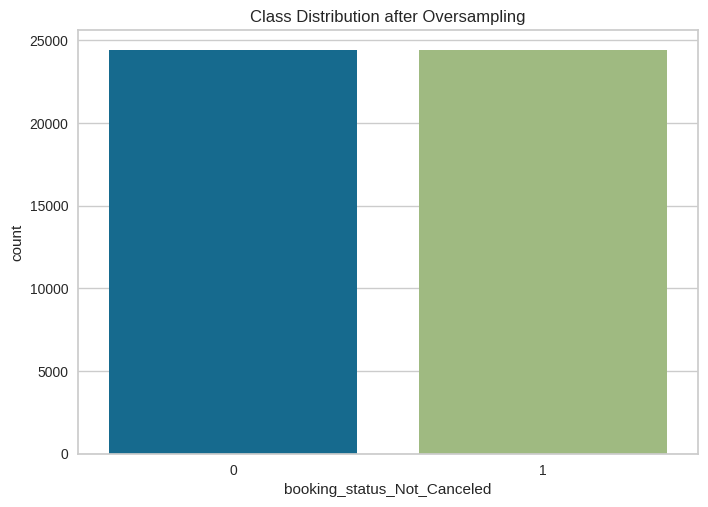

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)
plt.title('Class Distribution after Oversampling')
plt.show()

In [ ]:
y_stratified.value_counts(normalize=True) #베이스 라인 지표로 사용 할 점수 0.672 이상의 정확도를 보여야 의미 있는 분석

1    0.672364
0    0.327636
Name: booking_status_Not_Canceled, dtype: float64

In [ ]:
y.value_counts(normalize=True)

1    0.5
0    0.5
Name: booking_status_Not_Canceled, dtype: float64

In [ ]:
y_under.value_counts(normalize=True)

0    0.5
1    0.5
Name: booking_status_Not_Canceled, dtype: float64

여기서 피쳐 선택도 함께 진행할겸 DT와 랜덤포레스트를 이용하여 중요한 변수와 중요하지 않은 변수를 구분하여 중요하지 않은 변수를 삭제하여 모델을 간소화 시키고자하며 오버샘플링과 언더샘플링과 stratified 추출 모델의 성능을 비교하고자 한다.

In [ ]:
from sklearn.model_selection import train_test_split
X_train_over,X_test_over, y_train_over, y_test_over = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_stratified,X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X_stratified, y_stratified, test_size = 0.2,stratify=y_stratified ,random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_under,X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.2, random_state = 42)

의사결정 트리 모델을 사용하여 엔트로피 및 지니 계산을 테스트합니다.

In [ ]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [ ]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)


Mín Split:  2
Max Nvl:  11
Algorithm:  gini
Score:  0.864416848272753


In [ ]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train_stratified, y_train_stratified)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [ ]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  11
Algorithm:  gini
Score:  0.871157822191592


In [ ]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train_under, y_train_under)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [ ]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  11
Algorithm:  gini
Score:  0.8528083838842158


In [ ]:
decision_tree_over = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=42)
decision_tree_over.fit(X_train_over, y_train_over)
predict_over = decision_tree_over.predict(X_test_over)


decision_tree_stratified = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=42)
decision_tree_stratified.fit(X_train_stratified, y_train_stratified)
predict_stratified = decision_tree_stratified.predict(X_test_stratified)


decision_tree_under = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=42)
decision_tree_under.fit(X_train_under, y_train_under)
predict_under = decision_tree_under.predict(X_test_under)

0.8691061910619107

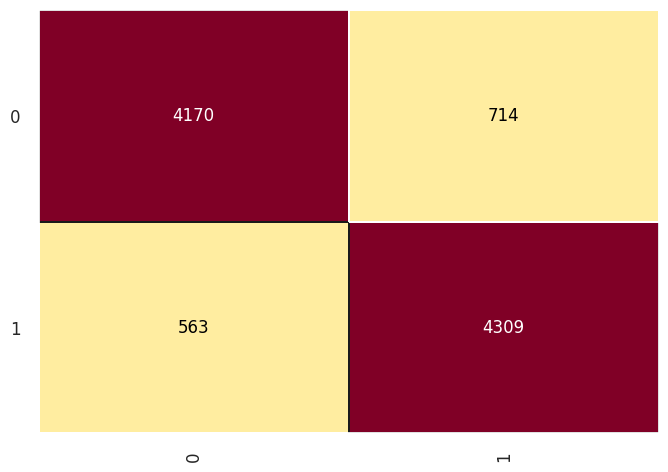

In [ ]:
cm_over = ConfusionMatrix(decision_tree_over)
cm_over.fit(X_train_over, y_train_over)
cm_over.score(X_test_over, y_test_over)

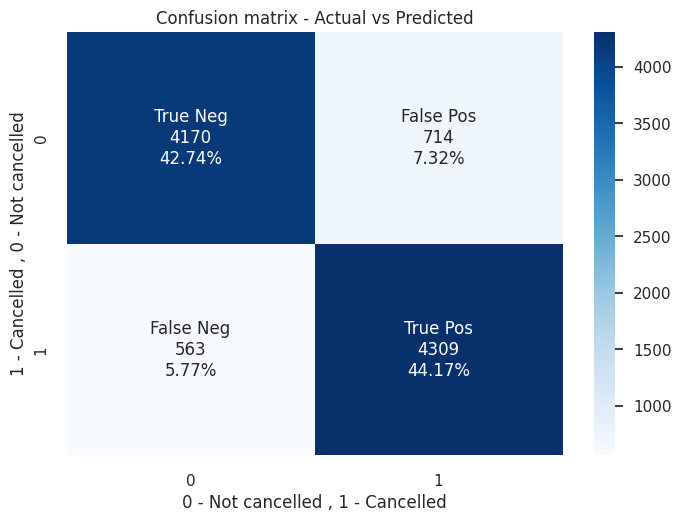

In [ ]:
print_confusion_matrix(y_test_over,predict_over)

In [ ]:
classification_decision_over = (classification_report(y_test_over, predict_over))
print(classification_decision_over)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4884
           1       0.86      0.88      0.87      4872

    accuracy                           0.87      9756
   macro avg       0.87      0.87      0.87      9756
weighted avg       0.87      0.87      0.87      9756



0.8831150930392833

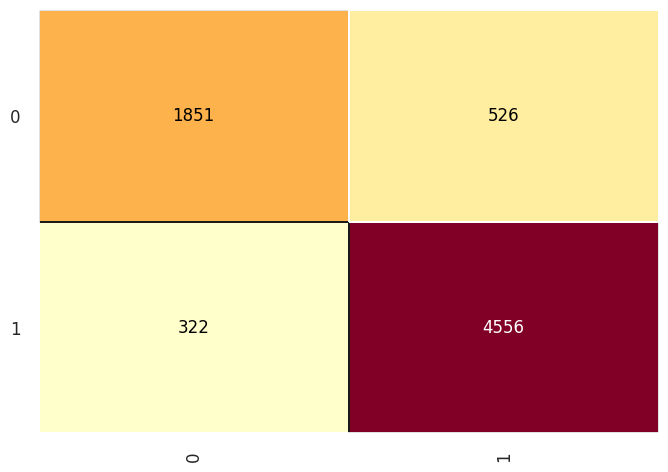

In [ ]:
cm_stratified = ConfusionMatrix(decision_tree_stratified)
cm_stratified.fit(X_train_stratified, y_train_stratified)
cm_stratified.score(X_test_stratified, y_test_stratified)

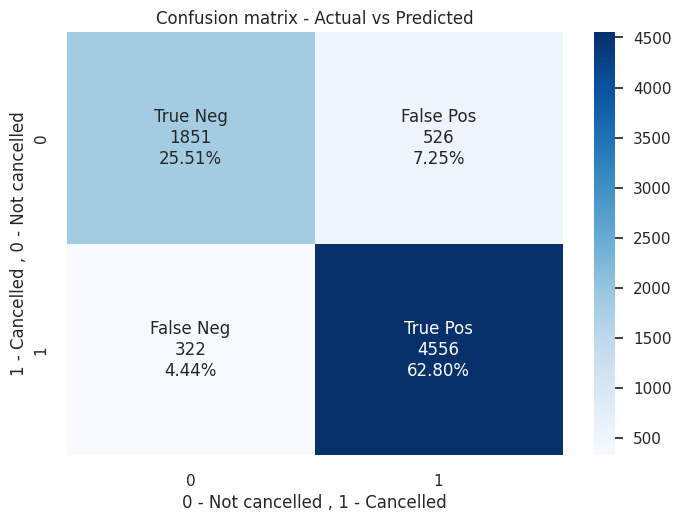

In [ ]:
print_confusion_matrix(y_test_stratified,predict_stratified)

In [ ]:
classification_decision_stratified = (classification_report(y_test_stratified, predict_stratified))
print(classification_decision_stratified)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2377
           1       0.90      0.93      0.91      4878

    accuracy                           0.88      7255
   macro avg       0.87      0.86      0.86      7255
weighted avg       0.88      0.88      0.88      7255



0.8388725283971392

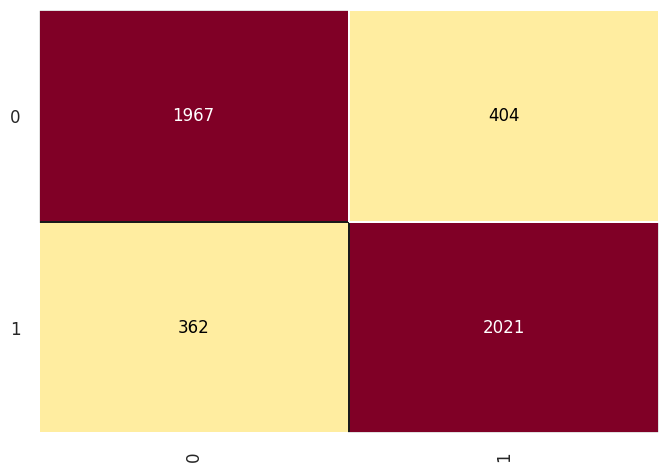

In [ ]:
cm_under = ConfusionMatrix(decision_tree_under)
cm_under.fit(X_train_under, y_train_under)
cm_under.score(X_test_under, y_test_under)

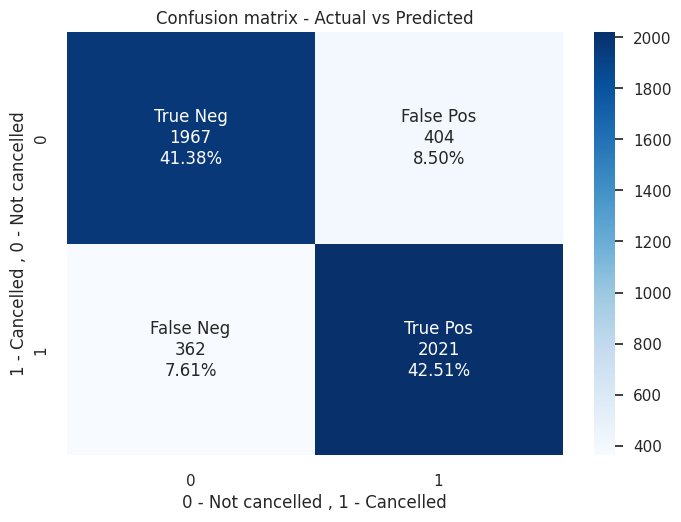

In [ ]:
print_confusion_matrix(y_test_under,predict_under)

In [ ]:
classification_decision_under = (classification_report(y_test_under, predict_under))
print(classification_decision_under)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2371
           1       0.83      0.85      0.84      2383

    accuracy                           0.84      4754
   macro avg       0.84      0.84      0.84      4754
weighted avg       0.84      0.84      0.84      4754



정확도는 전체적인 예측의 정확성을 나타내는 지표이지만, 클래스 간 불균형이 심한 경우에는 정확한 평가를 제공하지 못할 수 있습니다. 따라서, 정밀도와 재현율을 함께 고려하는 것이 중요합니다. 정밀도는 양성으로 예측한 샘플 중 실제로 양성인 비율을 나타내며, 재현율은 실제 양성인 샘플 중에서 양성으로 정확히 예측한 비율을 나타냅니다.

F1 점수는 정밀도와 재현율의 조화 평균으로 계산되며, 두 지표를 한 번에 고려할 수 있는 지표입니다. 따라서, F1 점수는 클래스 간의 균형을 고려하여 모델의 예측 성능을 종합적으로 평가하는 데 도움을 줍니다.

그 결과 정확도는 stratified 추출된 데이터 셋이 더 좋지만 f1 score를 보게 되면 클래스 0(취소)에 대한 성능이 더 중요하기 때문에 클래스 0에 대한 지표를 보게 되면 oversample링 및 언더샘플링 한 모델 보다 떨어지는 것을 볼 수 있다.

또한 오버샘플과 언더샘플을 비교하였을때 오버샘플의 precision    recall  f1-score이 전체적으로 높다.


따라서 oversample 기법을 사용하여 추가적인 분석 및 feature selection을 적용해보기로 한다.

In [ ]:
X_train ,X_test, y_train, y_test = X_train_over,X_test_over, y_train_over, y_test_over
# 오버 샘플을 디폴트로 코드 작성 편하게 끔

In [ ]:
columns = df_encoded.drop('booking_status_Not_Canceled', axis = 1).columns
feature_imp = pd.Series(decision_tree_over.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

lead_time                               0.411644
market_segment_type_Online              0.145334
no_of_special_requests                  0.130664
avg_price_per_room                      0.110374
arrival_month                           0.065967
no_of_weekend_nights                    0.033816
arrival_date                            0.027888
no_of_adults                            0.022095
no_of_week_nights                       0.015961
required_car_parking_space              0.011765
arrival_year                            0.009905
market_segment_type_Offline             0.003453
room_type_reserved_Room_Type 4          0.003126
type_of_meal_plan_Not Selected          0.002727
no_of_children                          0.002302
room_type_reserved_Room_Type 5          0.001232
room_type_reserved_Room_Type 2          0.001071
type_of_meal_plan_Meal Plan 2           0.000677
repeated_guest                          0.000000
room_type_reserved_Room_Type 7          0.000000
market_segment_type_

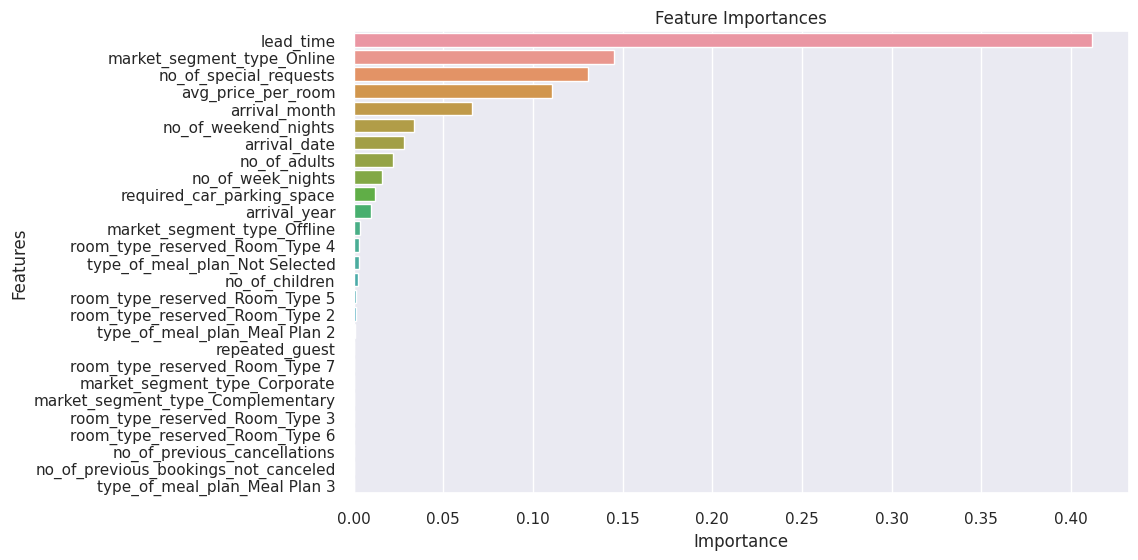

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

이전에 취소한 예약수, 이전에 취소하지 않은 예약수 등은 dt에서 별로 중요해 보이지 않는 변수로 보여진다.

하지만 DT만으로는 섣부른 판단일 수 있어 랜덤 포레스트와 뮤쳘 인포메이션을 확인해보기로 한다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([100])})

In [ ]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.8639299250601951
Mín Split:  4
Max Nvl:  11


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 4, max_depth= 11,  criterion = 'gini', random_state = 42)
random_forest.fit(X_train, y_train)
predict_RF = random_forest.predict(X_test)

0.8666461664616646

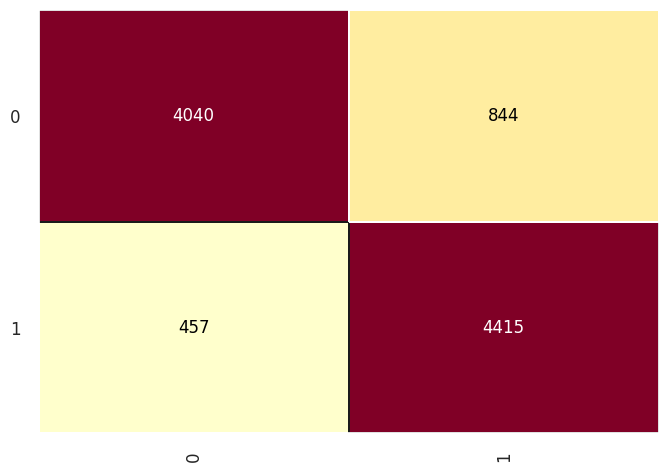

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

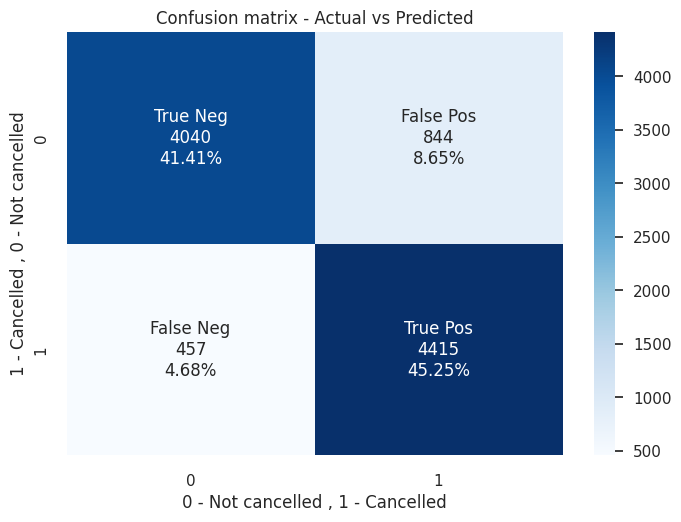

In [ ]:
print_confusion_matrix(y_test_reverse,predict_RF)

In [ ]:
classification_random = (classification_report(y_test, predict_RF))
print(classification_random)

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4884
           1       0.84      0.91      0.87      4872

    accuracy                           0.87      9756
   macro avg       0.87      0.87      0.87      9756
weighted avg       0.87      0.87      0.87      9756



DT와 비슷한듯 보이지만 클래스 0의 관점의 precision이 더 높지만 recall은 DT보다 낮습니다.

호텔 노쇼로 인한 손해를 최소화 하기 위해서는 두가지 모두 보는 것이 좋습니다.

호텔 노쇼 예측의 경우, Precision과 Recall 두 가지 지표를 함께 고려하는 것이 중요합니다. 노쇼 예측은 실제로 호텔을 방문하지 않는 사람들을 예측하는 것이 목표입니다. 따라서, 다음과 같이 Precision과 Recall을 해석할 수 있습니다:

Precision: 모델이 노쇼로 예측한 사람들 중에서 실제로 호텔을 방문하지 않는 사람의 비율입니다. Precision은 "노쇼 예측 정확도"라고 볼 수 있습니다. Precision이 높을수록 모델이 노쇼로 예측한 사람들 중에서 실제로 노쇼인 사람들의 비율이 높아집니다.

Recall: 실제로 호텔을 방문하지 않는 사람들 중에서 모델이 얼마나 많은 사람들을 정확하게 노쇼로 예측하는지를 나타냅니다. Recall은 "진짜 노쇼 비율(TPR: True Positive Rate)"이라고 볼 수 있습니다. Recall이 높을수록 모델이 실제로 노쇼인 사람들을 놓치는 경우가 적어집니다.

호텔 노쇼 예측에서는 Precision과 Recall을 모두 고려하여 최적의 모델을 평가해야 합니다. 높은 Precision은 노쇼 예측의 정확도를, 높은 Recall은 실제 노쇼를 놓치는 경우를 최소화하는데 도움을 줍니다. 따라서, Precision과 Recall을 동시에 고려하는 평가 지표인 F1-score, 정확도(Accuracy), 혼동 행렬(Confusion Matrix) 등을 종합적으로 사용하여 모델의 성능을 평가할 수 있습니다.

그래서 둘의 조화평균인 f1 스코어를 주 평가지표로 삼을 예정입니다.

In [ ]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

lead_time                               0.364429
no_of_special_requests                  0.173459
avg_price_per_room                      0.105819
arrival_month                           0.069288
market_segment_type_Online              0.056007
arrival_year                            0.046587
arrival_date                            0.028512
market_segment_type_Offline             0.027317
no_of_week_nights                       0.024195
no_of_weekend_nights                    0.023531
no_of_adults                            0.016147
type_of_meal_plan_Meal Plan 2           0.014364
required_car_parking_space              0.010970
market_segment_type_Corporate           0.009876
room_type_reserved_Room_Type 4          0.005364
repeated_guest                          0.005203
type_of_meal_plan_Not Selected          0.004588
no_of_previous_bookings_not_canceled    0.004359
no_of_children                          0.003484
market_segment_type_Complementary       0.001951
room_type_reserved_R

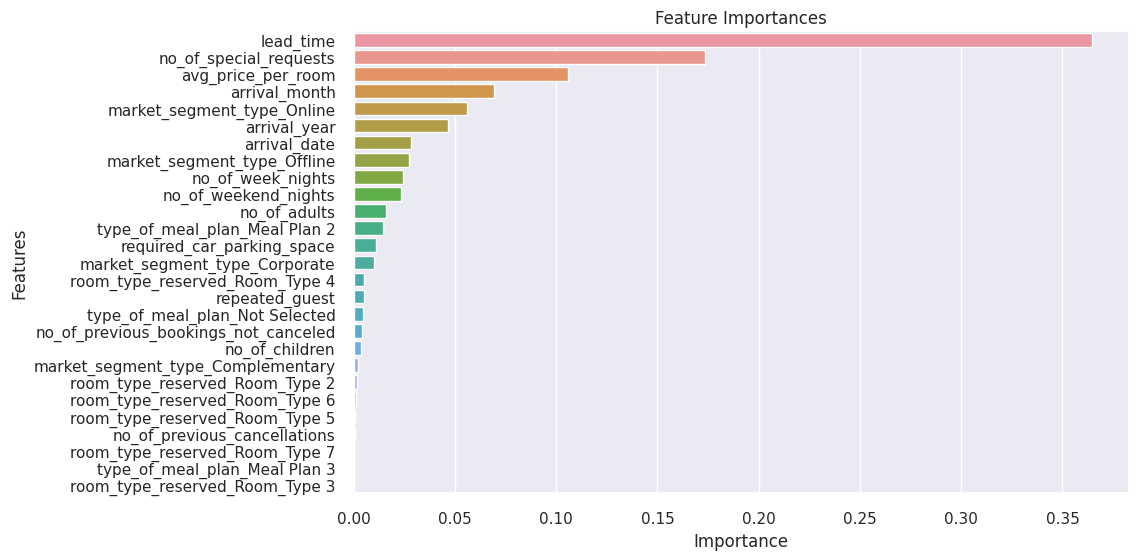

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
sns.barplot(x=feature_imp_random, y=feature_imp_random.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

DT에서는 no_of_previous_cancellations
no_of_previous_bookings_not_canceled  두 변수의 중요도가 거의 없었지만 랜덤포레스트에서는 그 중 no_of_previous_bookings_not_canceled 변수의 중요도가 어느정도 나타난 것을 확인 할 수 있다.

두가지 관점과 Y에 미치는 뮤철 인포메이션을 비교해보고 피쳐를 셀렉션 하고자 한다.

In [ ]:
# Filter methods
# Mutual information

"""
Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.
A quantity called mutual information measures the amount of information one can obtain from one random variable given another.
"""

X_feature = df_encoded.drop(['booking_status_Not_Canceled'], axis = 1)


importances = mutual_info_classif(X_train,y_train)
importances = pd.Series(importances,X_feature.columns[0:len(X_feature.columns)])
importances = pd.DataFrame({'features':importances.index, 'importance':importances.values})



In [ ]:
importances

features  importance
0                           no_of_adults    0.007455
1                         no_of_children    0.003421
2                   no_of_weekend_nights    0.004675
3                      no_of_week_nights    0.006493
4             required_car_parking_space    0.004488
5                              lead_time    0.145488
6                           arrival_year    0.022260
7                          arrival_month    0.027365
8                           arrival_date    0.001230
9                         repeated_guest    0.010530
10          no_of_previous_cancellations    0.005705
11  no_of_previous_bookings_not_canceled    0.011321
12                    avg_price_per_room    0.128799
13                no_of_special_requests    0.047245
14         type_of_meal_plan_Meal Plan 2    0.006220
15         type_of_meal_plan_Meal Plan 3    0.001359
16        type_of_meal_plan_Not Selected    0.000000
17        room_type_reserved_Room_Type 2    0.001822
18        room_type_reserved_Room_Type 3    0.000607
19        room_type_reserved_Room_Type 4    0.000000
20        room_type_reserved_Room_Type 5    0.004969
21        room_type_reserved_Room_Type 6    0.000000
22        room_type_reserved_Room_Type 7    0.000000
23     market_segment_type_Complementary    0.002778
24         market_segment_type_Corporate    0.008765
25           market_segment_type_Offline    0.002462
26            market_segment_type_Online    0.008641

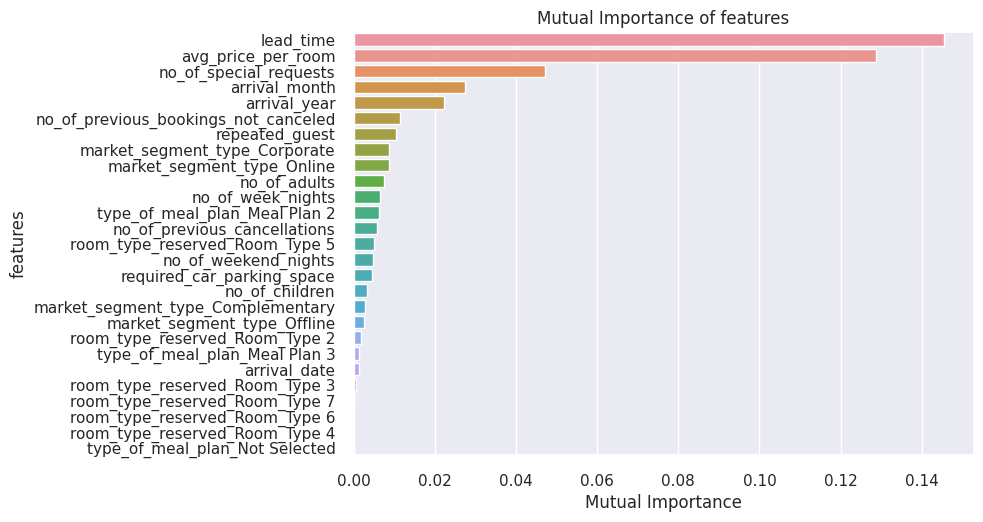

In [ ]:
sns.barplot(data = importances,y = "features", x = "importance",order=importances.sort_values('importance',ascending=False).features)
plt.xlabel("Mutual Importance")
plt.title("Mutual Importance of features")
plt.show()

y에 미치는 영향을 mutual information으로 확인해본 결과 DT와 RF의 결과에 중요하지 않았던 no_of_previous_cancellations 피쳐가 어느정도의 정보를 제공하고 있기 때문에 제거하기 보다는 남겨 놓은 후 다른 모델을 사용하여 다양한 관점에서 호텔 취소를 예측하고자 한다.


또한 우리가 예측하고자하고 주로 바라보아야할 취소가 0으로 되어있기 때문에 이를 1로 변경하고자 한다.

In [ ]:
# y_train = y_train.replace({0: 1, 1: 0})
# y_test = y_test.replace({0: 1, 1: 0})
# 안해도될듯 이거

#y_train_reverse = y_train.replace({0: 1, 1: 0})
#y_test_reverse = y_test.replace({0: 1, 1: 0})

## 전처리 완료

데이터의 전처리 및 샘플링 방법, 적절한 feature 선택 작업이 끝
본격적인 모델 분석 스타트


### 베이스라인으로 사용할 모델

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB() #기본값
naive_bayes.fit(X_train_over, y_train_over)
predict_NB = naive_bayes.predict(X_test_over)

0.5483804838048381

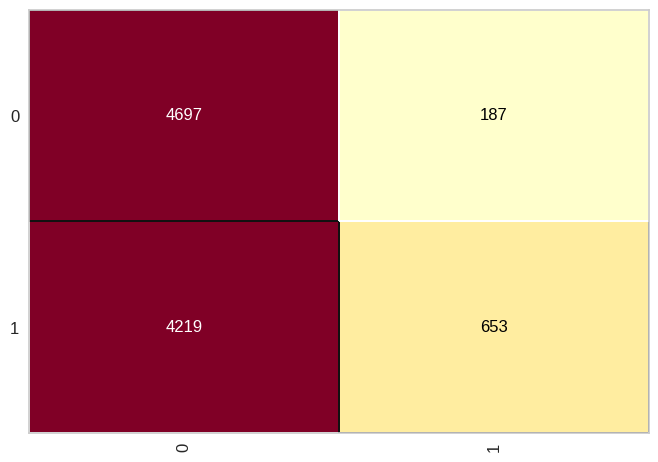

In [ ]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train_over, y_train_over)
cm.score(X_test_over, y_test_over)


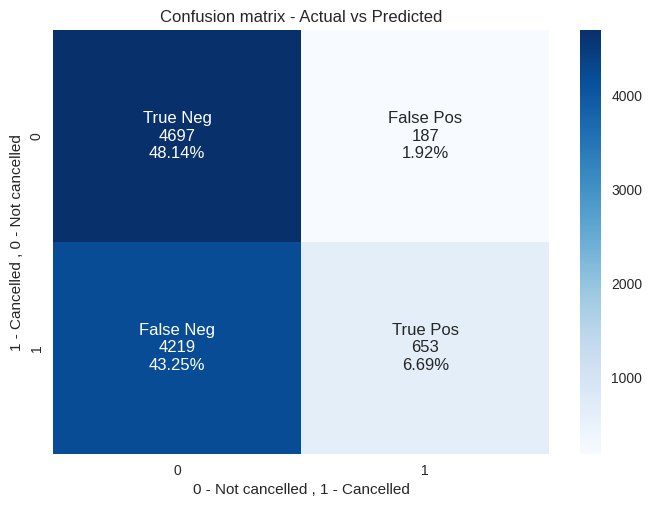

In [ ]:
print_confusion_matrix(y_test_over,predict_NB)

In [ ]:
classification_naive_gaussian = (classification_report(y_test_over, predict_NB))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.53      0.96      0.68      4884
           1       0.78      0.13      0.23      4872

    accuracy                           0.55      9756
   macro avg       0.65      0.55      0.45      9756
weighted avg       0.65      0.55      0.45      9756



In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB() #기본값
naive_bayes.fit(X_train_stratified, y_train_stratified)
predict_NB = naive_bayes.predict(X_test_stratified)

0.40702963473466575

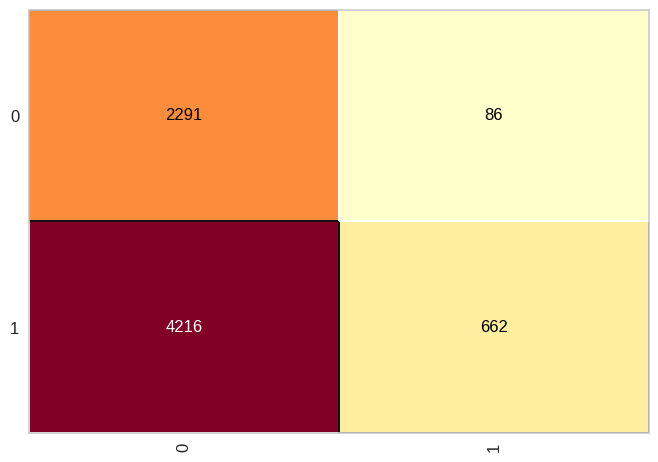

In [ ]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train_stratified, y_train_stratified)
cm.score(X_test_stratified, y_test_stratified)

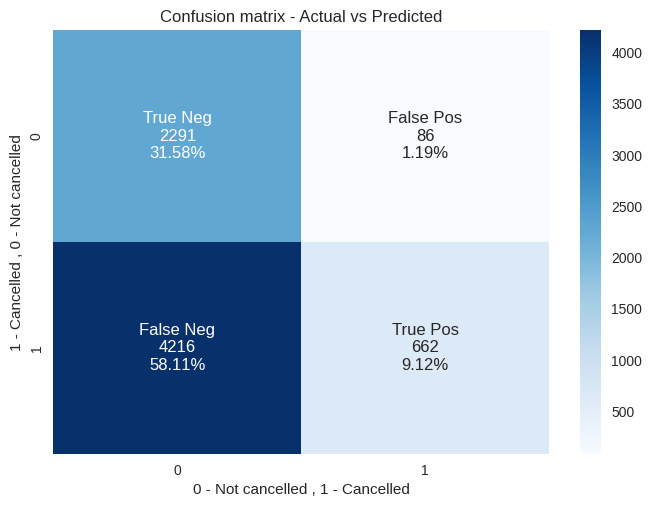

In [ ]:
print_confusion_matrix(y_test_stratified,predict_NB)

In [ ]:

classification_naive_gaussian = (classification_report(y_test_stratified, predict_NB))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.35      0.96      0.52      2377
           1       0.89      0.14      0.24      4878

    accuracy                           0.41      7255
   macro avg       0.62      0.55      0.38      7255
weighted avg       0.71      0.41      0.33      7255



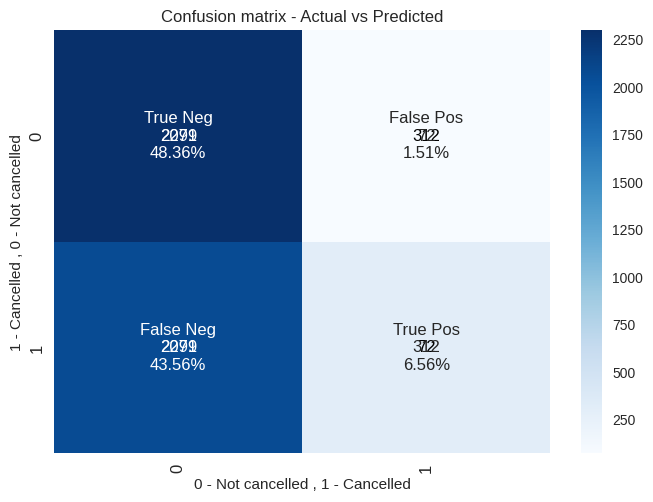

              precision    recall  f1-score   support

           0       0.53      0.97      0.68      2371
           1       0.81      0.13      0.23      2383

    accuracy                           0.55      4754
   macro avg       0.67      0.55      0.45      4754
weighted avg       0.67      0.55      0.45      4754



In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB() #기본값
naive_bayes.fit(X_train_under, y_train_under)
predict_NB = naive_bayes.predict(X_test_under)


cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train_under, y_train_under)
cm.score(X_test_under, y_test_under)




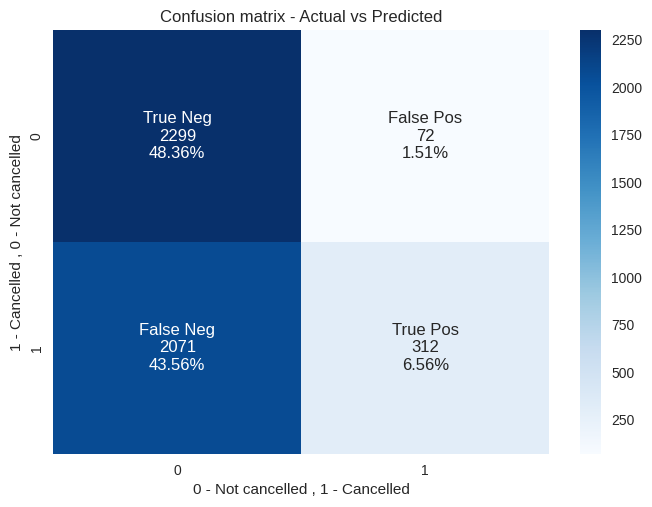

              precision    recall  f1-score   support

           0       0.53      0.97      0.68      2371
           1       0.81      0.13      0.23      2383

    accuracy                           0.55      4754
   macro avg       0.67      0.55      0.45      4754
weighted avg       0.67      0.55      0.45      4754



In [ ]:
print_confusion_matrix(y_test_under,predict_NB)


classification_naive_gaussian = (classification_report(y_test_under, predict_NB))
print(classification_naive_gaussian)

독립일때는 잘 작동하는 모델이지만 상관관계를 비교하였을때 0이 아니기 때문에 잘 작동하지는 않은 것으로 볼 수 있다.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'f1', n_jobs = -1) #본격적인 시작이니 scoring을 f1으로
grid.fit(X_train_over, y_train_over)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1')

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8612627115243896)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_over, y_train_over)
predict_knn = knn.predict(X_test_over)

0.9157441574415744

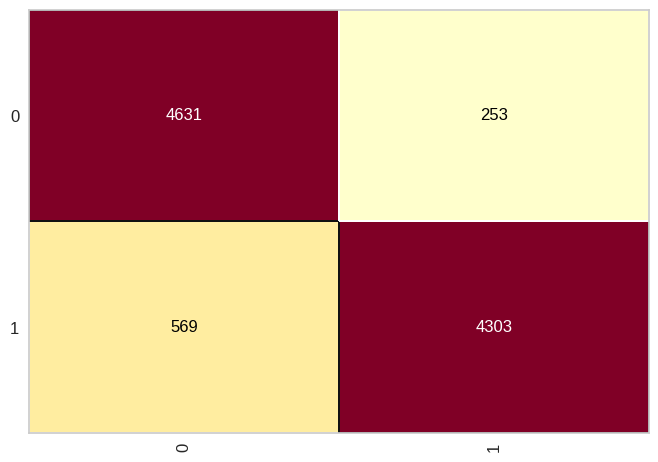

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train_over, y_train_over)
cm.score(X_test_over, y_test_over)

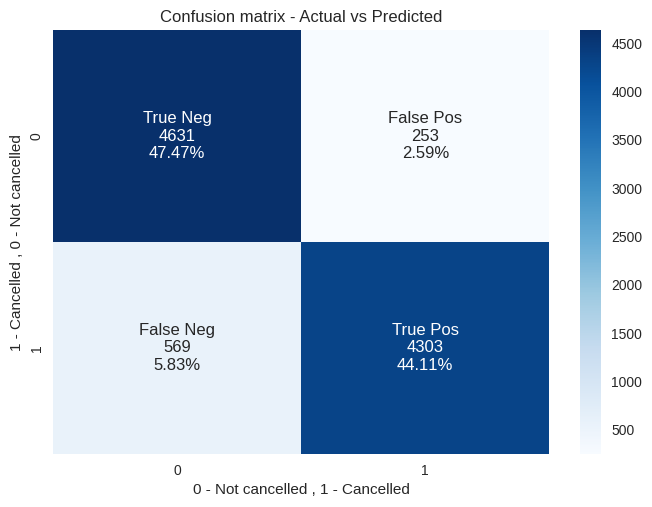

In [ ]:
print_confusion_matrix(y_test_over,predict_knn)

In [ ]:
classification_knn = (classification_report(y_test_over, predict_knn))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4884
           1       0.94      0.88      0.91      4872

    accuracy                           0.92      9756
   macro avg       0.92      0.92      0.92      9756
weighted avg       0.92      0.92      0.92      9756



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'f1', n_jobs = -1) #본격적인 시작이니 scoring을 f1으로
grid.fit(X_train_stratified, y_train_stratified)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1')

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 9}, 0.8850020722013991)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train_stratified, y_train_stratified)
predict_knn = knn.predict(X_test_stratified)

0.8639558924879394

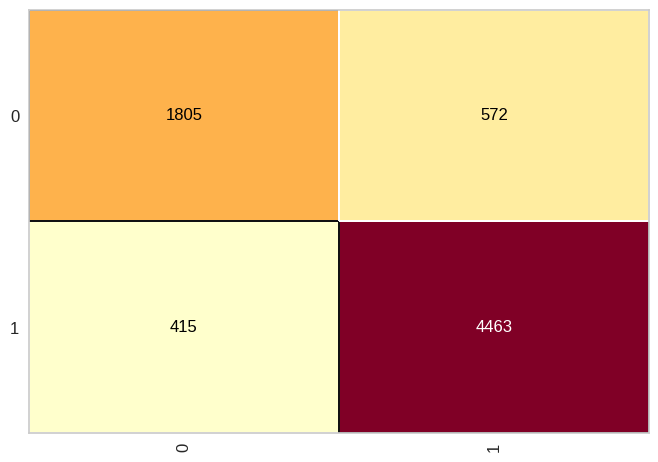

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train_stratified, y_train_stratified)
cm.score(X_test_stratified, y_test_stratified)

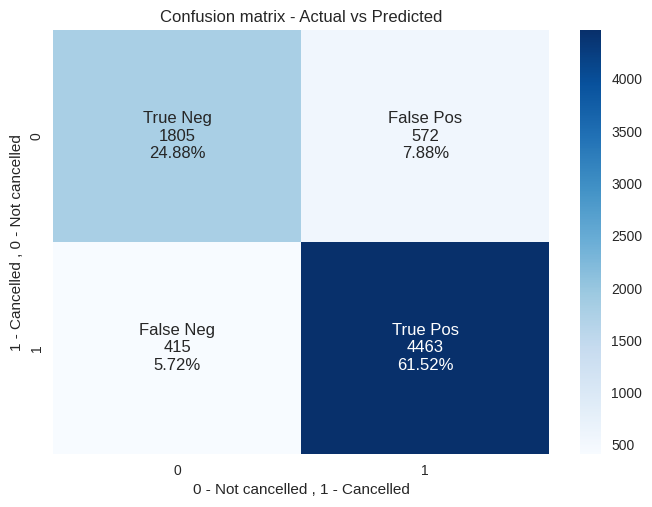

In [ ]:
print_confusion_matrix(y_test_stratified,predict_knn)

In [ ]:
classification_knn = (classification_report(y_test_stratified, predict_knn))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.81      0.76      0.79      2377
           1       0.89      0.91      0.90      4878

    accuracy                           0.86      7255
   macro avg       0.85      0.84      0.84      7255
weighted avg       0.86      0.86      0.86      7255



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'f1', n_jobs = -1) #본격적인 시작이니 scoring을 f1으로
grid.fit(X_train_under, y_train_under)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1')

In [ ]:
grid.best_params_, grid.best_score_

({'n_neighbors': 7}, 0.8135491845721696)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_under, y_train_under)
predict_knn = knn.predict(X_test_under)

0.8254101809002945

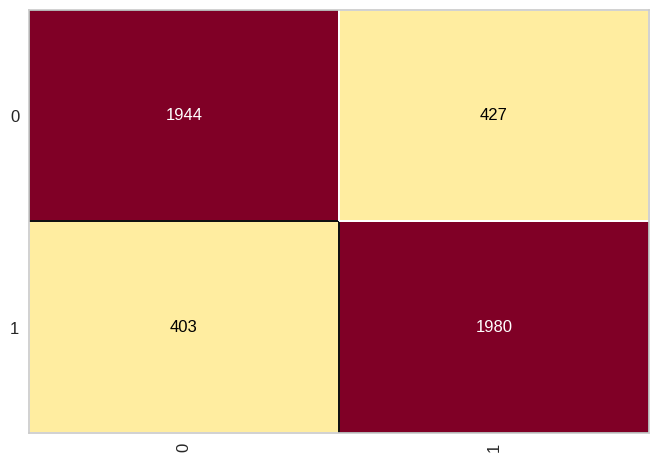

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_train_under, y_train_under)
cm.score(X_test_under, y_test_under)

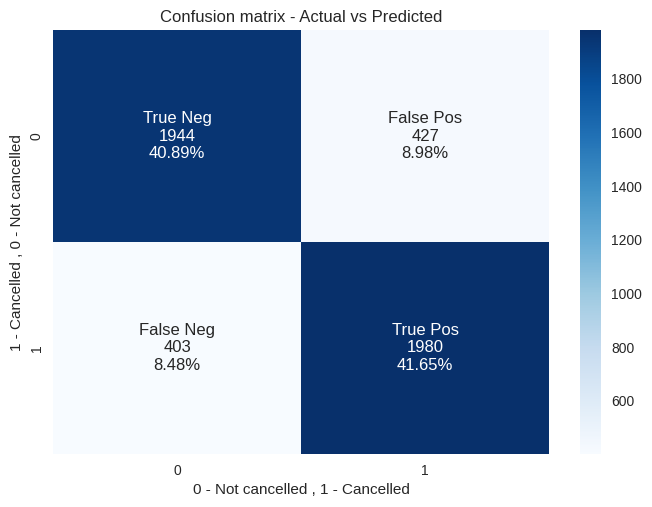

In [ ]:
print_confusion_matrix(y_test_under,predict_knn)


In [ ]:
classification_knn = (classification_report(y_test_under, predict_knn))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2371
           1       0.82      0.83      0.83      2383

    accuracy                           0.83      4754
   macro avg       0.83      0.83      0.83      4754
weighted avg       0.83      0.83      0.83      4754



KNN의 베이스 모델이 recall과 precision과 f1-score가 높다.

여기서 class 기존의 0을 1로 변경안함 사실

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 42, max_iter=1000)
logistic.fit(X_train_over, y_train_over)
predict_log = logistic.predict(X_test_over)

0.7763427634276343

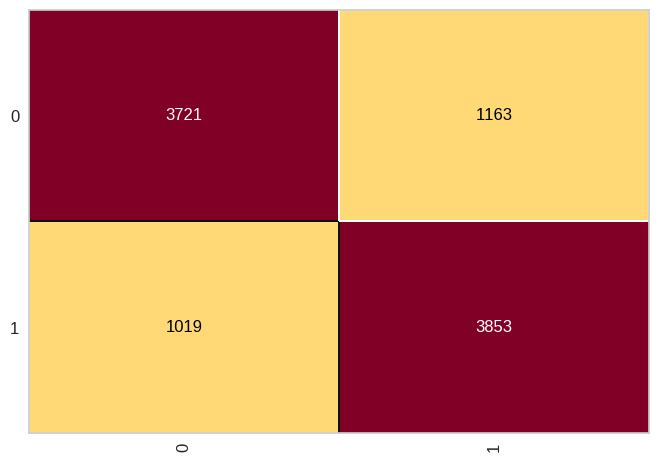

In [ ]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train_over, y_train_over)
cm.score(X_test_over, y_test_over)

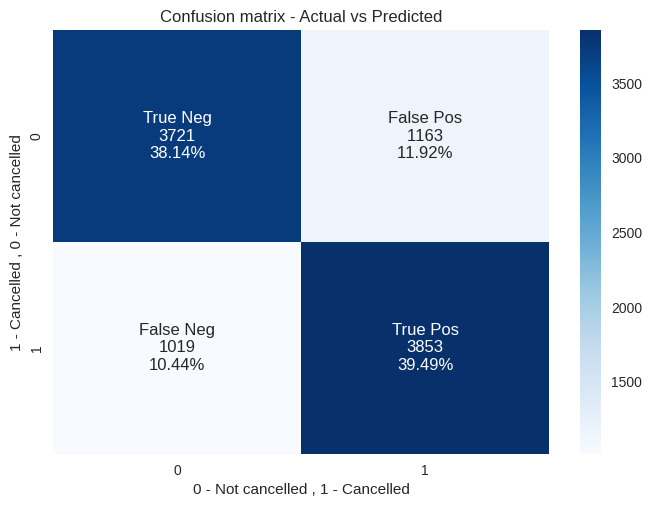

In [ ]:
print_confusion_matrix(y_test_over,predict_log)

In [ ]:
logistic_normal = (classification_report(y_test_over, predict_log))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      4884
           1       0.77      0.79      0.78      4872

    accuracy                           0.78      9756
   macro avg       0.78      0.78      0.78      9756
weighted avg       0.78      0.78      0.78      9756



In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 42, max_iter=1000)
logistic.fit(X_train_stratified, y_train_stratified)
predict_log = logistic.predict(X_test_stratified)

0.8117160578911096

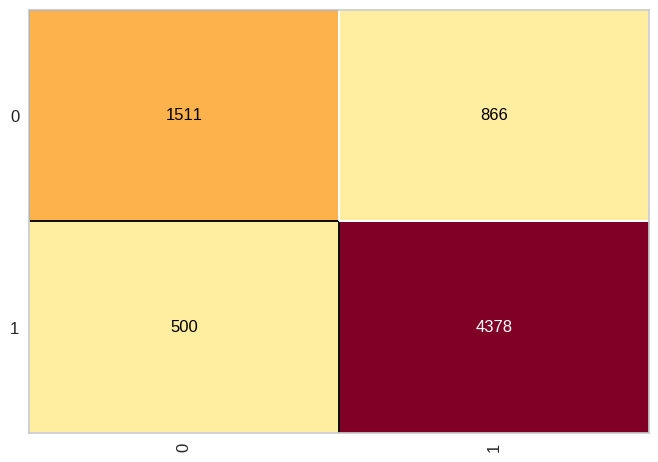

In [ ]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train_stratified, y_train_stratified)
cm.score(X_test_stratified, y_test_stratified)

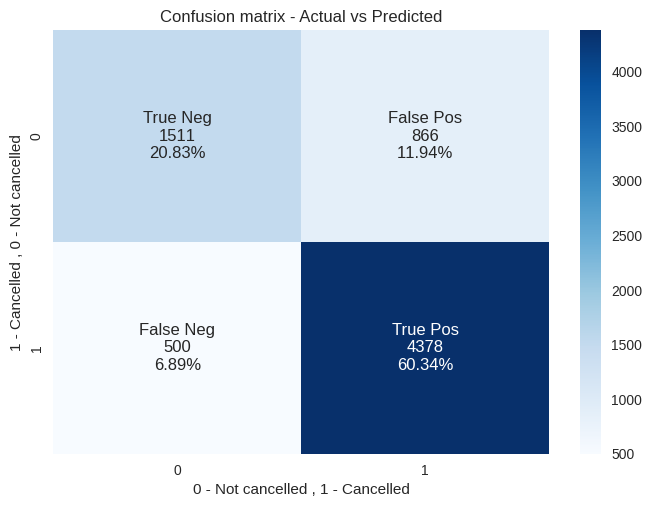

In [ ]:
print_confusion_matrix(y_test_stratified,predict_log)

In [ ]:
logistic_normal = (classification_report(y_test_stratified, predict_log))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      2377
           1       0.83      0.90      0.87      4878

    accuracy                           0.81      7255
   macro avg       0.79      0.77      0.78      7255
weighted avg       0.81      0.81      0.81      7255



In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 42, max_iter=1000)
logistic.fit(X_train_under, y_train_under)
predict_log = logistic.predict(X_test_under)

0.7698779974758099

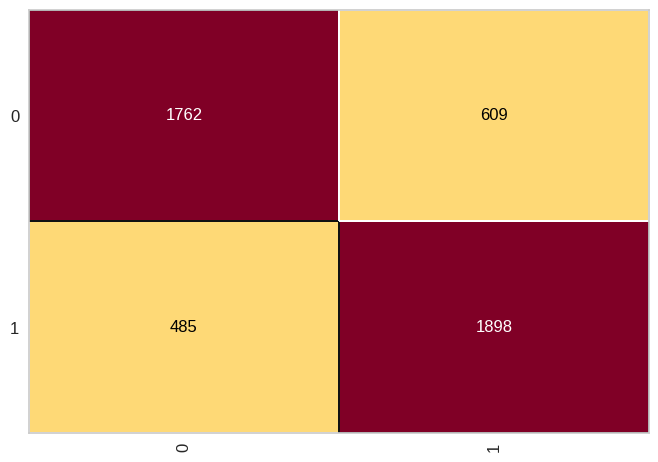

In [ ]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train_under, y_train_under)
cm.score(X_test_under, y_test_under)

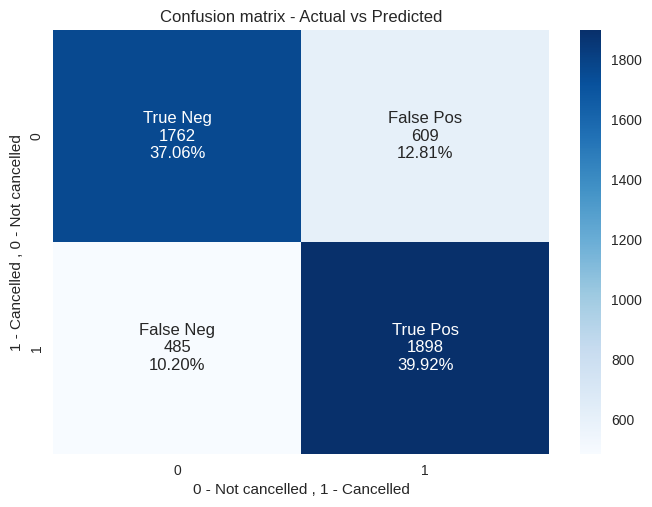

In [ ]:
print_confusion_matrix(y_test_under,predict_log)

In [ ]:
logistic_normal = (classification_report(y_test_under, predict_log))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      2371
           1       0.76      0.80      0.78      2383

    accuracy                           0.77      4754
   macro avg       0.77      0.77      0.77      4754
weighted avg       0.77      0.77      0.77      4754



성능은 그렇게 좋지는 않은 모습.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = np.array([500])
learning_rate = np.array([2.0, 2.5, 1.9, 1.7, 0.5, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = AdaBoostClassifier()
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([2. , 2.5, 1.9, 1.7, 0.5, 0.4]),
                         'n_estimators': array([500])})

In [ ]:
print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  1.9
Score:  0.8163182303396704


In [ ]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 1.9, random_state = 0)
ada_boost.fit(X_train, y_train)
predict_ada = ada_boost.predict(X_test)

0.8134481344813448

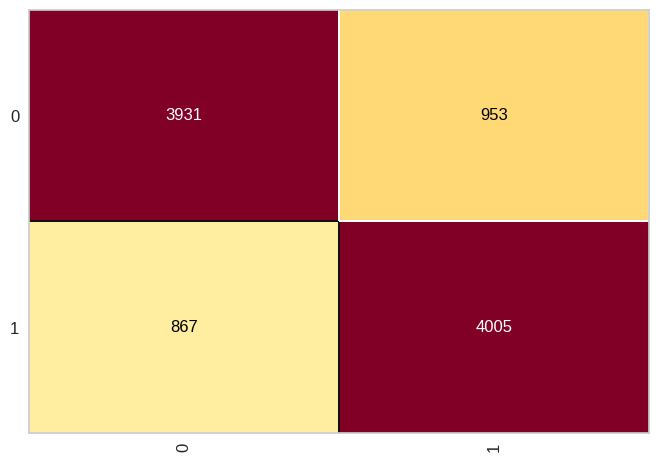

In [ ]:
cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

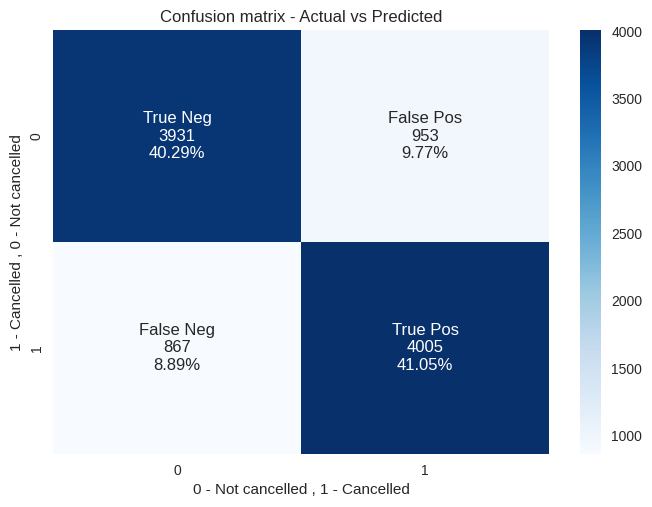

In [ ]:
print_confusion_matrix(y_test,predict_ada)

In [ ]:
classification_ada_scaler = (classification_report(y_test, predict_ada))
print(classification_ada_scaler)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4884
           1       0.81      0.82      0.81      4872

    accuracy                           0.81      9756
   macro avg       0.81      0.81      0.81      9756
weighted avg       0.81      0.81      0.81      9756



boosting 모델도 그렇게 좋은 성능은 아닌모습

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='relu', alpha=0.01,
                       hidden_layer_sizes=(64,32,10), max_iter=1000,
                       solver='adam', momentum=0.9, early_stopping=True, random_state = 42)
MLP.fit(X_train_over, y_train_over)
predict_MLP = MLP.predict(X_test_over)

0.8755637556375564

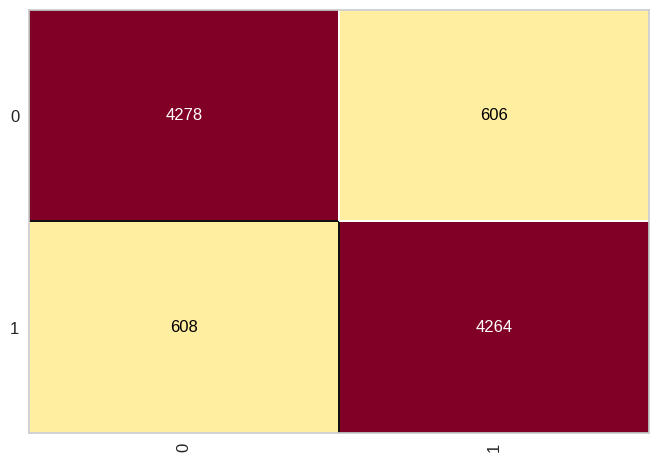

In [ ]:
cm = ConfusionMatrix(MLP)
cm.fit(X_train_over, y_train_over)
cm.score(X_test_over, y_test_over)

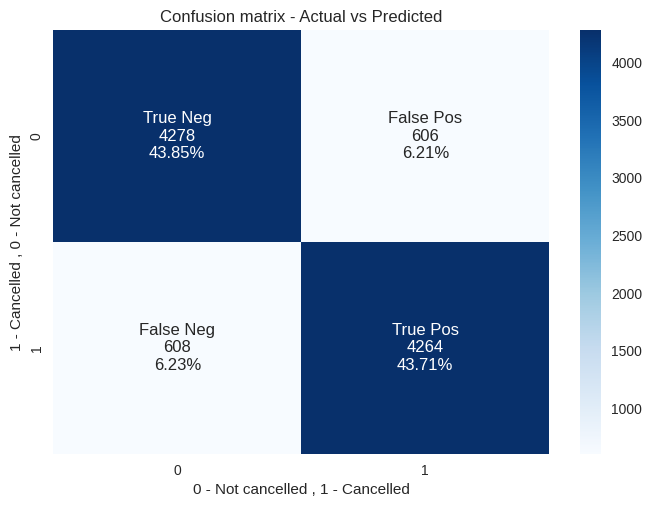

In [ ]:
print_confusion_matrix(y_test_over,predict_MLP)

In [ ]:
classification_MLP = (classification_report(y_test_over, predict_MLP))
print(classification_MLP)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4884
           1       0.88      0.88      0.88      4872

    accuracy                           0.88      9756
   macro avg       0.88      0.88      0.88      9756
weighted avg       0.88      0.88      0.88      9756



In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='relu', alpha=0.01,
                       hidden_layer_sizes=(64,32,10), max_iter=1000,
                       solver='adam', momentum=0.9, early_stopping=True, random_state = 42)
MLP.fit(X_train_stratified, y_train_stratified)
predict_MLP = MLP.predict(X_test_stratified)

0.8718125430737422

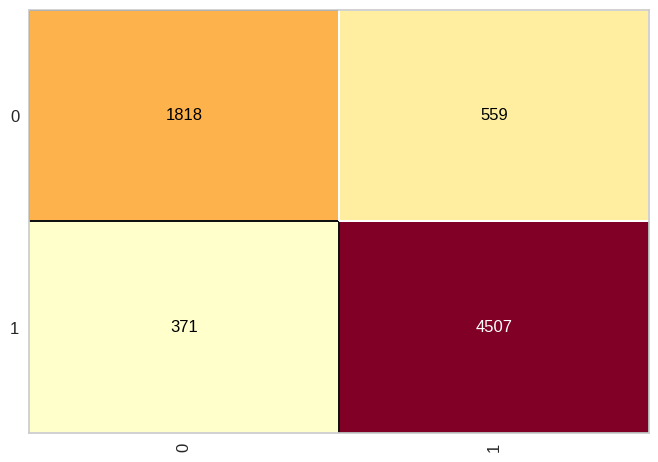

In [ ]:
cm = ConfusionMatrix(MLP)
cm.fit(X_train_stratified, y_train_stratified)
cm.score(X_test_stratified, y_test_stratified)

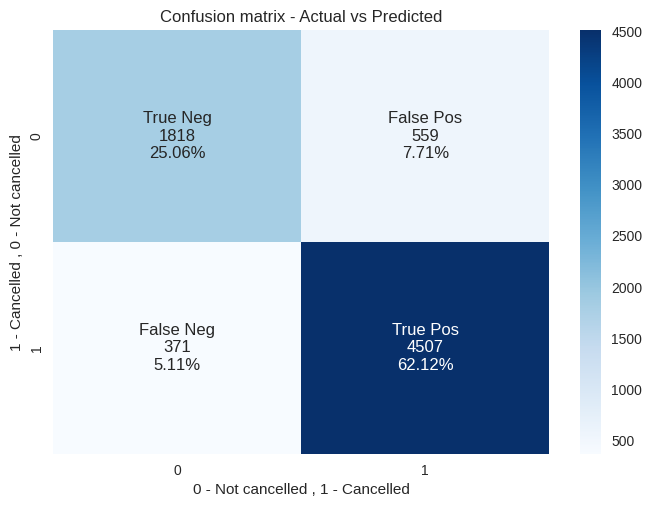

In [ ]:
print_confusion_matrix(y_test_stratified,predict_MLP)

In [ ]:
classification_MLP = (classification_report(y_test_stratified, predict_MLP))
print(classification_MLP)

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      2377
           1       0.89      0.92      0.91      4878

    accuracy                           0.87      7255
   macro avg       0.86      0.84      0.85      7255
weighted avg       0.87      0.87      0.87      7255



In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='relu', alpha=0.01,
                       hidden_layer_sizes=(10,10,10), max_iter=1000,
                       solver='adam', momentum=0.9, early_stopping=True, random_state = 42)
MLP.fit(X_train_under, y_train_under)
predict_MLP = MLP.predict(X_test_under)


0.809002944888515

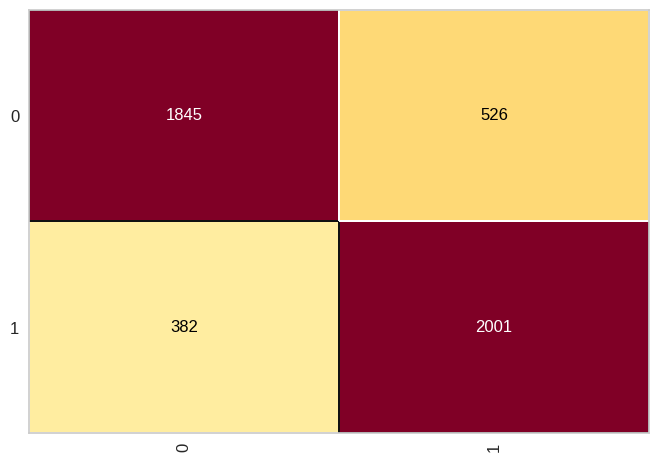

In [ ]:
cm = ConfusionMatrix(MLP)
cm.fit(X_train_under, y_train_under)
cm.score(X_test_under, y_test_under)

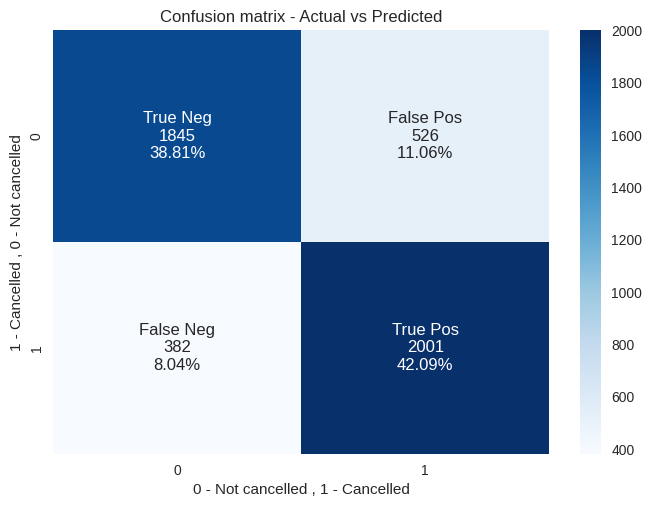

In [ ]:
print_confusion_matrix(y_test_under,predict_MLP)

In [ ]:
classification_MLP = (classification_report(y_test_under, predict_MLP))
print(classification_MLP)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2371
           1       0.79      0.84      0.82      2383

    accuracy                           0.81      4754
   macro avg       0.81      0.81      0.81      4754
weighted avg       0.81      0.81      0.81      4754



매우 뛰어나다...

좀더 다양한 시도를 위해 케라스의 모델로 NN를 구성

Epoch 1/100
907/907 [==============================] - 6s 5ms/step - loss: 0.4590 - val_loss: 0.3935
Epoch 2/100
907/907 [==============================] - 5s 5ms/step - loss: 0.4136 - val_loss: 0.3800
Epoch 3/100
907/907 [==============================] - 3s 4ms/step - loss: 0.4002 - val_loss: 0.3678
Epoch 4/100
907/907 [==============================] - 3s 4ms/step - loss: 0.3888 - val_loss: 0.3562
Epoch 5/100
907/907 [==============================] - 4s 4ms/step - loss: 0.3817 - val_loss: 0.3505
Epoch 6/100
907/907 [==============================] - 4s 5ms/step - loss: 0.3711 - val_loss: 0.3397
Epoch 7/100
907/907 [==============================] - 4s 4ms/step - loss: 0.3668 - val_loss: 0.3353
Epoch 8/100
907/907 [==============================] - 4s 4ms/step - loss: 0.3632 - val_loss: 0.3378
Epoch 9/100
907/907 [==============================] - 5s 5ms/step - loss: 0.3585 - val_loss: 0.3306
Epoch 10/100
907/907 [==============================] - 5s 5ms/step - loss: 0.3549 - val_lo

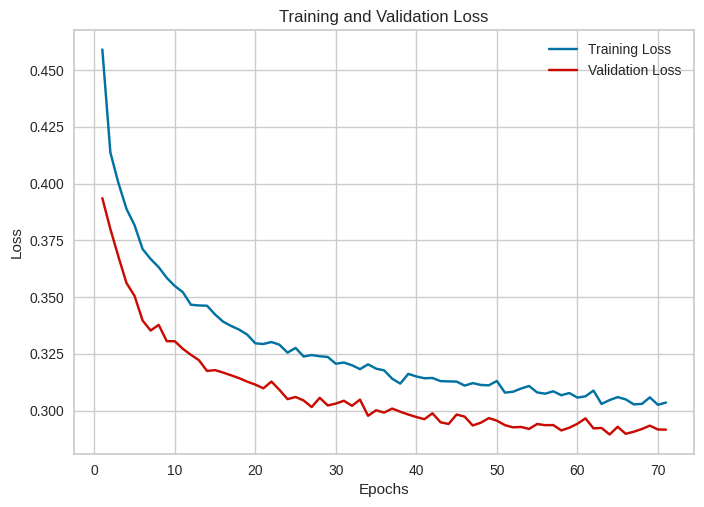

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_stratified.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stopping = EarlyStopping(monitor='val_loss', patience=7)

history = model.fit(X_train_stratified, y_train_stratified, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_stratified, y_test_stratified), callbacks=[early_stopping])

# 훈련 손실과 검증 손실 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch 수 추출
epochs = range(1, len(train_loss) + 1)

# 손실 그래프 그리기
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predict_keras = model.predict(X_test_stratified)

227/227 [==============================] - 0s 2ms/step


In [ ]:
threshold = 0.5  # 임계값 설정 (예시: 0.5)
predict_NN = np.where(predict_keras >= threshold, 1, 0)

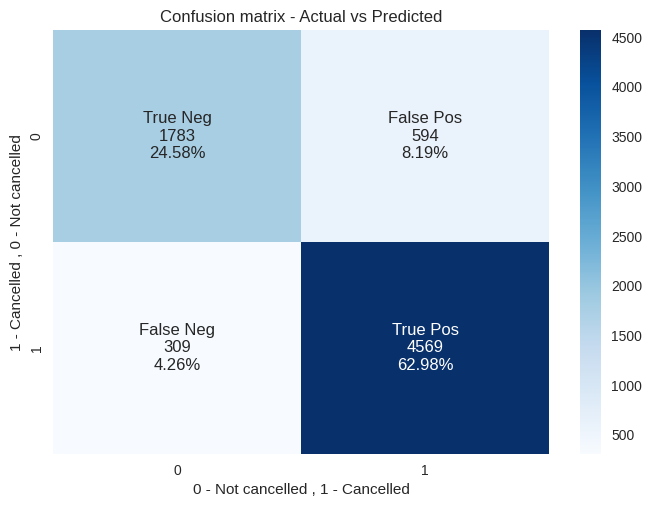

In [ ]:
print_confusion_matrix(y_test_stratified,predict_NN)

In [ ]:
classification_NN = (classification_report(y_test_stratified, predict_NN))
print(classification_NN)

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      2377
           1       0.88      0.94      0.91      4878

    accuracy                           0.88      7255
   macro avg       0.87      0.84      0.85      7255
weighted avg       0.87      0.88      0.87      7255



Epoch 1/100
1220/1220 [==============================] - 8s 5ms/step - loss: 0.4858 - val_loss: 0.4231
Epoch 2/100
1220/1220 [==============================] - 5s 4ms/step - loss: 0.4359 - val_loss: 0.4047
Epoch 3/100
1220/1220 [==============================] - 6s 5ms/step - loss: 0.4178 - val_loss: 0.3897
Epoch 4/100
1220/1220 [==============================] - 5s 4ms/step - loss: 0.4059 - val_loss: 0.3808
Epoch 5/100
1220/1220 [==============================] - 5s 4ms/step - loss: 0.3965 - val_loss: 0.3707
Epoch 6/100
1220/1220 [==============================] - 6s 5ms/step - loss: 0.3899 - val_loss: 0.3657
Epoch 7/100
1220/1220 [==============================] - 5s 4ms/step - loss: 0.3826 - val_loss: 0.3607
Epoch 8/100
1220/1220 [==============================] - 6s 5ms/step - loss: 0.3787 - val_loss: 0.3533
Epoch 9/100
1220/1220 [==============================] - 7s 5ms/step - loss: 0.3744 - val_loss: 0.3563
Epoch 10/100
1220/1220 [==============================] - 5s 4ms/step - l

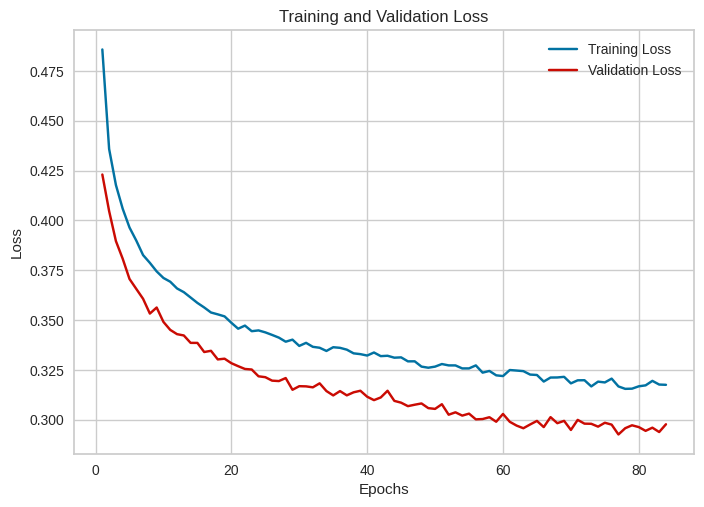

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_over.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

early_stopping = EarlyStopping(monitor='val_loss', patience=7)

history = model.fit(X_train_over, y_train_over, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_over, y_test_over), callbacks=[early_stopping])

# 훈련 손실과 검증 손실 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch 수 추출
epochs = range(1, len(train_loss) + 1)

# 손실 그래프 그리기
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predict_keras = model.predict(X_test_over)

305/305 [==============================] - 0s 1ms/step


In [ ]:
threshold = 0.5  # 임계값 설정 (예시: 0.5)
predict_NN = np.where(predict_keras >= threshold, 1, 0)

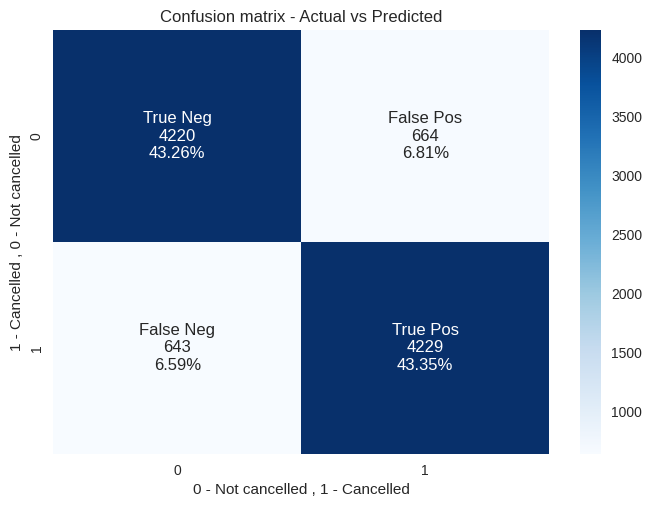

In [ ]:
print_confusion_matrix(y_test_over,predict_NN)

In [ ]:
classification_NN = (classification_report(y_test_over, predict_NN))
print(classification_NN)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4884
           1       0.86      0.87      0.87      4872

    accuracy                           0.87      9756
   macro avg       0.87      0.87      0.87      9756
weighted avg       0.87      0.87      0.87      9756



Epoch 1/100
1220/1220 [==============================] - 13s 7ms/step - loss: 0.5005 - val_loss: 0.4280
Epoch 2/100
1220/1220 [==============================] - 8s 7ms/step - loss: 0.4502 - val_loss: 0.4102
Epoch 3/100
1220/1220 [==============================] - 7s 6ms/step - loss: 0.4354 - val_loss: 0.3912
Epoch 4/100
1220/1220 [==============================] - 9s 7ms/step - loss: 0.4272 - val_loss: 0.3862
Epoch 5/100
1220/1220 [==============================] - 7s 6ms/step - loss: 0.4161 - val_loss: 0.3767
Epoch 6/100
1220/1220 [==============================] - 8s 7ms/step - loss: 0.4103 - val_loss: 0.3705
Epoch 7/100
1220/1220 [==============================] - 8s 7ms/step - loss: 0.4032 - val_loss: 0.3629
Epoch 8/100
1220/1220 [==============================] - 8s 6ms/step - loss: 0.3998 - val_loss: 0.3585
Epoch 9/100
1220/1220 [==============================] - 8s 7ms/step - loss: 0.3937 - val_loss: 0.3531
Epoch 10/100
1220/1220 [==============================] - 7s 6ms/step - 

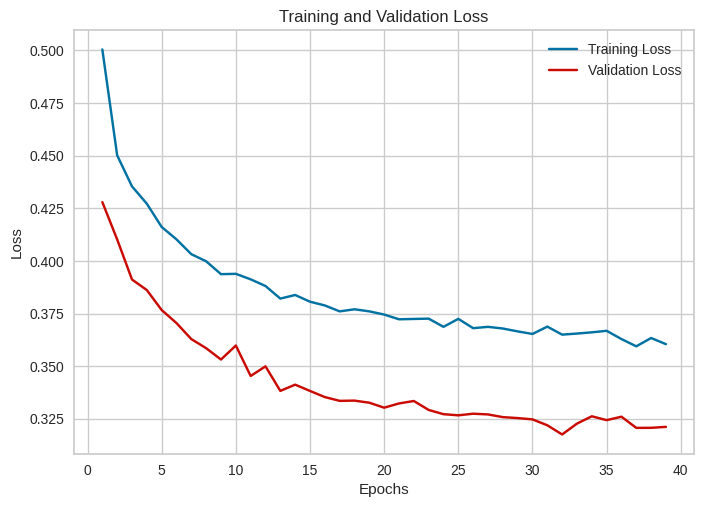

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')
early_stopping = EarlyStopping(monitor='val_loss', patience=7)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 훈련 손실과 검증 손실 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch 수 추출
epochs = range(1, len(train_loss) + 1)

# 손실 그래프 그리기
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predict_keras_batch = model.predict(X_test)

305/305 [==============================] - 1s 2ms/step


In [ ]:
threshold = 0.5  # 임계값 설정 (예시: 0.5)
predict_NN_batch = np.where(predict_keras_batch >= threshold, 1, 0)

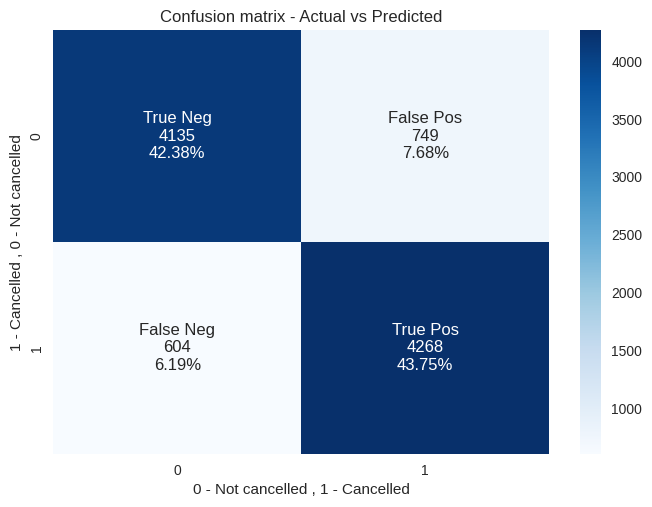

In [ ]:
print_confusion_matrix(y_test,predict_NN_batch)

In [ ]:
classification_NN_batch = (classification_report(y_test, predict_NN_batch))
print(classification_NN_batch)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4884
           1       0.85      0.88      0.86      4872

    accuracy                           0.86      9756
   macro avg       0.86      0.86      0.86      9756
weighted avg       0.86      0.86      0.86      9756



In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train_over, y_train_over)
predict_svm = svm.predict(X_test_over)

0.8286182861828618

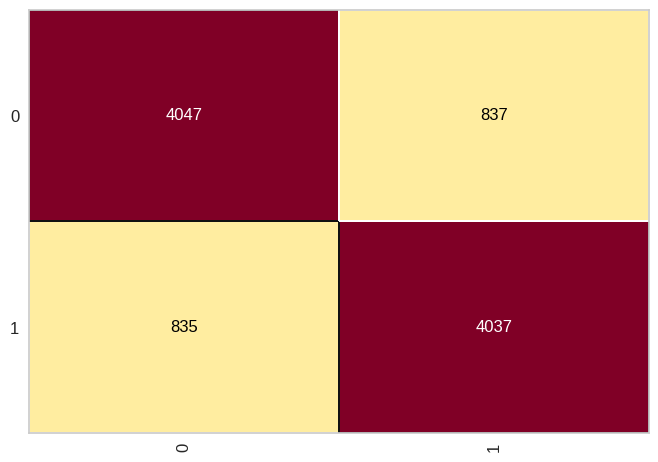

In [ ]:
cm = ConfusionMatrix(svm)
cm.fit(X_train_over, y_train_over)
cm.score(X_test_over, y_test_over)

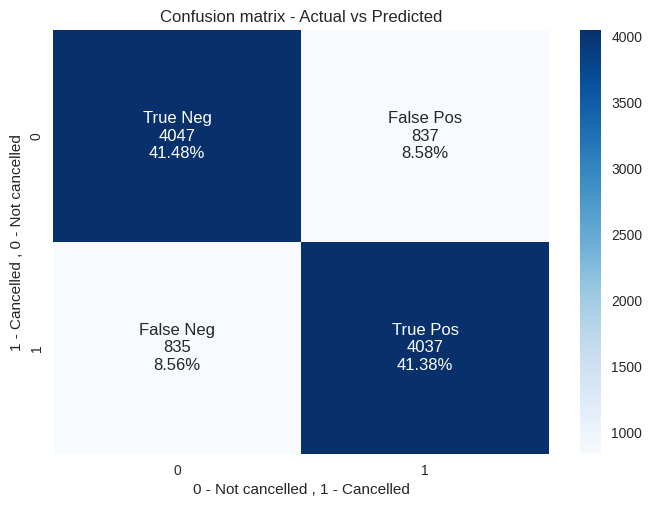

In [ ]:
print_confusion_matrix(y_test_over,predict_svm)

In [ ]:
classification_svm = (classification_report(y_test_over, predict_svm))
print(classification_svm)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4884
           1       0.83      0.83      0.83      4872

    accuracy                           0.83      9756
   macro avg       0.83      0.83      0.83      9756
weighted avg       0.83      0.83      0.83      9756



0.8471399035148174

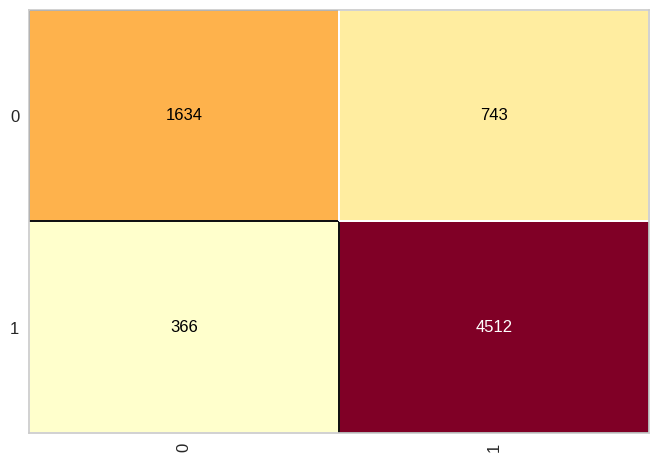

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train_stratified, y_train_stratified)
predict_svm = svm.predict(X_test_stratified)

cm = ConfusionMatrix(svm)
cm.fit(X_train_stratified, y_train_stratified)
cm.score(X_test_stratified, y_test_stratified)


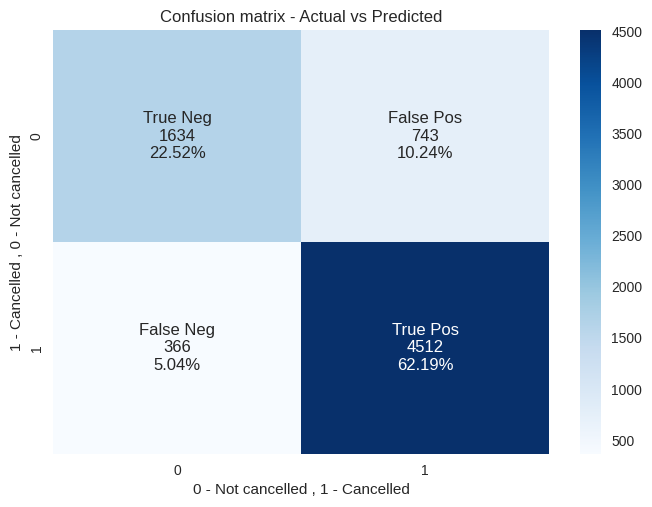

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      2377
           1       0.86      0.92      0.89      4878

    accuracy                           0.85      7255
   macro avg       0.84      0.81      0.82      7255
weighted avg       0.84      0.85      0.84      7255



In [ ]:
print_confusion_matrix(y_test_stratified,predict_svm)

classification_svm = (classification_report(y_test_stratified, predict_svm))
print(classification_svm)

0.8092132940681531

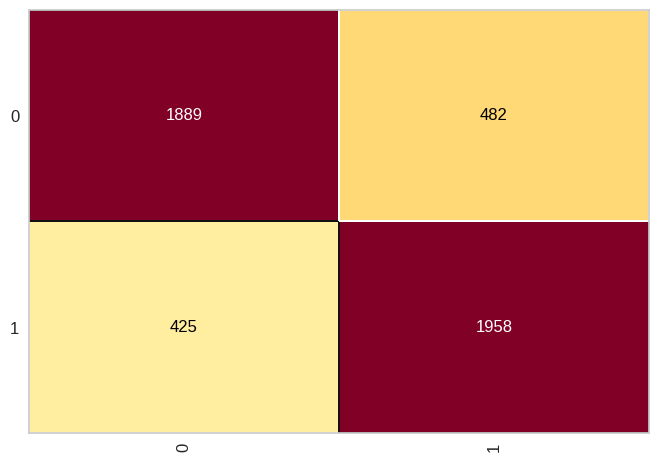

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train_under, y_train_under)
predict_svm = svm.predict(X_test_under)

cm = ConfusionMatrix(svm)
cm.fit(X_train_under, y_train_under)
cm.score(X_test_under, y_test_under)


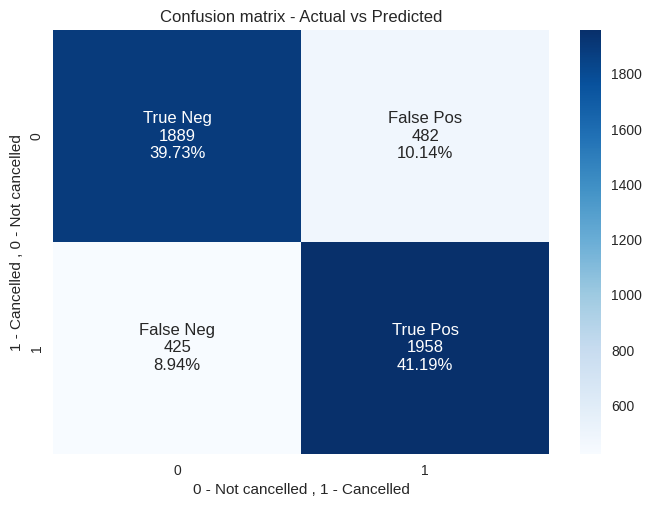

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2371
           1       0.80      0.82      0.81      2383

    accuracy                           0.81      4754
   macro avg       0.81      0.81      0.81      4754
weighted avg       0.81      0.81      0.81      4754



In [ ]:
print_confusion_matrix(y_test_under,predict_svm)

classification_svm = (classification_report(y_test_under, predict_svm))
print(classification_svm)

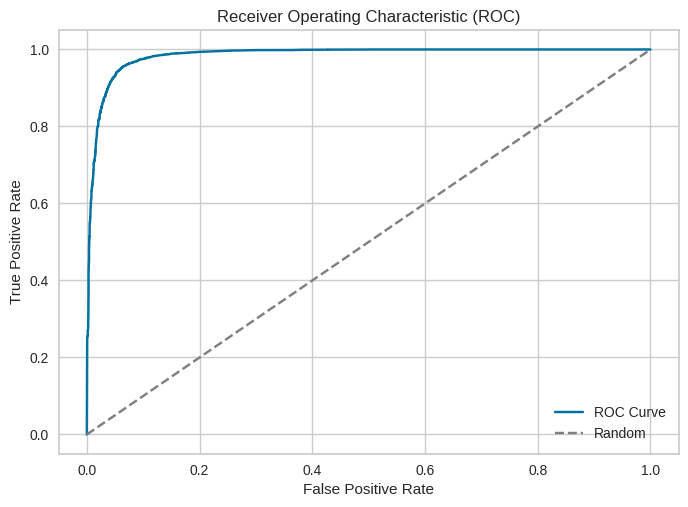

AUC: 0.984807803773321


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# 개별 분류기 생성
base_classifier = DecisionTreeClassifier()
# 배깅 분류기 생성
bagging = BaggingClassifier(base_classifier, n_estimators=50, random_state=42, max_features=0.8, max_samples=0.85)
# 배깅 분류기 학습
bagging.fit(X_train, y_train)
predict_bagging = bagging.predict(X_test)



# 배깅 분류기의 예측 확률을 얻음
probabilities = bagging.predict_proba(X_test)
# 양성 클래스의 확률을 추출
positive_probabilities = probabilities[:, 1]

# 실제값과 양성 클래스의 예측 확률을 사용하여 ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, positive_probabilities)

# ROC 곡선 시각화
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

# AUC(Area Under the Curve) 계산
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)







Optimal Threshold: 0.41
Optimal Threshold: 0.40700000000000025
Best F1 Score: 0.9462474645030426


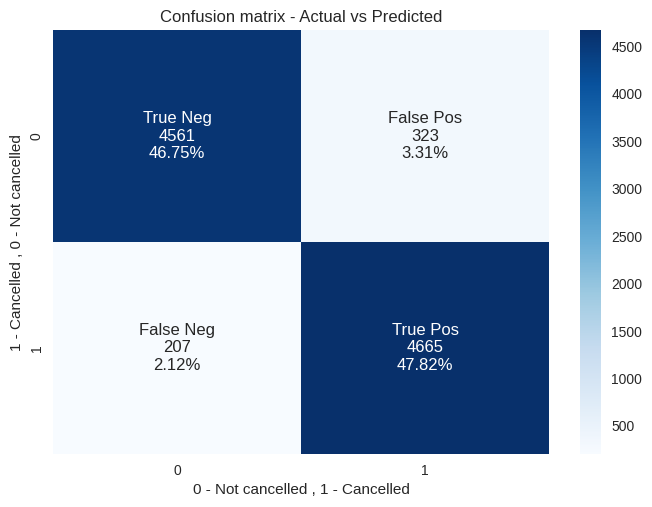

In [ ]:
# TPR과 FPR의 차이를 계산하여 최적의 임계값 찾기
diff = tpr - fpr
optimal_threshold2 = thresholds[np.argmax(diff)]

print("Optimal Threshold:", optimal_threshold2)



from sklearn.metrics import f1_score

# 실제값과 양성 클래스의 예측 확률을 사용하여 F1 점수 계산
def calculate_f1_score(y_true, positive_probabilities, threshold):
    predictions = (positive_probabilities > threshold).astype(int)
    f1 = f1_score(y_true, predictions)
    return f1

# 다양한 임계값에 대한 F1 점수 계산
def find_optimal_threshold(y_true, positive_probabilities):
    thresholds = np.arange(0.1, 1.0, 0.001)
    optimal_threshold = None
    best_f1 = 0.0

    for threshold in thresholds:
        f1 = calculate_f1_score(y_true, positive_probabilities, threshold)
        if f1 > best_f1:
            best_f1 = f1
            optimal_threshold = threshold

    return optimal_threshold, best_f1

# F1 점수를 최대화하는 임계값 찾기
optimal_threshold, best_f1 = find_optimal_threshold(y_test, positive_probabilities)

print("Optimal Threshold:", optimal_threshold)
print("Best F1 Score:", best_f1)



last_bagging_pred = classify_array(positive_probabilities,optimal_threshold)

print_confusion_matrix(y_test,last_bagging_pred)


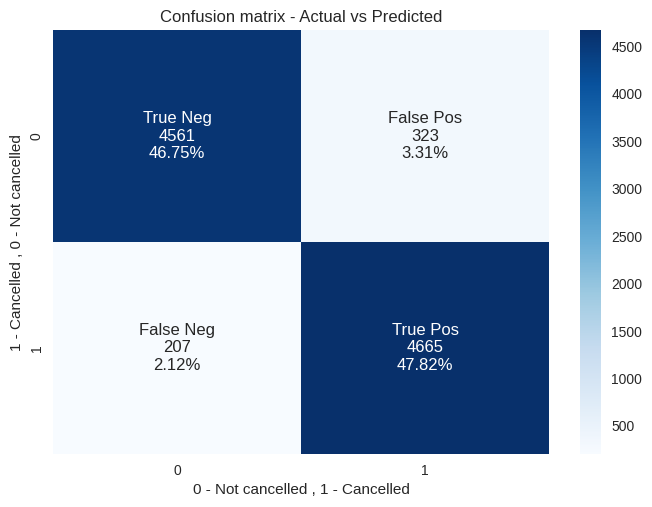

In [ ]:
last_bagging_pred = classify_array(positive_probabilities,0.41)

print_confusion_matrix(y_test,last_bagging_pred)

0.939729397293973

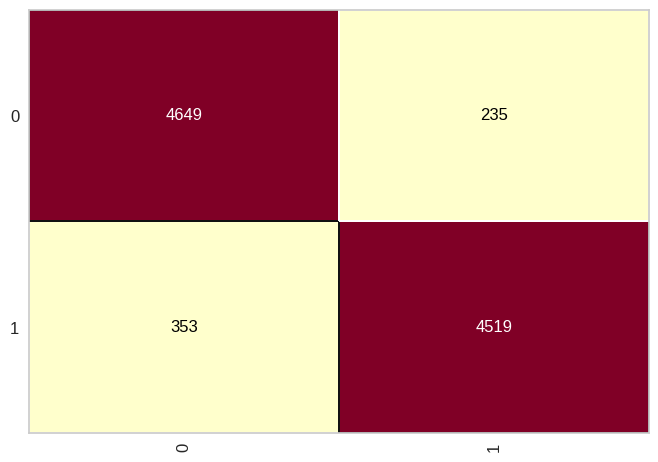

In [ ]:
cm = ConfusionMatrix(bagging)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

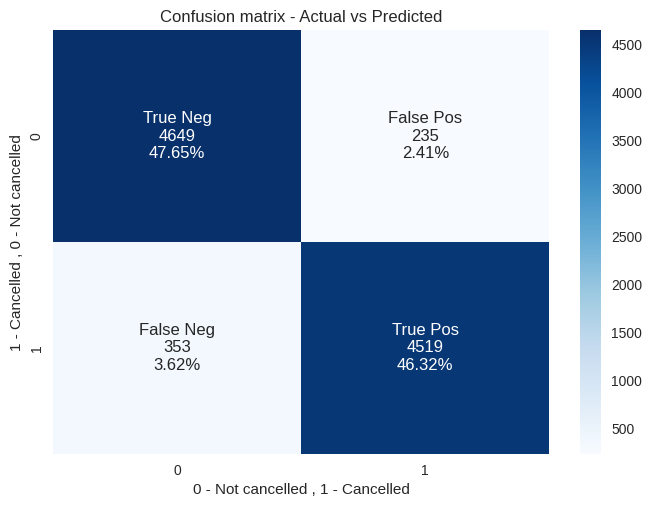

In [ ]:
print_confusion_matrix(y_test,predict_bagging)

In [ ]:
classification_bagging = (classification_report(y_test, predict_bagging))
print(classification_bagging)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4884
           1       0.95      0.93      0.94      4872

    accuracy                           0.94      9756
   macro avg       0.94      0.94      0.94      9756
weighted avg       0.94      0.94      0.94      9756



In [ ]:
# 강분류기를 쓴다면?
base_classifier_Strong = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=42)
# 배깅 분류기 생성
bagging_Strong = BaggingClassifier(base_classifier_Strong, n_estimators=100, random_state=42, max_features=0.8, max_samples=0.85)
# 배깅 분류기 학습
bagging_Strong.fit(X_train, y_train)
predict_bagging_Strong = bagging_Strong.predict(X_test)

0.8880688806888068

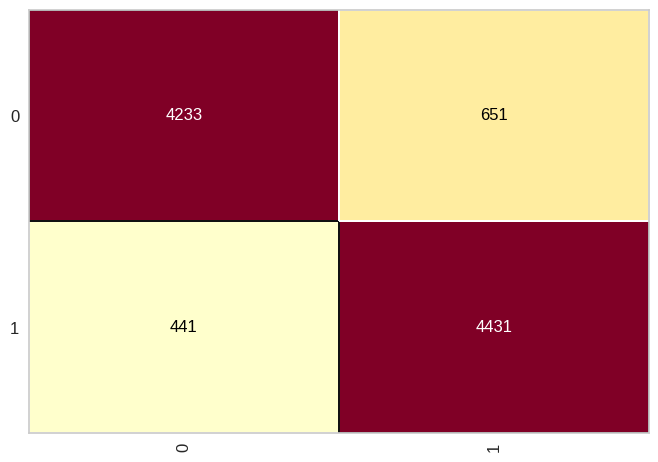

In [ ]:
cm = ConfusionMatrix(bagging_Strong)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

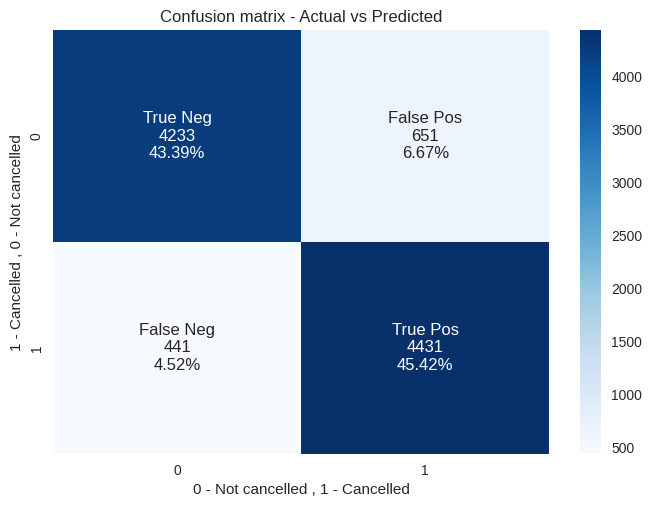

In [ ]:
print_confusion_matrix(y_test,predict_bagging_Strong)

In [ ]:
classification_bagging = (classification_report(y_test, predict_bagging_Strong))
print(classification_bagging)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4884
           1       0.87      0.91      0.89      4872

    accuracy                           0.89      9756
   macro avg       0.89      0.89      0.89      9756
weighted avg       0.89      0.89      0.89      9756



다양성 부족: 강 분류기들이 서로 동일한 패턴을 학습하거나 비슷한 방식으로 예측을 수행할 경우, 앙상블의 성능 향상이 기대되지 않습니다. 이를 다양성 부족(Diversity Lack)이라고 합니다. 다양성 부족은 앙상블의 성능을 저하시킬 수 있습니다. 따라서, 강 분류기들을 선택할 때는 서로 다른 알고리즘, 다른 하이퍼파라미터 설정 등을 고려하여 다양성을 확보하는 것이 중요합니다.

Accuracy: 0.9410619106191062


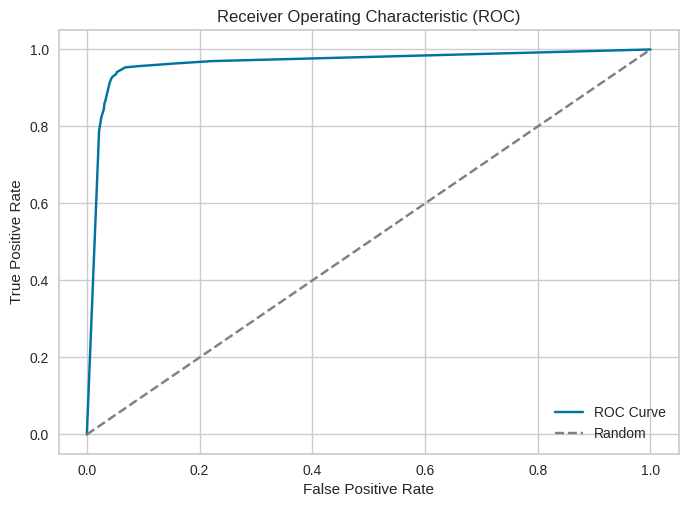

AUC: 0.9648616372754304


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
import numpy as np


# 기본 모델 정의
knn = KNeighborsClassifier(n_neighbors = 1)
# 개별 분류기 생성
base_classifier = DecisionTreeClassifier()
bagging = BaggingClassifier(base_classifier, n_estimators=100, random_state=42, max_features=0.8, max_samples=0.85)
rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 4, max_depth= 11,  criterion = 'gini', random_state = 42)
mlp = MLPClassifier(activation='relu', alpha=0.01,
                       hidden_layer_sizes=(64,32,10), max_iter=1000,
                       solver='adam', momentum=0.9, early_stopping=True, random_state = 42)

# 기본 모델 리스트 생성
base_models = [knn, bagging, rf, mlp]

# 메타 모델 입력 데이터 초기화
meta_features_train = np.zeros((X_train.shape[0], len(base_models)))
meta_features_test = np.zeros((X_test.shape[0], len(base_models)))

# 기본 모델 훈련 및 예측
for i, model in enumerate(base_models):
    model.fit(X_train, y_train)
    meta_features_train[:, i] = model.predict(X_train)
    meta_features_test[:, i] = model.predict(X_test)

# 메타 모델 정의 및 훈련
meta_model = XGBClassifier(
    n_estimators=1000,  # 트리의 개수
    max_depth=6,  # 트리의 최대 깊이
    learning_rate=0.01,  # 학습률
    subsample=0.85,  # 각 트리에 사용될 샘플 비율
    colsample_bytree=0.8,  # 각 트리에 사용될 특성(feature) 비율
    random_state=42
)
meta_model.fit(meta_features_train, y_train)

# 최종 예측
final_pred = meta_model.predict(meta_features_test)

# 정확도 평가
accuracy = accuracy_score(y_test, final_pred)
print("Accuracy:", accuracy)

# 배깅 분류기의 예측 확률을 얻음
probabilities = meta_model.predict_proba(meta_features_test)
# 양성 클래스의 확률을 추출
positive_probabilities = probabilities[:, 1]

# 실제값과 양성 클래스의 예측 확률을 사용하여 ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, positive_probabilities)

# ROC 곡선 시각화
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

# AUC(Area Under the Curve) 계산
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)

Optimal Threshold: 0.40922683
Optimal Threshold: 0.27600000000000013
Best F1 Score: 0.943695316520844


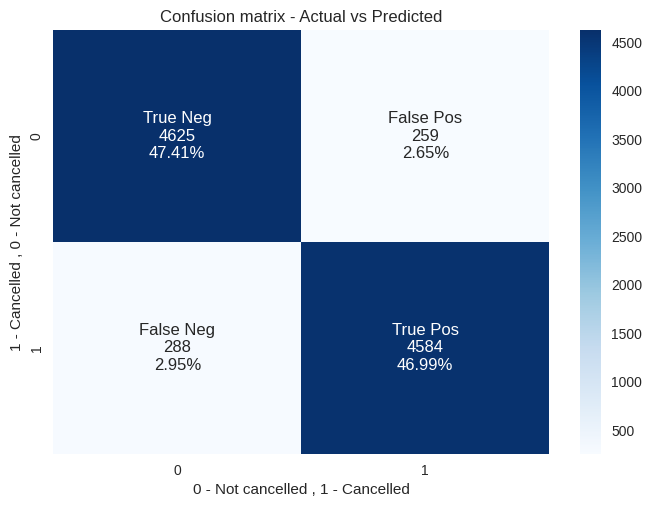

In [ ]:



# TPR과 FPR의 차이를 계산하여 최적의 임계값 찾기
diff = tpr - fpr
optimal_threshold2 = thresholds[np.argmax(diff)]

print("Optimal Threshold:", optimal_threshold2)



from sklearn.metrics import f1_score

# 실제값과 양성 클래스의 예측 확률을 사용하여 F1 점수 계산
def calculate_f1_score(y_true, positive_probabilities, threshold):
    predictions = (positive_probabilities > threshold).astype(int)
    f1 = f1_score(y_true, predictions)
    return f1

# 다양한 임계값에 대한 F1 점수 계산
def find_optimal_threshold(y_true, positive_probabilities):
    thresholds = np.arange(0.1, 1.0, 0.001)
    optimal_threshold = None
    best_f1 = 0.0

    for threshold in thresholds:
        f1 = calculate_f1_score(y_true, positive_probabilities, threshold)
        if f1 > best_f1:
            best_f1 = f1
            optimal_threshold = threshold

    return optimal_threshold, best_f1

# F1 점수를 최대화하는 임계값 찾기
optimal_threshold, best_f1 = find_optimal_threshold(y_test, positive_probabilities)

print("Optimal Threshold:", optimal_threshold)
print("Best F1 Score:", best_f1)



last_bagging_pred = classify_array(positive_probabilities,optimal_threshold)

print_confusion_matrix(y_test,last_bagging_pred)


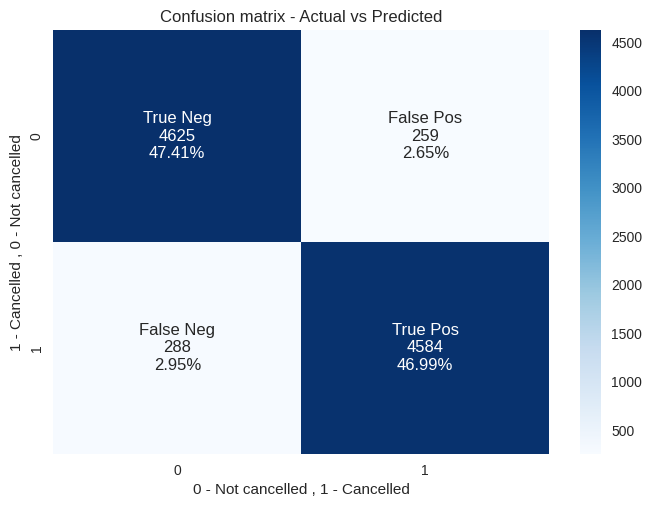

In [ ]:
last_bagging_pred = classify_array(positive_probabilities,0.27600000000000013)

print_confusion_matrix(y_test,last_bagging_pred)

numpy.ndarray

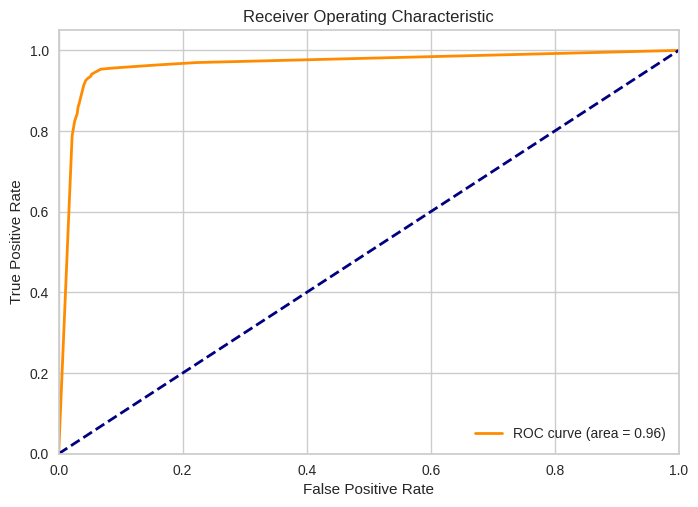

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import numpy as np


# 기본 모델 정의
knn = KNeighborsClassifier(n_neighbors = 1)
# 개별 분류기 생성
base_classifier = DecisionTreeClassifier()
bagging = BaggingClassifier(base_classifier, n_estimators=100, random_state=42, max_features=0.8, max_samples=0.85)
rf = RandomForestClassifier(n_estimators = 100, min_samples_split = 4, max_depth= 11,  criterion = 'gini', random_state = 42)
mlp = MLPClassifier(activation='relu', alpha=0.01,
                       hidden_layer_sizes=(64,32,10), max_iter=1000,
                       solver='adam', momentum=0.9, early_stopping=True, random_state = 42)

# 기본 모델 리스트 생성
base_models = [knn, bagging, rf, mlp]

# 메타 모델 입력 데이터 초기화
meta_features_train = np.zeros((X_train.shape[0], len(base_models)))
meta_features_test = np.zeros((X_test.shape[0], len(base_models)))

# 기본 모델 훈련 및 예측
for i, model in enumerate(base_models):
    model.fit(X_train, y_train)
    meta_features_train[:, i] = model.predict(X_train)
    meta_features_test[:, i] = model.predict(X_test)


meta_model = XGBClassifier(
    n_estimators=1000,  # 트리의 개수
    max_depth=6,  # 트리의 최대 깊이
    learning_rate=0.01,  # 학습률
    subsample=0.85,  # 각 트리에 사용될 샘플 비율
    colsample_bytree=0.8,  # 각 트리에 사용될 특성(feature) 비율
    random_state=42
)
meta_model.fit(meta_features_train, y_train)

# 최종 예측 확률
final_pred_proba = meta_model.predict_proba(meta_features_test)[:, 1]

# AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, final_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()




Feature 1: 0.30336177349090576
Feature 2: 0.6942239999771118
Feature 3: 0.0005196625716052949
Feature 4: 0.0018945465562865138


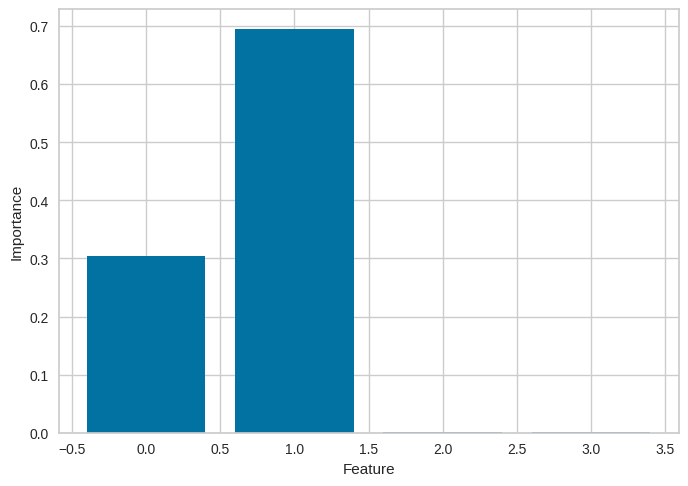

In [ ]:
# 변수 중요도 계산
feature_importances = meta_model.feature_importances_

# 변수 중요도 출력
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")

# 변수 중요도 시각화
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

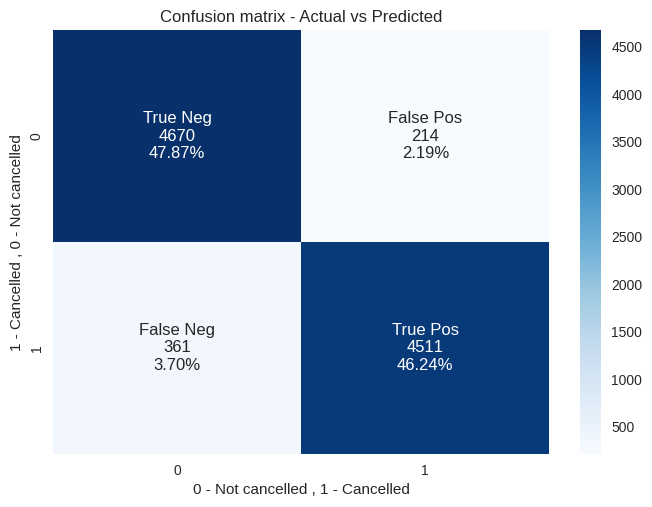

In [ ]:
print_confusion_matrix(y_test,final_pred)

In [ ]:
classification_bagging = (classification_report(y_test, final_pred))
print(classification_bagging)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4884
           1       0.95      0.93      0.94      4872

    accuracy                           0.94      9756
   macro avg       0.94      0.94      0.94      9756
weighted avg       0.94      0.94      0.94      9756



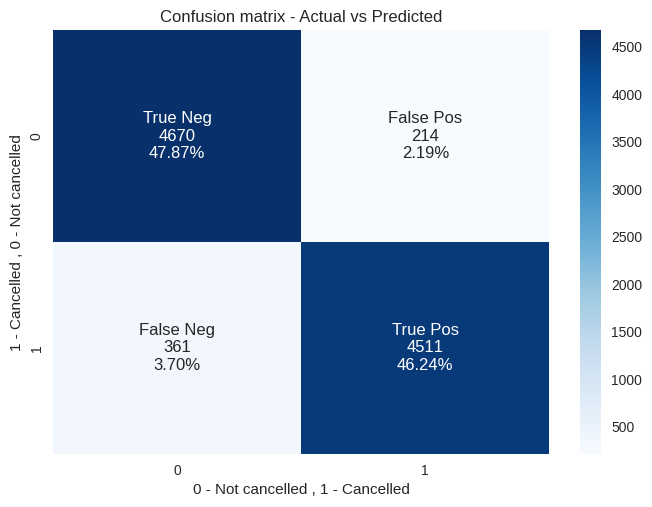

In [ ]:
print_confusion_matrix(y_test,final_pred)

In [ ]:
classification_bagging = (classification_report(y_test, final_pred))
print(classification_bagging)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4884
           1       0.95      0.93      0.94      4872

    accuracy                           0.94      9756
   macro avg       0.94      0.94      0.94      9756
weighted avg       0.94      0.94      0.94      9756



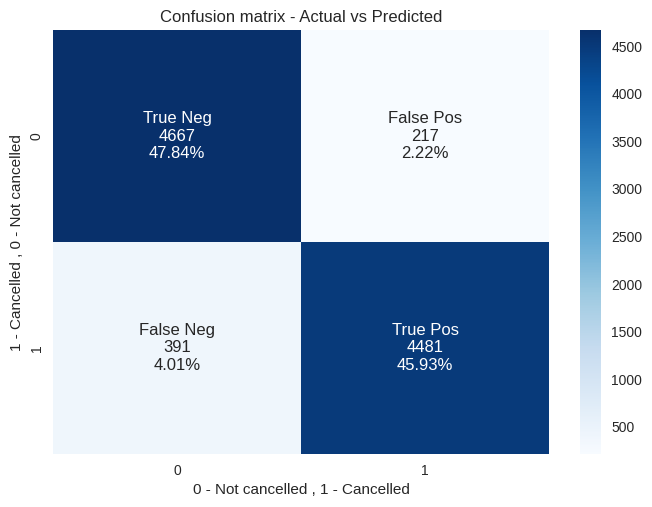

In [ ]:
print_confusion_matrix(y_test,final_pred)

In [ ]:
classification_bagging = (classification_report(y_test, final_pred))
print(classification_bagging)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4884
           1       0.95      0.92      0.94      4872

    accuracy                           0.94      9756
   macro avg       0.94      0.94      0.94      9756
weighted avg       0.94      0.94      0.94      9756



## 두개로만

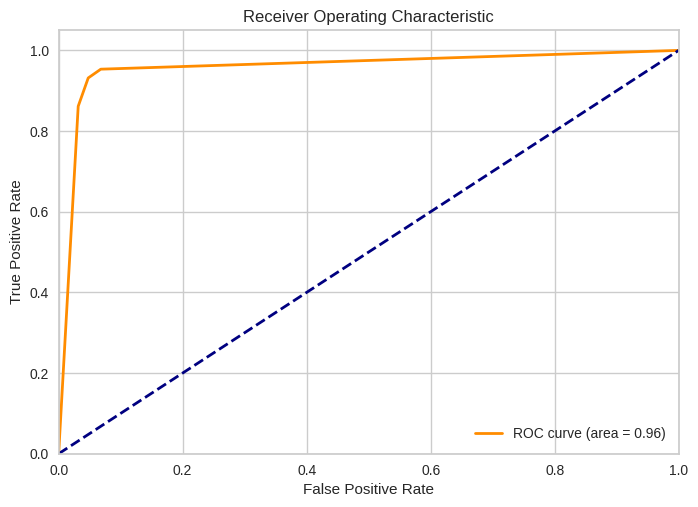

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import numpy as np


# 기본 모델 정의
knn = KNeighborsClassifier(n_neighbors = 1)
# 개별 분류기 생성
base_classifier = DecisionTreeClassifier()
bagging = BaggingClassifier(base_classifier, n_estimators=100, random_state=42, max_features=0.8, max_samples=0.85)

# 기본 모델 리스트 생성
base_models = [knn, bagging]

# 메타 모델 입력 데이터 초기화
meta_features_train = np.zeros((X_train.shape[0], len(base_models)))
meta_features_test = np.zeros((X_test.shape[0], len(base_models)))

# 기본 모델 훈련 및 예측
for i, model in enumerate(base_models):
    model.fit(X_train, y_train)
    meta_features_train[:, i] = model.predict(X_train)
    meta_features_test[:, i] = model.predict(X_test)


meta_model = XGBClassifier(
    n_estimators=1000,  # 트리의 개수
    max_depth=6,  # 트리의 최대 깊이
    learning_rate=0.01,  # 학습률
    subsample=0.85,  # 각 트리에 사용될 샘플 비율
    colsample_bytree=0.8,  # 각 트리에 사용될 특성(feature) 비율
    random_state=42
)
meta_model.fit(meta_features_train, y_train)

# 최종 예측 확률
final_pred_proba = meta_model.predict_proba(meta_features_test)[:, 1]

# AUC 계산
fpr, tpr, thresholds = roc_curve(y_test, final_pred_proba)
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
import numpy as np


# 기본 모델 정의
knn = KNeighborsClassifier(n_neighbors = 1)
# 개별 분류기 생성
base_classifier = DecisionTreeClassifier()
bagging = BaggingClassifier(base_classifier, n_estimators=100, random_state=42, max_features=0.8, max_samples=0.85)


# 기본 모델 리스트 생성
base_models = [knn, bagging]

# 메타 모델 입력 데이터 초기화
meta_features_train = np.zeros((X_train.shape[0], len(base_models)))
meta_features_test = np.zeros((X_test.shape[0], len(base_models)))

# 기본 모델 훈련 및 예측
for i, model in enumerate(base_models):
    model.fit(X_train, y_train)
    meta_features_train[:, i] = model.predict(X_train)
    meta_features_test[:, i] = model.predict(X_test)

# 메타 모델 정의 및 훈련
meta_model = XGBClassifier(
    n_estimators=1000,  # 트리의 개수
    max_depth=6,  # 트리의 최대 깊이
    learning_rate=0.01,  # 학습률
    subsample=0.85,  # 각 트리에 사용될 샘플 비율
    colsample_bytree=0.8,  # 각 트리에 사용될 특성(feature) 비율
    random_state=42
)
meta_model.fit(meta_features_train, y_train)

# 최종 예측
final_pred = meta_model.predict(meta_features_test)

# 정확도 평가
accuracy = accuracy_score(y_test, final_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9419844198441985


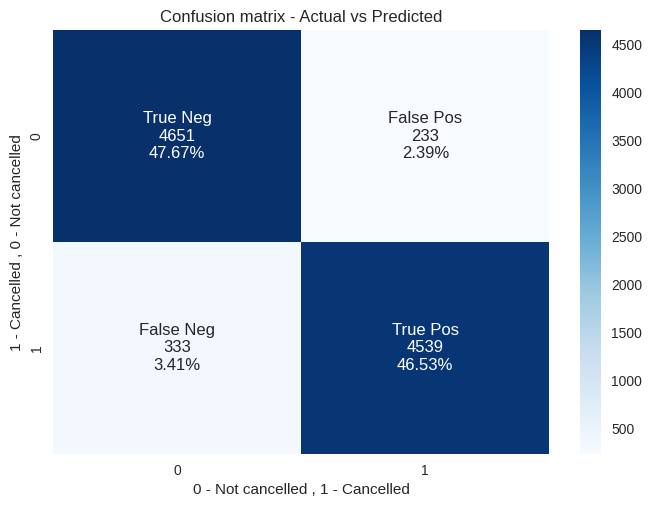

In [ ]:
print_confusion_matrix(y_test,final_pred)

In [ ]:
classification_bagging = (classification_report(y_test, final_pred))
print(classification_bagging)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4884
           1       0.95      0.93      0.94      4872

    accuracy                           0.94      9756
   macro avg       0.94      0.94      0.94      9756
weighted avg       0.94      0.94      0.94      9756



## 클러스터링으로 정답 레이블과 비교

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
model = KMeans(n_clusters = 2, random_state= 42)
model.fit(X_train)
predict_KMeans = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
classification_kmeans_standard = (f1_score(y_test, predict_KMeans))
classification_kmeans_standard

0.010210332856851132

정확도가 매우 좋지 않은 것을 확인 할 수 있다.

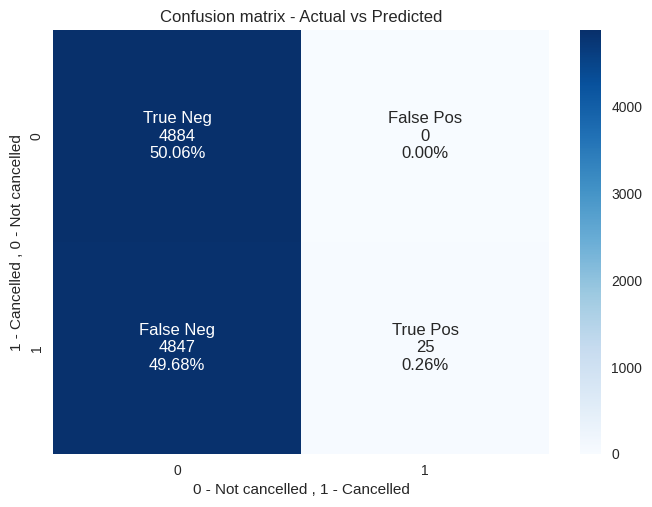

In [ ]:
print_confusion_matrix(y_test,predict_KMeans)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score

# 초기 K 값을 크게 설정
initial_k = 10

# K-means 모델 생성
model = KMeans(n_clusters=initial_k, random_state=42)
model.fit(X_train)

# 예측된 클러스터 레이블
predict_labels = model.predict(X_train)

# 각 K 값에 대한 SSE 계산
sse = []
for k in range(1, initial_k+1):
    k_model = KMeans(n_clusters=k, random_state=42)
    k_model.fit(X_train)
    sse.append(k_model.inertia_)

# SSE가 가장 작은 K 값을 찾아 클러스터 개수 조정
optimal_k = sse.index(min(sse)) + 1

# 최적 K 값으로 모델 다시 생성
final_model = KMeans(n_clusters=optimal_k, random_state=42)
final_model.fit(X_train)

# 최종 예측된 클러스터 레이블
final_labels = final_model.predict(X_train)

# 이진 분류를 위한 후처리
final_labels_binary = np.where(final_labels < 2, 0, 1)

# 클러스터 레이블로 모델 평가
f1_score = f1_score(y_train, final_labels_binary)

print("F1 Score:", f1_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

F1 Score: 0.5397382154162033


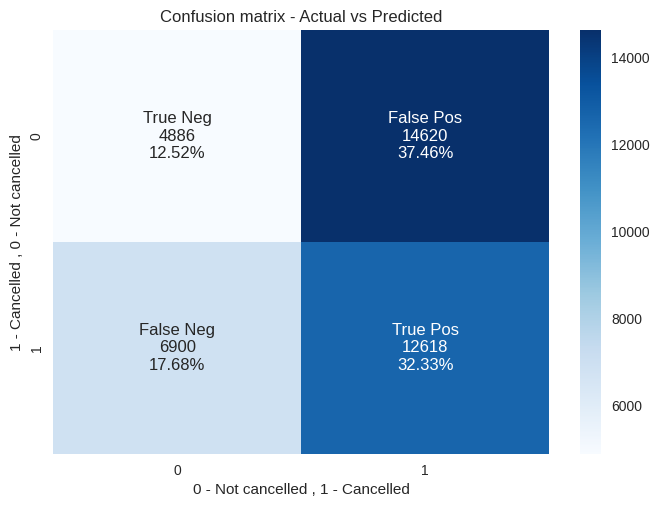

In [ ]:
print_confusion_matrix(y_train,final_labels_binary)

클러스터링은 잘 작동되지 않는 것을 볼 수 있다.

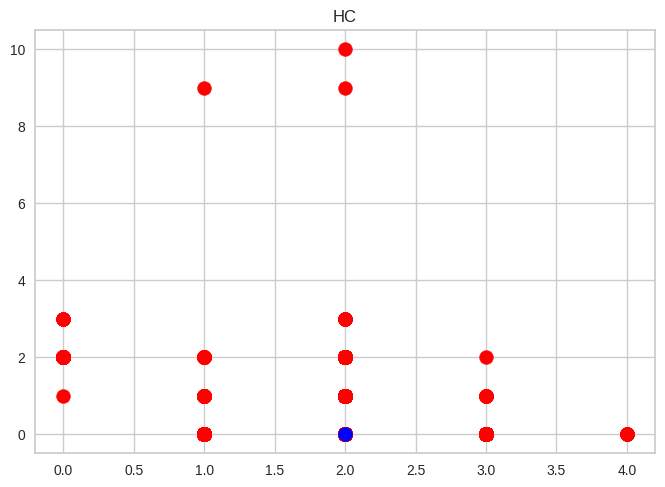

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')
Y_tahmin = ac.fit_predict(X)
#print(Y_tahmin)

plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.title('HC')
plt.show()

In [ ]:
# 실제 레이블과 클러스터링 결과 비교
accuracy = accuracy_score(y, Y_tahmin)

print("Accuracy:", accuracy)

Accuracy: 0.32760854583046173


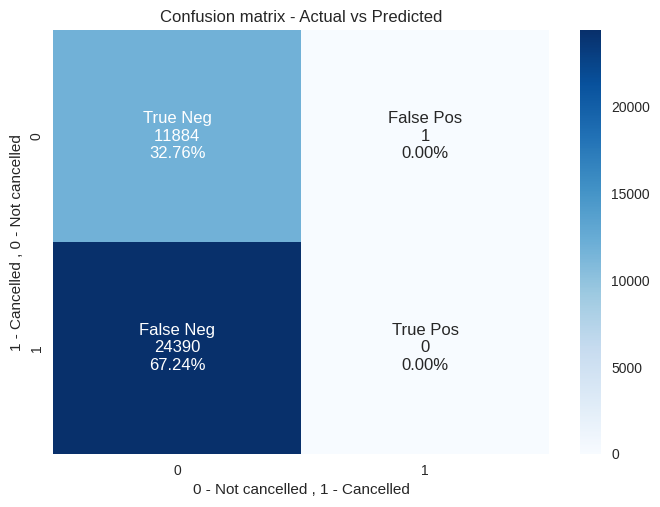

In [ ]:
print_confusion_matrix(y,Y_tahmin)

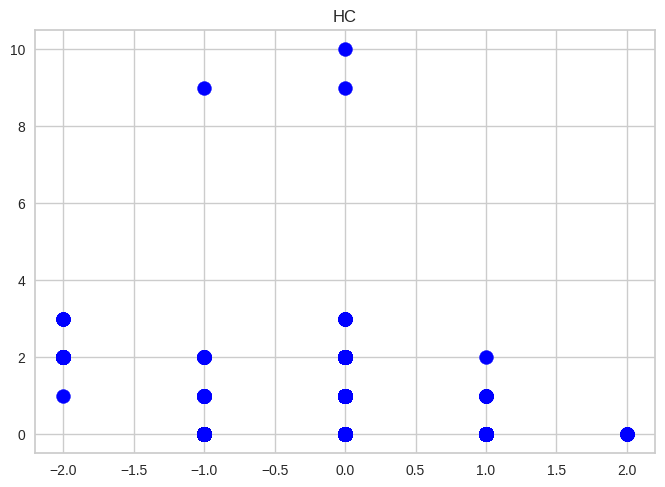

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
Y_tahmin = ac.fit_predict(X)
#print(Y_tahmin)

plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.title('HC')
plt.show()

In [ ]:
# 실제 레이블과 클러스터링 결과 비교
accuracy = accuracy_score(y, Y_tahmin)

print("Accuracy:", accuracy)

Accuracy: 0.6711509303928326


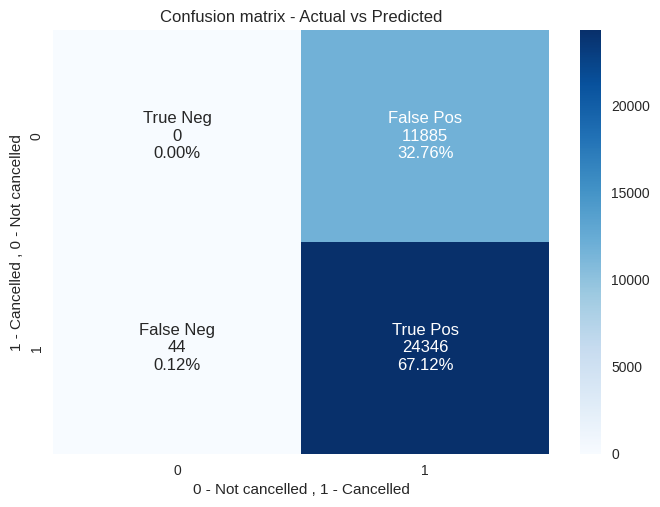

In [ ]:
print_confusion_matrix(y,Y_tahmin)

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances_argmin_min, accuracy_score

# DBSCAN으로 군집 분석을 수행하는 함수
def perform_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    return labels

# SSE 기반으로 후처리로 두 개의 군집으로 만들어주는 함수
def postprocess_clusters(X, labels):
    # 각 군집의 중심점 찾기
    cluster_centers, _ = pairwise_distances_argmin_min(X, X, metric='euclidean', axis=0)

    # SSE를 기반으로 군집 분할하기
    sse = []
    for label in range(max(labels) + 1):
        cluster_points = X[labels == label]
        sse.append(np.sum((cluster_points - cluster_centers[label]) ** 2))
    sorted_clusters = sorted(range(len(sse)), key=sse.__getitem__)

    # 가장 작은 SSE를 가진 두 개의 군집으로 후처리
    processed_labels = np.zeros_like(labels)
    processed_labels[labels == sorted_clusters[0]] = 0
    processed_labels[labels == sorted_clusters[1]] = 1
    return processed_labels

# 실제 정답과 비교하는 함수
def compare_with_ground_truth(predicted_labels, y):
    accuracy = accuracy_score(y, predicted_labels)
    return accuracy


# DBSCAN으로 군집 분석 수행
eps = 2
min_samples = 2
labels = perform_dbscan(X, eps, min_samples)

# 후처리로 두 개의 군집으로 만들어줌
processed_labels = postprocess_clusters(X, labels)

# 실제 정답과 비교
accuracy = compare_with_ground_truth(processed_labels, y)
print("Accuracy:", accuracy)

Accuracy: 0.5000410004100041


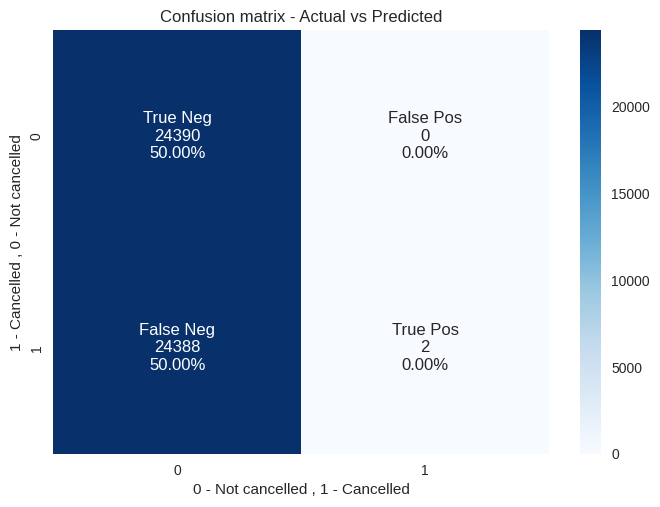

In [ ]:
print_confusion_matrix(y,processed_labels)

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# DBSCAN을 사용하여 군집을 분석합니다.
dbscan = DBSCAN(eps=0.5, min_samples=10)
clusters = dbscan.fit_predict(X)

# SSE를 기준으로 후처리를 통해 최종적으로 군집 2개로 만듭니다.
sse = np.zeros(len(clusters) + 1)
for i in range(len(clusters) + 1):
    sse[i] = np.sum((X[clusters == i] - X[clusters == i].mean(axis=0)) ** 2)

# 최소 SSE를 갖는 군집을 선택합니다.
min_sse = np.min(sse)
best_cluster = np.argmin(sse)

# 정답 레이블과 비교합니다.
accuracy = np.sum(best_cluster == y) / len(y)

print('정답률:', accuracy)

<ipython-input-25-53bb391dc951>:13: RuntimeWarning: Mean of empty slice.
  sse[i] = np.sum((X[clusters == i] - X[clusters == i].mean(axis=0)) ** 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


정답률: 0.0


In [ ]:
from sklearn.cluster import DBSCAN

# 데이터 준비
# 데이터는 numpy 배열 또는 pandas DataFrame 형태로 준비되어 있어야 합니다.
# X: 클러스터링을 수행할 데이터

# DBSCAN 모델 생성
# eps: 이웃을 정의하기 위한 거리 임계값
# min_samples: 핵심 샘플로 간주되기 위한 이웃의 최소 개수
dbscan = DBSCAN(eps=2, min_samples=20)

# 클러스터링 수행
dbscan.fit(X)

# 클러스터 할당 결과 확인
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # 클러스터 개수
n_noise = list(labels).count(-1)  # 노이즈(이상치) 개수

# 결과 출력
print(f"클러스터 개수: {n_clusters}")
print(f"노이즈(이상치) 개수: {n_noise}")
print("클러스터 할당 결과:")
print(labels)

클러스터 개수: 2
노이즈(이상치) 개수: 236
클러스터 할당 결과:
[0 0 0 ... 0 0 0]


In [ ]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1]), array([  236, 23519,    15]))

In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=2, min_samples=20)
dbscan.fit(X)

# 클러스터 레이블 및 고유 클러스터 가져오기
labels = dbscan.labels_
unique_labels = set(labels) - {-1}

# 클러스터 중심점 가져오기
centroids = []
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)

# K-means를 사용하여 클러스터 중심점을 기반으로 클러스터 합치기
kmeans = KMeans(n_clusters=2)  # 필요한 클러스터 개수에 맞게 변경
kmeans.fit(centroids)

# K-means 클러스터링 결과를 기반으로 새로운 레이블 할당
new_labels = kmeans.labels_

# SSE 기준으로 클러스터 합치기
merged_labels = labels.copy()
for old_label, new_label in zip(unique_labels, new_labels):
    merged_labels[labels == old_label] = new_label

# 클러스터 개수와 노이즈 포인트 개수 계산
n_clusters = len(set(merged_labels)) - (1 if -1 in merged_labels else 0)
n_noise = list(merged_labels).count(-1)


# 결과 출력
print(f"클러스터 개수: {n_clusters}")
print(f"노이즈 포인트 개수: {n_noise}")
print("클러스터 할당 결과:")
print(merged_labels)

클러스터 개수: 2
노이즈 포인트 개수: 236
클러스터 할당 결과:
[1 1 1 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
np.unique(merged_labels, return_counts=True)

(array([-1,  0,  1]), array([  236,    15, 23519]))

##클러스터링 다시

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datamining/Hotel_Reservations.csv")

In [ ]:
df['booking_status'] = df['booking_status'].replace({'Canceled': 0, 'Not_Canceled': 1})

In [ ]:
selected_columns = ['lead_time', 'avg_price_per_room', 'repeated_guest', 'no_of_previous_bookings_not_canceled',
                    'no_of_special_requests', 'required_car_parking_space', 'booking_status']

df_selected = df[selected_columns]

In [ ]:
df_selected

lead_time  avg_price_per_room  repeated_guest  \
0            224               65.00               0   
1              5              106.68               0   
2              1               60.00               0   
3            211              100.00               0   
4             48               94.50               0   
...          ...                 ...             ...   
36270         85              167.80               0   
36271        228               90.95               0   
36272        148               98.39               0   
36273         63               94.50               0   
36274        207              161.67               0   

       no_of_previous_bookings_not_canceled  no_of_special_requests  \
0                                         0                       0   
1                                         0                       1   
2                                         0                       0   
3                                         0                       0   
4                                         0                       0   
...                                     ...                     ...   
36270                                     0                       1   
36271                                     0                       2   
36272                                     0                       2   
36273                                     0                       0   
36274                                     0                       0   

       required_car_parking_space  booking_status  
0                               0               1  
1                               0               1  
2                               0               0  
3                               0               0  
4                               0               0  
...                           ...             ...  
36270                           0               1  
36271                           0               0  
36272                           0               1  
36273                           0               0  
36274                           0               1  

[36275 rows x 7 columns]

In [ ]:
X = df_selected.drop(['booking_status'], axis=1)
X = X.values
y = df_selected['booking_status']


In [ ]:
from sklearn.preprocessing import RobustScaler

# X: feature들로 이루어진 2D 배열
# RobustScaler 객체 생성
scaler = RobustScaler()
# 로버스트 스케일링 수행
X = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import DBSCAN

# 데이터 준비
# 데이터는 numpy 배열 또는 pandas DataFrame 형태로 준비되어 있어야 합니다.
# X: 클러스터링을 수행할 데이터

# DBSCAN 모델 생성
# eps: 이웃을 정의하기 위한 거리 임계값
# min_samples: 핵심 샘플로 간주되기 위한 이웃의 최소 개수
dbscan = DBSCAN(eps=0.3, min_samples=10)

# 클러스터링 수행
dbscan.fit(X)

# 클러스터 할당 결과 확인
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # 클러스터 개수
n_noise = list(labels).count(-1)  # 노이즈(이상치) 개수

# 결과 출력
print(f"클러스터 개수: {n_clusters}")
print(f"노이즈(이상치) 개수: {n_noise}")
print("클러스터 할당 결과:")
print(labels)

클러스터 개수: 34
노이즈(이상치) 개수: 1000
클러스터 할당 결과:
[0 1 0 ... 3 0 0]


In [ ]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33]),
 array([ 1000, 18524, 10419,   569,  4000,   402,   118,   151,    68,
          262,    35,    10,    88,   102,    31,   140,    31,    33,
           14,    27,    14,    16,    21,    37,    15,    18,    25,
           12,    12,    14,    18,    13,    14,    11,    11]))

In [ ]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X)

# 클러스터 레이블 및 고유 클러스터 가져오기
labels = dbscan.labels_
unique_labels = set(labels) - {-1}

# 클러스터 중심점 가져오기
centroids = []
for label in unique_labels:
    cluster_points = X[labels == label]
    centroid = cluster_points.mean(axis=0)
    centroids.append(centroid)

# K-means를 사용하여 클러스터 중심점을 기반으로 클러스터 합치기
kmeans = KMeans(n_clusters=2)  # 필요한 클러스터 개수에 맞게 변경
kmeans.fit(centroids)

# K-means 클러스터링 결과를 기반으로 새로운 레이블 할당
new_labels = kmeans.labels_

# SSE 기준으로 클러스터 합치기
merged_labels = labels.copy()
for old_label, new_label in zip(unique_labels, new_labels):
    merged_labels[labels == old_label] = new_label

# 클러스터 개수와 노이즈 포인트 개수 계산
n_clusters = len(set(merged_labels)) - (1 if -1 in merged_labels else 0)
n_noise = list(merged_labels).count(-1)


# 결과 출력
print(f"클러스터 개수: {n_clusters}")
print(f"노이즈 포인트 개수: {n_noise}")
print("클러스터 할당 결과:")
print(merged_labels)

클러스터 개수: 2
노이즈 포인트 개수: 1000
클러스터 할당 결과:
[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
np.unique(merged_labels, return_counts=True)

(array([-1,  0,  1]), array([ 1000, 35191,    84]))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# eps 범위 설정
eps_range = np.linspace(0.1, 1.0, num=10)

# 이너셔 값 저장할 리스트
inertia_values = []

# 각 eps 값에 대한 클러스터링 수행 및 이너셔 값 계산
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=10)
    dbscan.fit(X)
    labels = dbscan.labels_
    if -1 in labels:
        n_clusters = len(set(labels)) - 1
    else:
        n_clusters = len(set(labels))
    inertia_values.append(np.sum(np.power(X - dbscan.components_, 2)))

# 엘보우 포인트 그래프 그리기
plt.plot(eps_range, inertia_values, marker='o')
plt.xlabel('eps')
plt.ylabel('Inertia')
plt.title('Elbow Point Graph')
plt.show()

ValueError: ignored